In [1]:
from tda.rootpath import db_path
from r3d3.experiment_db import ExperimentDB
import qgrid
import pandas as pd
import numpy as np

In [2]:
db_path = '/Users/m.goibert/sshfs/r3d3.db'
#db_path = '/Users/m.goibert/Downloads/r3d3.db'
#db_path = '/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/TDA_for_adv_robustness/r3d3.db'
my_db = ExperimentDB(db_path)

In [51]:
my_db.list_all_experiments()

KeyboardInterrupt: 

In [3]:
def get_exp(exp, eps = ["0.05", "0.07", "0.1", "0.4"], db=my_db):
    d = db.show_experiment(exp,
        params={
            "architecture": "architecture",
            "embedding_type": "embedding_type",
            "threshold": "thresholds",
            "attack_type": "attack_type"
        },
        metrics={
            "supervised_metrics": "supervised_metrics",
            "unsupervised_metrics": "unsupervised_metrics",
            "name" : "name"
        })

    dict_vals = {"eps_s_"+str(eps_): list() for eps_ in eps}
    dict_valu = {"eps_u_"+str(eps_): list() for eps_ in eps}
    dict_method = {"method" : list()}
    for row in range(d["supervised_metrics"].shape[0]):
        if d["name"][row] in [None, "None"]:
            dict_method["method"].append("None")
        elif d["name"][row] in ["LID", "Mahalanobis"]:
            dict_method["method"].append(d["name"][row])
        elif d["embedding_type"][row] == "PersistentDiagram":
            dict_method["method"].append("PersistentDgm")   
        else:
            dict_method["method"].append("RawGraph")
        if not isinstance(d["supervised_metrics"][row], dict):
            [dict_vals["eps_s_"+str(eps_)].append("None") for eps_ in eps]
            [dict_valu["eps_u_"+str(eps_)].append("None") for eps_ in eps]
        else:
            [dict_vals["eps_s_"+str(eps_)].append(np.round(d["supervised_metrics"][row][eps_]['auc']['value'], 3)) for eps_ in eps]
            [dict_valu["eps_u_"+str(eps_)].append(np.round(d["unsupervised_metrics"][row][eps_]['auc']['value'], 3)) for eps_ in eps]

    d = d.assign(**dict_valu)
    d = d.assign(**dict_vals)
    d = d.assign(**dict_method)
    d = d.drop(['embedding_type', 'name', 'supervised_metrics', 'unsupervised_metrics'], axis=1)
    d = d[list(d.columns[:2]) + ['method'] + list(d.columns[2:-1])]
    d = d.sort_values(by=['architecture'])
    
    return d

In [38]:
# exp: 1587753436 (all trsf attacks FGSM except lid mnist lenet)
exp = 1587753436
get_exp(exp)

,run_id,architecture,method,threshold,attack_type,eps_u_0.05,eps_u_0.07,eps_u_0.1,eps_u_0.4,eps_s_0.05,eps_s_0.07,eps_s_0.1,eps_s_0.4
3,3,cifar_lenet,PersistentDgm,0:0_2:0_4:0_5:0.1_6:0.3,FGSM,0.51,0.554,0.5,0.864,0.549,0.538,0.601,0.863
7,7,cifar_lenet,RawGraph,0:0_2:0_4:0_5:0.1_6:0.3,FGSM,0.5,0.477,0.506,0.89,0.536,0.566,0.554,0.95
11,11,cifar_lenet,LID,0:0_2:0_4:0_5:0.1_6:0.3,FGSM,0.563,0.601,0.675,0.996,0.594,0.65,0.699,0.996
15,15,cifar_lenet,Mahalanobis,0:0_2:0_4:0_5:0.1_6:0.3,FGSM,0.569,0.654,0.764,0.993,0.54,0.661,0.788,0.996
1,1,fashion_mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.0_5:0.0,FGSM,0.971,0.971,0.97,0.972,0.986,0.983,0.983,0.994
5,5,fashion_mnist_lenet,RawGraph,0:0.05_2:0.05_4:0.0_5:0.0,FGSM,0.733,0.749,0.79,0.857,0.945,0.892,0.912,0.975
9,9,fashion_mnist_lenet,LID,0:0.05_2:0.05_4:0.0_5:0.0,FGSM,0.64,0.564,0.636,0.986,0.769,0.64,0.697,0.99
13,13,fashion_mnist_lenet,Mahalanobis,0:0.05_2:0.05_4:0.0_5:0.0,FGSM,0.512,0.537,0.667,0.968,0.624,0.676,0.735,0.995
0,0,mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.0,FGSM,0.999,0.99,0.988,0.999,0.999,0.994,0.992,1
4,4,mnist_lenet,RawGraph,0:0.05_2:0.05_4:0.05_5:0.0,FGSM,0.976,0.96,0.981,0.993,1,1,1,1


In [6]:
# exp: 1588407617,  (all trsf attacks BIM) and SVHN = 1588579701
exp = 1588422579
#exp = 1588579701
get_exp(exp)

,run_id,architecture,method,threshold,attack_type,eps_u_0.05,eps_u_0.07,eps_u_0.1,eps_u_0.4,eps_s_0.05,eps_s_0.07,eps_s_0.1,eps_s_0.4
3,3,cifar_lenet,PersistentDgm,0:0_2:0_4:0_5:0.1_6:0.3,BIM,0.512,0.507,0.51,0.698,0.565,0.551,0.533,0.696
7,7,cifar_lenet,LID,0:0_2:0_4:0_5:0.1_6:0.3,BIM,0.604,0.585,0.598,0.855,0.676,0.619,0.622,0.881
11,11,cifar_lenet,Mahalanobis,0:0_2:0_4:0_5:0.1_6:0.3,BIM,0.565,0.552,0.605,0.889,0.538,0.515,0.602,0.904
1,1,fashion_mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.0_5:0.0,BIM,0.97,0.966,0.966,0.971,0.976,0.974,0.972,0.993
5,5,fashion_mnist_lenet,LID,0:0.05_2:0.05_4:0.0_5:0.0,BIM,0.702,0.729,0.614,0.791,0.806,0.822,0.702,0.855
9,9,fashion_mnist_lenet,Mahalanobis,0:0.05_2:0.05_4:0.0_5:0.0,BIM,0.507,0.533,0.595,0.917,0.573,0.633,0.629,0.937
0,0,mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.0,BIM,0.994,0.999,0.996,0.999,0.992,1,0.998,1
4,4,mnist_lenet,LID,0:0.05_2:0.05_4:0.05_5:0.0,BIM,1,0.995,0.997,0.877,1,0.997,1,0.958
8,8,mnist_lenet,Mahalanobis,0:0.05_2:0.05_4:0.05_5:0.0,BIM,0.687,0.657,0.623,0.992,0.796,0.759,0.668,0.994
2,2,svhn_lenet,None,0:0_2:0.5_4:0.5_5:0_6:0,BIM,None,None,None,None,None,None,None,None


In [193]:
# exp: 1588496251  (all trsf attacks DeepFool) + exp for SVHN = 1588578227
exp = 1588496251
#exp = 1588578227
get_exp(exp, eps=["1.0"])

,run_id,architecture,method,threshold,eps_u_1.0,eps_s_1.0
3,3,cifar_lenet,PersistentDgm,0:0_2:0_4:0_5:0.1_6:0.3,0.559,0.567
7,7,cifar_lenet,LID,0:0_2:0_4:0_5:0.1_6:0.3,0.747,0.806
11,11,cifar_lenet,Mahalanobis,0:0_2:0_4:0_5:0.1_6:0.3,0.542,0.55
1,1,fashion_mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.0_5:0.0,0.962,0.936
5,5,fashion_mnist_lenet,LID,0:0.05_2:0.05_4:0.0_5:0.0,0.989,0.994
9,9,fashion_mnist_lenet,Mahalanobis,0:0.05_2:0.05_4:0.0_5:0.0,0.516,0.576
0,0,mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.0,0.993,0.996
4,4,mnist_lenet,LID,0:0.05_2:0.05_4:0.05_5:0.0,0.998,0.998
8,8,mnist_lenet,Mahalanobis,0:0.05_2:0.05_4:0.05_5:0.0,0.784,0.861
2,2,svhn_lenet,None,0:0_2:0.5_4:0.5_5:0_6:0,None,None


In [ ]:
# exp: ... (all trsf attacks CW)
exp = #...
get_exp(exp)

In [201]:
# exp: 1588593661 (all trsf attacks FGSM)
exp = 1588593661
get_exp(exp)

,run_id,architecture,method,threshold,eps_u_0.05,eps_u_0.07,eps_u_0.1,eps_u_0.4,eps_s_0.05,eps_s_0.07,eps_s_0.1,eps_s_0.4
3,3,cifar_lenet,PersistentDgm,0:0_2:0_4:0_5:0.1_6:0.3,0.51,0.554,0.5,0.864,0.549,0.538,0.601,0.863
7,7,cifar_lenet,None,0:0_2:0_4:0_5:0.1_6:0.3,None,None,None,None,None,None,None,None
11,11,cifar_lenet,LID,0:0_2:0_4:0_5:0.1_6:0.3,0.563,0.601,0.675,0.996,0.594,0.65,0.699,0.996
15,15,cifar_lenet,Mahalanobis,0:0_2:0_4:0_5:0.1_6:0.3,0.569,0.654,0.764,0.993,0.54,0.661,0.788,0.996
1,1,fashion_mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.0_5:0.0,0.971,0.971,0.97,0.972,0.986,0.983,0.983,0.994
5,5,fashion_mnist_lenet,None,0:0.05_2:0.05_4:0.0_5:0.0,None,None,None,None,None,None,None,None
9,9,fashion_mnist_lenet,LID,0:0.05_2:0.05_4:0.0_5:0.0,0.64,0.564,0.636,0.986,0.769,0.64,0.697,0.99
13,13,fashion_mnist_lenet,Mahalanobis,0:0.05_2:0.05_4:0.0_5:0.0,0.512,0.537,0.667,0.968,0.624,0.676,0.735,0.995
0,0,mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.0,0.999,0.99,0.988,0.999,0.999,0.994,0.992,1
4,4,mnist_lenet,None,0:0.05_2:0.05_4:0.05_5:0.0,None,None,None,None,None,None,None,None


In [207]:
# exp: 1588713585 (all trsf attacks CW)
exp = 1588713585
get_exp(exp, eps=["1.0"])

,run_id,architecture,method,threshold,eps_u_1.0,eps_s_1.0
3,3,cifar_lenet,PersistentDgm,0:0_2:0_4:0_5:0.1_6:0.3,0.540,0.500
7,7,cifar_lenet,LID,0:0_2:0_4:0_5:0.1_6:0.3,0.831,0.873
11,11,cifar_lenet,Mahalanobis,0:0_2:0_4:0_5:0.1_6:0.3,0.563,0.502
1,1,fashion_mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.0_5:0.0,0.722,0.649
5,5,fashion_mnist_lenet,LID,0:0.05_2:0.05_4:0.0_5:0.0,0.999,0.999
9,9,fashion_mnist_lenet,Mahalanobis,0:0.05_2:0.05_4:0.0_5:0.0,0.541,0.582
0,0,mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.0,0.612,0.593
4,4,mnist_lenet,LID,0:0.05_2:0.05_4:0.05_5:0.0,0.994,0.993
8,8,mnist_lenet,Mahalanobis,0:0.05_2:0.05_4:0.05_5:0.0,0.518,0.555
2,2,svhn_lenet,PersistentDgm,0:0_2:0.5_4:0.5_5:0_6:0,0.515,0.551


# -------------------------------------------------

# -------------------------------------------------

# -------------------------------------------------

# -------------------------------------------------

# -------------------------------------------------

# -------------------------------------------------

# Reprise des résultats de zero (06/05/2020)

### Detection directe

#### OCSVM PersistentDgm et RawGraph

In [6]:
# FGSM
# exp normale : 1588797205, 1589379903
# exp sans threshold : 1588920641
exp = [1589379903, 1588920641]
get_exp(exp, eps=["0.01","0.1","0.4"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
9,9,cifar_lenet,RawGraph,0:1_2:1_4:1_5:1_6:1,FGSM,0.472,0.737,0.997,0.511,0.769,0.995
18,8,cifar_lenet,PersistentDgm,0:0_2:0_4:0.3_5:0.3_6:0.3,FGSM,0.521,0.814,0.996,0.561,0.841,0.997
8,8,cifar_lenet,PersistentDgm,0:1_2:1_4:1_5:1_6:1,FGSM,0.530,0.500,0.806,0.555,0.734,0.989
19,9,cifar_lenet,RawGraph,0:0_2:0_4:0.3_5:0.3_6:0.3,FGSM,0.484,0.598,0.962,0.483,0.717,0.994
4,4,fashion_mnist_lenet,PersistentDgm,0:1_2:1_4:1_5:1,FGSM,0.807,0.923,0.944,0.955,0.999,1.000
5,5,fashion_mnist_lenet,RawGraph,0:1_2:1_4:1_5:1,FGSM,0.293,0.451,0.954,0.777,0.821,0.991
14,4,fashion_mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05,FGSM,0.980,0.987,0.993,0.965,0.985,0.998
15,5,fashion_mnist_lenet,RawGraph,0:0.05_2:0.05_4:0.05_5:0.05,FGSM,0.560,0.796,0.913,0.848,0.894,0.978
2,2,mnist_lenet,PersistentDgm,0:1_2:1_4:1_5:1,FGSM,0.889,1.000,1.000,0.994,1.000,1.000
12,2,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,FGSM,0.988,0.988,0.988,0.998,0.999,1.000


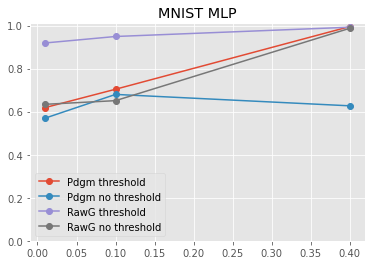

In [156]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
eps = [0.01, 0.1, 0.4]
# cifar
a = [0.619,0.704,0.995]
b = [0.570,0.680,0.627]
c = [0.919,0.949,0.992]
d = [0.634,0.651,0.987]
plt.plot(eps, a, "o-", label="Pdgm threshold")
plt.plot(eps, b, "o-", label="Pdgm no threshold")
plt.plot(eps, c, "o-", label="RawG threshold")
plt.plot(eps, d, "o-", label="RawG no threshold")
plt.legend()
plt.ylim(0,1.01)
plt.title(f"MNIST MLP")

plt.show()

In [213]:
# DeepFool : 1589363807
exp = [1589363807]
get_exp(exp, eps=["1.0"])

,run_id,architecture,method,threshold,attack_type,eps_u_1.0,eps_s_1.0
8,8,cifar_lenet,PersistentDgm,0:0_2:0_4:0.3_5:0.3_6:0.3,DeepFool,0.516,0.627
9,9,cifar_lenet,RawGraph,0:0_2:0_4:0.3_5:0.3_6:0.3,DeepFool,0.493,0.512
4,4,fashion_mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05,DeepFool,0.991,0.979
5,5,fashion_mnist_lenet,RawGraph,0:0.05_2:0.05_4:0.05_5:0.05,DeepFool,0.724,0.920
2,2,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,DeepFool,0.988,0.999
3,3,mnist_lenet,RawGraph,0:0.025_2:0.025_4:0.025_5:0.025,DeepFool,0.976,0.988
0,0,simple_fcn_mnist,PersistentDgm,0:0.01_1:0_2:0,DeepFool,0.684,0.891
1,1,simple_fcn_mnist,RawGraph,0:0.01_1:0_2:0,DeepFool,0.878,0.999
6,6,svhn_lenet,PersistentDgm,0:0.01_2:0.01_4:0.01_5:0.01_6:0.01,DeepFool,0.548,0.558
7,7,svhn_lenet,RawGraph,0:0.01_2:0.01_4:0.01_5:0.01_6:0.01,DeepFool,0.539,0.798


In [8]:
# CW : 1589392425, 1589443872
exp = [1589443872]
get_exp(exp, eps=["1.0"])

,run_id,architecture,method,threshold,attack_type,eps_u_1.0,eps_s_1.0
8,8,cifar_lenet,PersistentDgm,0:0_2:0_4:0.3_5:0.3_6:0.3,CW,0.526,0.555
9,9,cifar_lenet,RawGraph,0:0_2:0_4:0.3_5:0.3_6:0.3,CW,0.493,0.478
4,4,fashion_mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05,CW,0.998,1.000
5,5,fashion_mnist_lenet,RawGraph,0:0.05_2:0.05_4:0.05_5:0.05,CW,0.802,0.999
2,2,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,CW,0.988,1.000
3,3,mnist_lenet,RawGraph,0:0.025_2:0.025_4:0.025_5:0.025,CW,0.998,1.000
0,0,simple_fcn_mnist,PersistentDgm,0:0.01_1:0_2:0,CW,0.707,0.781
1,1,simple_fcn_mnist,RawGraph,0:0.01_1:0_2:0,CW,0.991,1.000
6,6,svhn_lenet,PersistentDgm,0:0.01_2:0.01_4:0.01_5:0.01_6:0.01,CW,0.526,0.531
7,7,svhn_lenet,RawGraph,0:0.01_2:0.01_4:0.01_5:0.01_6:0.01,CW,0.497,0.607


#### Persistent DGM

In [22]:
for i in range(2,5):
    print(i)

2
3
4


In [47]:
def get_exp_bis(exp, eps=["0.01", "0.1", "0.4"]):
    d = my_db.show_experiment(exp,
        params={
            "architecture": "architecture",
            "embedding_type": "embedding_type",
            "threshold": "thresholds",
            "attack_type": "attack_type"
        },
        metrics={
            "supervised_metrics": "supervised_metrics",
            "unsupervised_metrics": "unsupervised_metrics",
            "name" : "name"
        })

    dict_vals = {"eps_s_"+str(eps_): list() for eps_ in eps}
    dict_valu = {"eps_u_"+str(eps_): list() for eps_ in eps}
    dict_method = {"method" : list()}
    for row in range(d["supervised_metrics"].shape[0]):
        if d["name"][row] in [None, "None"]:
            dict_method["method"].append("None")
        elif d["name"][row] in ["LID", "Mahalanobis"]:
            dict_method["method"].append(d["name"][row])
        elif d["embedding_type"][row] == "PersistentDiagram":
            dict_method["method"].append("PersistentDgm")   
        else:
            dict_method["method"].append("RawGraph")
        if not isinstance(d["supervised_metrics"][row], dict):
            [dict_vals["eps_s_"+str(eps_)].append("None") for eps_ in eps]
            [dict_valu["eps_u_"+str(eps_)].append("None") for eps_ in eps]
        else:
            [dict_vals["eps_s_"+str(eps_)].append(np.round(d["supervised_metrics"][row][eps_]['auc']['value'], 3)) for eps_ in eps]
            [dict_valu["eps_u_"+str(eps_)].append(np.round(d["unsupervised_metrics"][row][eps_]['auc']['value'], 3)) for eps_ in eps]

    d = d.assign(**dict_valu)
    d = d.assign(**dict_vals)
    d = d.assign(**dict_method)
    d = d.drop(['embedding_type', 'name', 'supervised_metrics', 'unsupervised_metrics'], axis=1)
    d = d[list(d.columns[:2]) + ['method'] + list(d.columns[2:-1])]
    d = d.sort_values(by=['architecture'])
    return d

get_exp_bis(1589807623, eps=["0.01","0.1", "0.4"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
8,8,cifar_lenet,PersistentDgm,0:0_2:0_4:0.3_5:0.3_6:0.3,FGSM,0.521,0.814,0.996,0.561,0.841,0.997
9,9,cifar_lenet,PersistentDgm,0:0_2:0_4:0.3_5:0.3_6:0.3,BIM,0.516,0.973,0.989,0.561,0.977,0.991
4,4,fashion_mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05,FGSM,0.98,0.987,0.993,0.965,0.985,0.998
5,5,fashion_mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05,BIM,0.991,0.996,0.996,0.976,0.991,0.999
2,2,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,FGSM,0.988,0.988,0.988,0.998,0.999,1
3,3,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,BIM,0.988,0.988,0.988,0.997,0.999,0.999
0,0,simple_fcn_mnist,None,0:0.01_1:0_2:0,FGSM,None,None,None,None,None,None
1,1,simple_fcn_mnist,None,0:0.01_1:0_2:0,BIM,None,None,None,None,None,None
6,6,svhn_lenet,PersistentDgm,0:0.01_2:0.01_4:0.01_5:0.01_6:0.01,FGSM,0.5,0.801,0.95,0.534,0.863,0.949
7,7,svhn_lenet,PersistentDgm,0:0.01_2:0.01_4:0.01_5:0.01_6:0.01,BIM,0.537,0.582,0.596,0.563,0.605,0.639


In [5]:
# FGSM and BIM : 1589807623
# DeepFool and CW : 1589810768
exp1 = [1589807623]
exp2 = [1589810768]
get_exp(exp1, eps=["0.01","0.1","0.4"])
#get_exp(exp2, eps=["1.0"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
8,8,cifar_lenet,PersistentDgm,0:0_2:0_4:0.3_5:0.3_6:0.3,FGSM,0.521,0.814,0.996,0.561,0.841,0.997
9,9,cifar_lenet,PersistentDgm,0:0_2:0_4:0.3_5:0.3_6:0.3,BIM,0.516,0.973,0.989,0.561,0.977,0.991
4,4,fashion_mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05,FGSM,0.98,0.987,0.993,0.965,0.985,0.998
5,5,fashion_mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05,BIM,0.991,0.996,0.996,0.976,0.991,0.999
2,2,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,FGSM,0.988,0.988,0.988,0.998,0.999,1
3,3,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,BIM,0.988,0.988,0.988,0.997,0.999,0.999
0,0,simple_fcn_mnist,None,0:0.01_1:0_2:0,FGSM,None,None,None,None,None,None
1,1,simple_fcn_mnist,None,0:0.01_1:0_2:0,BIM,None,None,None,None,None,None
6,6,svhn_lenet,PersistentDgm,0:0.01_2:0.01_4:0.01_5:0.01_6:0.01,FGSM,0.5,0.801,0.95,0.534,0.863,0.949
7,7,svhn_lenet,PersistentDgm,0:0.01_2:0.01_4:0.01_5:0.01_6:0.01,BIM,0.537,0.582,0.596,0.563,0.605,0.639


In [6]:
df = my_db.show_experiment(1589807623)
df.to_csv("/Users/m.goibert/Downloads/principal_exp_prstdgm_fgsm_bim.csv", index=False)

Common configuration {'dataset_size': 500, 'all_epsilons': '0.01;0.1;0.4', 'kernel_type': 'SlicedWasserstein', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ocsvm_detector/ocsvm_detector_binary.py', 'raw_graph_pca': -1, 'noise': 0.0, 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'n_jobs': 8, 'embedding_type': 'PersistentDiagram', 'sigmoidize': True}


#### Raw Graph

In [49]:
# FGSM and BIM : 1589837828
# DeepFool and CW : 1589870089
exp1 = [1589837828]
exp2 = [1589870089]
#get_exp(exp1, eps=["0.01","0.1","0.4"])
get_exp(exp2, eps=["1.0"])
get_exp_bis(exp1[0], eps=["0.01","0.1", "0.4"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
8,8,cifar_lenet,RawGraph,0:0_2:0_4:0.3_5:0.3_6:0.3,FGSM,0.484,0.598,0.962,0.483,0.717,0.994
9,9,cifar_lenet,RawGraph,0:0_2:0_4:0.3_5:0.3_6:0.3,BIM,0.482,0.759,0.834,0.524,0.694,0.754
4,4,fashion_mnist_lenet,RawGraph,0:0.05_2:0.05_4:0.05_5:0.05,FGSM,0.56,0.796,0.913,0.848,0.894,0.978
5,5,fashion_mnist_lenet,RawGraph,0:0.05_2:0.05_4:0.05_5:0.05,BIM,0.585,0.868,0.947,0.865,0.95,0.979
2,2,mnist_lenet,RawGraph,0:0.025_2:0.025_4:0.025_5:0.025,FGSM,0.957,0.998,1,1,1,1
3,3,mnist_lenet,RawGraph,0:0.025_2:0.025_4:0.025_5:0.025,BIM,0.978,0.999,1,1,1,1
0,0,simple_fcn_mnist,None,0:0.01_1:0_2:0,FGSM,None,None,None,None,None,None
1,1,simple_fcn_mnist,None,0:0.01_1:0_2:0,BIM,None,None,None,None,None,None
6,6,svhn_lenet,RawGraph,0:0.01_2:0.01_4:0.01_5:0.01_6:0.01,FGSM,0.49,0.747,0.991,0.658,0.955,1
7,7,svhn_lenet,RawGraph,0:0.01_2:0.01_4:0.01_5:0.01_6:0.01,BIM,0.491,0.797,0.811,0.683,0.896,0.905


In [7]:
df = my_db.show_experiment(1589837828)
df.to_csv("/Users/m.goibert/Downloads/principal_exp_rawgraph_fgsm_bim.csv", index=False)

Common configuration {'dataset_size': 500, 'all_epsilons': '0.01;0.1;0.4', 'kernel_type': 'RBF', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ocsvm_detector/ocsvm_detector_binary.py', 'raw_graph_pca': -1, 'noise': 0.0, 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'n_jobs': 8, 'embedding_type': 'RawGraph'}


#### LID

In [11]:
# FGSM 1588839312, 1588861986
# BIM 1588862351, 1588865519
# FGSM and BIM : 1589801586
# DeepFool and CW : 1589805688
exp1 = [1589801897]
#exp1 = [1589801586]
exp2 = [1589805688]
get_exp(exp1, eps=["0.01","0.1","0.4"])
#get_exp(exp2, eps=["1.0"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
8,8,cifar_lenet,LID,None,FGSM,0.547,0.776,1.000,0.561,0.860,1.000
9,9,cifar_lenet,LID,None,BIM,0.568,0.941,0.962,0.576,0.976,0.984
4,4,fashion_mnist_lenet,LID,None,FGSM,0.728,0.794,0.975,0.766,0.853,0.987
5,5,fashion_mnist_lenet,LID,None,BIM,0.718,0.813,0.971,0.771,0.900,0.989
2,2,mnist_lenet,LID,None,FGSM,0.981,0.875,0.941,0.986,0.934,0.961
3,3,mnist_lenet,LID,None,BIM,0.974,0.861,0.924,0.983,0.937,0.930
0,0,simple_fcn_mnist,LID,None,FGSM,0.694,0.687,0.913,0.807,0.784,0.955
1,1,simple_fcn_mnist,LID,None,BIM,0.687,0.689,0.888,0.808,0.782,0.951
6,6,svhn_lenet,LID,None,FGSM,0.600,0.961,1.000,0.760,0.962,1.000
7,7,svhn_lenet,LID,None,BIM,0.626,0.785,0.817,0.794,0.866,0.886


In [12]:
df = my_db.show_experiment(1589801897)
df.to_csv("/Users/m.goibert/Downloads/principal_exp_lid_fgsm_bim.csv", index=False)

Common configuration {'dataset_size': 500, 'all_epsilons': '0.01;0.1;0.4', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/lid/lid_binary.py', 'successful_adv': 1, 'noise': 0.0, 'train_noise': 0.0}


In [206]:
# DeepFool : 1589356408
exp = [1589356408]
get_exp(exp, eps=["1.0"])

,run_id,architecture,method,threshold,attack_type,eps_u_1.0,eps_s_1.0
4,4,cifar_lenet,LID,None,DeepFool,0.585,0.568
2,2,fashion_mnist_lenet,LID,None,DeepFool,0.752,0.818
1,1,mnist_lenet,LID,None,DeepFool,0.877,0.951
0,0,simple_fcn_mnist,LID,None,DeepFool,0.736,0.805
3,3,svhn_lenet,LID,None,DeepFool,0.591,0.753


#### Mahalanobis

In [42]:
# FGSM
exp = 1588850996
get_exp(exp, eps=["0.01","0.1","0.4"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
4,4,cifar_lenet,Mahalanobis,None,FGSM,0.544,0.826,0.999,0.513,0.858,0.999
2,2,fashion_mnist_lenet,Mahalanobis,None,FGSM,0.502,0.617,0.986,0.501,0.737,0.997
1,1,mnist_lenet,Mahalanobis,None,FGSM,0.710,0.640,0.979,0.786,0.715,0.995
0,0,simple_fcn_mnist,Mahalanobis,None,FGSM,0.517,0.564,1.000,0.574,0.765,1.000
3,3,svhn_lenet,Mahalanobis,None,FGSM,0.520,0.854,0.995,0.560,0.934,0.996


In [217]:
# DeepFool
exp = 1589369893
get_exp(exp, eps=["1.0"])

,run_id,architecture,method,threshold,attack_type,eps_u_1.0,eps_s_1.0
4,4,cifar_lenet,Mahalanobis,None,DeepFool,0.519,0.500
2,2,fashion_mnist_lenet,Mahalanobis,None,DeepFool,0.510,0.565
1,1,mnist_lenet,Mahalanobis,None,DeepFool,0.796,0.865
0,0,simple_fcn_mnist,Mahalanobis,None,DeepFool,0.508,0.561
3,3,svhn_lenet,Mahalanobis,None,DeepFool,0.511,0.508


In [51]:
# FGSM and BIM : 1589812297
# DeepFool and CW : 1589826117
exp1 = [1589814519]
exp2 = [1589826117]
get_exp(exp1[0], eps=["0.01","0.1","0.4"])
#get_exp(exp2, eps=["1.0"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
8,8,cifar_lenet,Mahalanobis,None,FGSM,0.544,0.826,0.999,0.513,0.858,0.999
9,9,cifar_lenet,Mahalanobis,None,BIM,0.568,0.880,0.922,0.513,0.916,0.950
4,4,fashion_mnist_lenet,Mahalanobis,None,FGSM,0.502,0.617,0.986,0.501,0.737,0.997
5,5,fashion_mnist_lenet,Mahalanobis,None,BIM,0.500,0.623,0.980,0.526,0.698,0.997
2,2,mnist_lenet,Mahalanobis,None,FGSM,0.710,0.640,0.979,0.786,0.715,0.995
3,3,mnist_lenet,Mahalanobis,None,BIM,0.721,0.625,0.974,0.827,0.713,1.000
0,0,simple_fcn_mnist,Mahalanobis,None,FGSM,0.517,0.564,1.000,0.574,0.765,1.000
1,1,simple_fcn_mnist,Mahalanobis,None,BIM,0.503,0.585,1.000,0.570,0.782,1.000
6,6,svhn_lenet,Mahalanobis,None,FGSM,0.520,0.854,0.995,0.560,0.934,0.996
7,7,svhn_lenet,Mahalanobis,None,BIM,0.535,0.676,0.702,0.579,0.761,0.779


In [13]:
df = my_db.show_experiment(1589814519)
df.to_csv("/Users/m.goibert/Downloads/principal_exp_mahalanobis_fgsm_bim.csv", index=False)

Common configuration {'dataset_size': 500, 'all_epsilons': '0.01;0.1;0.4', 'preproc_epsilon': 0.01, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/mahalanobis/mahalanobis_binary.py', 'successful_adv': 1, 'noise': 0.0, 'number_of_samples_for_mu_sigma': 500}


### Detection indirecte (transfered attacks)

#### Persistent Diagrams and Raw Graphs

In [222]:
# FGSM
exp = 1589374041
get_exp(exp, eps=["0.05","0.07","0.1","0.4"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.05,eps_u_0.07,eps_u_0.1,eps_u_0.4,eps_s_0.05,eps_s_0.07,eps_s_0.1,eps_s_0.4
6,6,cifar_lenet,PersistentDgm,0:0_2:0_4:0.3_5:0.3_6:0.3,FGSM,0.5,0.513,0.556,0.99,0.569,0.57,0.564,0.989
7,7,cifar_lenet,None,0:0_2:0_4:0.3_5:0.3_6:0.3,FGSM,None,None,None,None,None,None,None,None
2,2,fashion_mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05,FGSM,0.988,0.99,0.99,0.993,0.978,0.98,0.976,0.996
3,3,fashion_mnist_lenet,RawGraph,0:0.05_2:0.05_4:0.05_5:0.05,FGSM,0.667,0.692,0.735,0.852,0.936,0.893,0.9,0.972
0,0,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,FGSM,0.983,0.983,0.983,0.983,0.989,0.992,0.995,0.998
1,1,mnist_lenet,RawGraph,0:0.025_2:0.025_4:0.025_5:0.025,FGSM,0.984,0.997,0.998,1,1,1,1,1
4,4,svhn_lenet,PersistentDgm,0:0.01_2:0.01_4:0.01_5:0.01_6:0.01,FGSM,0.536,0.531,0.677,0.846,0.5,0.69,0.809,0.863
5,5,svhn_lenet,RawGraph,0:0.01_2:0.01_4:0.01_5:0.01_6:0.01,FGSM,0.506,0.628,0.737,0.994,0.753,0.865,0.958,0.999


#### Persistend DGM

In [21]:
# FGSM and BIM : 1589885251
# DeepFool and CW : 1589888778
exp1 = [1589885251]
exp2 = [1589888778]
#get_exp(exp1, eps=["0.05","0.07","0.1","0.4"])
get_exp(exp2, eps=["1.0"])

,run_id,architecture,method,threshold,attack_type,eps_u_1.0,eps_s_1.0
6,6,cifar_lenet,PersistentDgm,0:0_2:0_4:0.3_5:0.3_6:0.3,DeepFool,0.500,0.562
7,7,cifar_lenet,PersistentDgm,0:0_2:0_4:0.3_5:0.3_6:0.3,CW,0.500,0.544
2,2,fashion_mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05,DeepFool,0.986,0.972
3,3,fashion_mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05,CW,0.671,0.605
0,0,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,DeepFool,0.983,0.994
1,1,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,CW,0.620,0.597
4,4,svhn_lenet,PersistentDgm,0:0.01_2:0.01_4:0.01_5:0.01_6:0.01,DeepFool,0.500,0.500
5,5,svhn_lenet,PersistentDgm,0:0.01_2:0.01_4:0.01_5:0.01_6:0.01,CW,0.534,0.506


In [22]:
df = my_db.show_experiment(1589888778)
df.to_csv("/Users/m.goibert/Downloads/trsfattacks_exp_prstdgm_deepfool_cw.csv", index=False)

Common configuration {'sigmoidize': True, 'transfered_attacks': True, 'all_epsilons': '1.0', 'raw_graph_pca': -1, 'archi_trsf_attack': 'None', 'embedding_type': 'PersistentDiagram', 'n_jobs': 8, 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'kernel_type': 'SlicedWasserstein', 'dataset_size': 300, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ocsvm_detector/ocsvm_detector_binary.py', 'noise': 0.0}


#### Raw Graph

In [33]:
# FGSM and BIM : 1589890561
# DeepFool and CW : 1589896716
exp1 = [1589890561]
exp2 = [1589896716]
#get_exp(exp1, eps=["0.05","0.07","0.1","0.4"])
get_exp(exp2, eps=["1.0"])

,run_id,architecture,method,threshold,attack_type,eps_u_1.0,eps_s_1.0
6,6,cifar_lenet,RawGraph,0:0_2:0_4:0.3_5:0.3_6:0.3,DeepFool,0.508,0.558
7,7,cifar_lenet,RawGraph,0:0_2:0_4:0.3_5:0.3_6:0.3,CW,0.525,0.506
2,2,fashion_mnist_lenet,RawGraph,0:0.05_2:0.05_4:0.05_5:0.05,DeepFool,0.670,0.994
3,3,fashion_mnist_lenet,RawGraph,0:0.05_2:0.05_4:0.05_5:0.05,CW,0.444,0.694
0,0,mnist_lenet,RawGraph,0:0.025_2:0.025_4:0.025_5:0.025,DeepFool,0.967,1.000
1,1,mnist_lenet,RawGraph,0:0.025_2:0.025_4:0.025_5:0.025,CW,0.486,0.546
4,4,svhn_lenet,RawGraph,0:0.01_2:0.01_4:0.01_5:0.01_6:0.01,DeepFool,0.479,0.600
5,5,svhn_lenet,RawGraph,0:0.01_2:0.01_4:0.01_5:0.01_6:0.01,CW,0.417,0.547


In [34]:
df = my_db.show_experiment(1589896716)
df.to_csv("/Users/m.goibert/Downloads/trsfattacks_exp_rawgraph_deepfool_cw.csv", index=False)

Common configuration {'transfered_attacks': True, 'all_epsilons': '1.0', 'raw_graph_pca': -1, 'archi_trsf_attack': 'None', 'embedding_type': 'RawGraph', 'n_jobs': 8, 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'kernel_type': 'RBF', 'dataset_size': 300, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ocsvm_detector/ocsvm_detector_binary.py', 'noise': 0.0}


#### LID

In [64]:
# FGSM and BIM : 1589926971, 
# DeepFool and CW : 1589927119, 1589960084
exp1 = [1589960919]
exp2 = [1589960419]
get_exp(exp1, eps=["0.05","0.07","0.1","0.4"])
#get_exp(exp2, eps=["1.0"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.05,eps_u_0.07,eps_u_0.1,eps_u_0.4,eps_s_0.05,eps_s_0.07,eps_s_0.1,eps_s_0.4
6,6,cifar_lenet,LID,None,FGSM,0.532,0.582,0.635,0.998,0.532,0.620,0.721,0.999
7,7,cifar_lenet,LID,None,BIM,0.614,0.567,0.570,0.811,0.609,0.566,0.580,0.881
2,2,fashion_mnist_lenet,LID,None,FGSM,0.607,0.563,0.585,0.976,0.633,0.645,0.657,0.987
3,3,fashion_mnist_lenet,LID,None,BIM,0.630,0.595,0.592,0.751,0.653,0.645,0.668,0.822
0,0,mnist_lenet,LID,None,FGSM,0.992,0.931,0.632,0.782,0.994,0.930,0.793,0.938
1,1,mnist_lenet,LID,None,BIM,0.922,0.786,0.842,0.642,0.916,0.864,0.883,0.798
4,4,svhn_lenet,LID,None,FGSM,0.747,0.891,0.959,1.000,0.817,0.907,0.963,1.000
5,5,svhn_lenet,LID,None,BIM,0.681,0.721,0.804,0.984,0.783,0.816,0.836,0.984


In [66]:
df = my_db.show_experiment(1589960919)
df.to_csv("/Users/m.goibert/Downloads/trsfattacks_exp_lid_fgsm_bim.csv", index=False)

Common configuration {'successful_adv': 1, 'transfered_attacks': True, 'train_noise': 0.0, 'all_epsilons': '0.05;0.07;0.1;0.4', 'archi_trsf_attack': 'None', 'dataset_size': 300, 'noise': 0.0, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/lid/lid_binary.py'}


#### Mahalanobis

In [40]:
# FGSM and BIM : 1589898855
# DeepFool and CW : 1589921639
exp1 = [1589898855]
exp2 = [1589921639]
#get_exp(exp1, eps=["0.05","0.07","0.1","0.4"])
get_exp(exp2, eps=["1.0"])

,run_id,architecture,method,threshold,attack_type,eps_u_1.0,eps_s_1.0
6,6,cifar_lenet,Mahalanobis,None,DeepFool,0.556,0.500
7,7,cifar_lenet,Mahalanobis,None,CW,0.512,0.500
2,2,fashion_mnist_lenet,Mahalanobis,None,DeepFool,0.500,0.610
3,3,fashion_mnist_lenet,Mahalanobis,None,CW,0.591,0.658
0,0,mnist_lenet,Mahalanobis,None,DeepFool,0.773,0.837
1,1,mnist_lenet,Mahalanobis,None,CW,0.696,0.703
4,4,svhn_lenet,Mahalanobis,None,DeepFool,0.516,0.514
5,5,svhn_lenet,Mahalanobis,None,CW,0.563,0.529


In [68]:
df = my_db.show_experiment(1589921639)
df.to_csv("/Users/m.goibert/Downloads/trsfattacks_exp_mahalanobis_deepfool_cw.csv", index=False)

Common configuration {'successful_adv': 1, 'transfered_attacks': True, 'number_of_samples_for_mu_sigma': 500, 'all_epsilons': '1.0', 'archi_trsf_attack': 'None', 'n_jobs': 8, 'dataset_size': 300, 'preproc_epsilon': 0.01, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/mahalanobis/mahalanobis_binary.py', 'noise': 0.0}


# ---

## Detection on pruned networks

### Pruned 0.81

In [88]:
# Persistent dgm: FGSM/BIM (1590050315, 1590147827, 1590150310), DeepFool/CW ()
# LID: FGSM/BIM (1590071877), DeepFool/CW ()
# Mahalanobis: FGSM/BIM (1590137674), DeepFool/CW ()

exp1 = [1590050315, 1590147827, 1590155019, 1590162546, 1590071877, 1590137674]

get_exp(exp1, eps=["0.01","0.1","0.4"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
0,0,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,FGSM,0.506,0.642,0.638,0.500,0.800,0.851
1,1,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,BIM,0.510,0.605,0.682,0.497,0.786,0.847
2,0,mnist_lenet,LID,None,FGSM,0.984,0.849,0.972,0.996,0.917,0.973
3,1,mnist_lenet,LID,None,BIM,0.983,0.836,0.924,0.996,0.916,0.939
4,0,mnist_lenet,Mahalanobis,None,FGSM,0.771,0.701,0.993,0.855,0.784,0.998
5,1,mnist_lenet,Mahalanobis,None,BIM,0.778,0.627,0.990,0.858,0.745,1.000
6,0,mnist_lenet,PersistentDgm,0:0.01_2:0.01_4:0.01_5:0.01,FGSM,0.566,0.850,0.964,0.503,0.922,0.979
7,1,mnist_lenet,PersistentDgm,0:0.01_2:0.01_4:0.01_5:0.01,BIM,0.567,0.759,0.907,0.557,0.858,0.962
8,0,mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05,FGSM,0.902,0.902,0.902,0.968,0.987,0.990
9,1,mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05,BIM,0.902,0.902,0.902,0.950,0.991,0.991


### Pruned 0.66

In [96]:
# Persistent dgm: FGSM/BIM (1590233828), DeepFool/CW ()
# LID: FGSM/BIM (1590254596), DeepFool/CW ()
# Mahalanobis: FGSM/BIM (), DeepFool/CW ()

exp1 = [1590233828, 1590254596]

get_exp(exp1, eps=["0.01","0.1","0.4"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
0,0,mnist_lenet,PersistentDgm,0:0.1_2:0.1_4:0.1_5:0.1,FGSM,0.866,0.866,0.866,0.942,0.993,0.991
1,1,mnist_lenet,PersistentDgm,0:0.1_2:0.1_4:0.1_5:0.1,BIM,0.866,0.866,0.866,0.949,0.988,0.989
2,0,mnist_lenet,LID,None,FGSM,0.981,0.858,0.924,0.983,0.895,0.956
3,1,mnist_lenet,LID,None,BIM,0.979,0.838,0.910,0.987,0.895,0.928


### Pruned 0.53

In [108]:
# Persistent dgm: FGSM/BIM (1590392385), DeepFool/CW ()
# LID: FGSM/BIM (1590396833), DeepFool/CW ()
# Mahalanobis: FGSM/BIM (), DeepFool/CW ()

exp1 = [1590392385, 1590396833]

get_exp(exp1, eps=["0.01","0.1","0.4"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
0,0,mnist_lenet,PersistentDgm,0:0.1_2:0.1_4:0.1_5:0.1,FGSM,0.962,0.962,0.962,0.992,0.998,0.998
1,1,mnist_lenet,PersistentDgm,0:0.1_2:0.1_4:0.1_5:0.1,BIM,0.962,0.962,0.962,0.993,0.999,0.997
2,0,mnist_lenet,LID,None,FGSM,0.970,0.839,0.936,0.982,0.872,0.961
3,1,mnist_lenet,LID,None,BIM,0.950,0.835,0.896,0.971,0.865,0.925


### Detection on pruned models

In [27]:
exp = [1590670793, 1590679893, 1590693248, 1590735240]
exp = [1590679893]
get_exp(exp, eps=["0.01","0.1","0.4"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
0,0,mnist_lenet,LID,None,FGSM,0.984,0.849,0.972,0.996,0.917,0.973
1,1,mnist_lenet,LID,None,FGSM,0.981,0.858,0.924,0.983,0.895,0.956
2,2,mnist_lenet,LID,None,FGSM,0.970,0.839,0.936,0.982,0.872,0.961
3,3,mnist_lenet,LID,None,FGSM,0.946,0.831,0.956,0.969,0.893,0.962
4,4,mnist_lenet,LID,None,FGSM,0.908,0.788,0.961,0.933,0.841,0.969
5,5,mnist_lenet,LID,None,FGSM,0.879,0.833,0.975,0.913,0.882,0.978
6,6,mnist_lenet,LID,None,FGSM,0.822,0.798,0.966,0.874,0.823,0.975
7,7,mnist_lenet,LID,None,FGSM,0.806,0.765,0.980,0.847,0.813,0.981


In [28]:
df = my_db.show_experiment(1590679893)
df.to_csv("/Users/m.goibert/Downloads/pruned_models_detection_lid.csv", index=False)

Common configuration {'dataset': 'MNIST', 'batch_size': 250, 'dataset_size': 500, 'epochs': 100, 'perc_of_nn': 0.08, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/lid/lid_binary.py', 'train_noise': 0.0, 'all_epsilons': '0.01;0.1;0.4', 'successful_adv': 1, 'architecture': 'mnist_lenet', 'attack_type': 'FGSM', 'noise': 0.0}


In [30]:
exp = [1590586033, 1591003715]
df = my_db.show_experiment(exp)
df.to_csv("/Users/m.goibert/Downloads/pruned_adv_acc.csv", index=False)

Common configuration {'epochs': 100, 'dataset_size': 500, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/attack_performance/attacks_performance_binary.py', 'architecture': 'mnist_lenet', 'dataset': 'MNIST', 'attack_type': 'FGSM', 'noise': 0.0}


In [11]:
# Explore SVHN threshold : 1590595713
# Tentatives de threshold : 1590603045,1590606879,
exp = [1590595713]
exp1 = [1590609281, 1590611079, 1590654605, 1590657939, 1590661510, 1590666314] # FGSM et BIM
exp2 = [1590614576, 1590652422] # Deepfool et CW
#get_exp(exp, eps=["0.01","0.1","0.4"])
get_exp(exp1, eps=["0.01","0.1","0.4"])
#get_exp(exp2, eps=["1.0"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
0,0,svhn_lenet,PersistentDgm,0:0.0_2:0.05_4:0.05_5:0_6:0,FGSM,0.556,0.837,0.994,0.595,0.969,0.997
1,0,svhn_lenet,PersistentDgm,0:0.0_2:0.05_4:0.05_5:0_6:0,BIM,0.572,0.564,0.593,0.628,0.777,0.807
2,0,svhn_lenet,PersistentDgm,0:0.0_2:0.01_4:0.01_5:0_6:0,FGSM,0.529,0.760,0.909,0.535,0.867,0.994
3,1,svhn_lenet,PersistentDgm,0:0.0_2:0.01_4:0.01_5:0_6:0,BIM,0.510,0.548,0.545,0.500,0.583,0.592
4,0,svhn_lenet,PersistentDgm,0:0.0_2:0.025_4:0.025_5:0_6:0,FGSM,0.534,0.742,0.975,0.521,0.913,0.998
5,1,svhn_lenet,PersistentDgm,0:0.0_2:0.025_4:0.025_5:0_6:0,BIM,0.517,0.552,0.574,0.534,0.638,0.673
6,0,svhn_lenet,PersistentDgm,0:0.0_2:0.075_4:0.075_5:0_6:0,FGSM,0.520,0.774,0.989,0.597,0.966,0.999
7,1,svhn_lenet,PersistentDgm,0:0.0_2:0.075_4:0.075_5:0_6:0,BIM,0.541,0.564,0.593,0.643,0.781,0.800
8,0,svhn_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0_6:0,FGSM,0.554,0.735,0.998,0.546,0.960,0.999
9,1,svhn_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0_6:0,BIM,0.562,0.543,0.516,0.602,0.697,0.759


In [40]:
df = my_db.show_experiment(exp2)
df.to_csv("/Users/m.goibert/Downloads/principal_exp_prstdgm_svhn_v2_deepfool_cw.csv", index=False)

Common configuration {'all_epsilons': '1.0', 'epochs': 300, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ocsvm_detector/ocsvm_detector_binary.py', 'architecture': 'svhn_lenet', 'sigmoidize': True, 'raw_graph_pca': -1, 'dataset_size': 500, 'thresholds': '0:0.0_2:0.05_4:0.05_5:0_6:0', 'noise': 0.0, 'n_jobs': 20, 'kernel_type': 'SlicedWasserstein', 'embedding_type': 'PersistentDiagram', 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'dataset': 'SVHN'}


In [14]:
# MNIST LeNet Magnitude Increase
exp = [1591017740, 1591021406, 1591043872]
get_exp(exp, eps=["0.01","0.1","0.4"])
#df = my_db.show_experiment(exp)
#df.to_csv("/Users/m.goibert/Downloads/threshold_strategies.csv", index=False)

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
0,0,mnist_lenet,PersistentDgm,0:0.01_2:0.01_4:0.01_5:0.01,FGSM,0.924,0.924,0.924,0.964,0.989,0.991
1,1,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,FGSM,0.969,0.968,0.969,0.991,0.996,0.997
2,2,mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05,FGSM,0.997,0.998,1.000,0.995,0.999,1.000
3,3,mnist_lenet,PersistentDgm,0:0.1_2:0.1_4:0.1_5:0.1,FGSM,0.700,0.813,0.989,0.899,0.993,1.000
4,4,mnist_lenet,PersistentDgm,0:0.2_2:0.2_4:0.2_5:0.2,FGSM,0.570,0.974,0.987,0.862,1.000,1.000
5,0,mnist_lenet,PersistentDgm,0:0.01_2:0.01_4:0.01_5:0.01,FGSM,0.808,0.808,0.808,0.904,0.957,0.979
6,1,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,FGSM,0.897,0.921,0.982,0.891,0.936,0.999
7,2,mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05,FGSM,0.699,0.988,0.995,0.700,0.998,1.000
8,3,mnist_lenet,PersistentDgm,0:0.1_2:0.1_4:0.1_5:0.1,FGSM,0.811,0.847,0.989,0.824,0.923,1.000
9,4,mnist_lenet,PersistentDgm,0:0.2_2:0.2_4:0.2_5:0.2,FGSM,0.719,0.845,0.996,0.853,0.991,1.000


In [18]:
# MNIST LeNet sigmoidize
exp = [1591103260]
get_exp(exp, eps=["0.01","0.1","0.4"])
df = my_db.show_experiment(exp)
df.to_csv("/Users/m.goibert/Downloads/sigmoidize.csv", index=False)

Common configuration {'all_epsilons': '0.01;0.1;0.4', 'embedding_type': 'PersistentDiagram', 'architecture': 'mnist_lenet', 'kernel_type': 'SlicedWasserstein', 'dataset_size': 500, 'attack_type': 'FGSM', 'raw_graph_pca': -1, 'thresholds': '0:0.05_2:0.05_4:0.05_5:0.05', 'noise': 0.0, 'n_jobs': 20, 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'dataset': 'MNIST', 'epochs': 100, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ocsvm_detector/ocsvm_detector_binary.py'}


# ---

# ---

# ---

# ---

# ---

# ---

# ---

# ---

##### Explo MNIST LeNet threshold

In [49]:
exp = 1588850723
db_path2 = '/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/TDA_for_adv_robustness/r3d3.db'
my_db2 = ExperimentDB(db_path2)
get_exp(exp, eps=["0.01","0.1","0.4"], db=my_db2)

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
0,0,mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.0,FGSM,0.799,0.863,0.995,0.807,0.950,1.000
1,1,mnist_lenet,PersistentDgm,0:0.01_2:0.0_4:0.0_5:0.0,FGSM,0.755,0.755,0.755,0.886,0.914,0.912
2,2,mnist_lenet,PersistentDgm,0:0.05_2:0.0_4:0.0_5:0.0,FGSM,0.833,0.915,1.000,0.871,0.991,1.000
3,3,mnist_lenet,PersistentDgm,0:0.1_2:0.0_4:0.0_5:0.0,FGSM,0.772,1.000,1.000,0.880,1.000,1.000
4,4,mnist_lenet,PersistentDgm,0:0.2_2:0.0_4:0.0_5:0.0,FGSM,0.874,0.995,1.000,0.974,1.000,1.000
5,5,mnist_lenet,PersistentDgm,0:0.0_2:0.01_4:0.0_5:0.0,FGSM,0.589,0.806,0.973,0.572,0.848,0.995
6,6,mnist_lenet,PersistentDgm,0:0.0_2:0.05_4:0.0_5:0.0,FGSM,0.500,0.589,0.957,0.650,0.812,1.000
7,7,mnist_lenet,PersistentDgm,0:0.0_2:0.1_4:0.0_5:0.0,FGSM,0.506,0.624,0.975,0.703,0.884,0.998
8,8,mnist_lenet,PersistentDgm,0:0.0_2:0.2_4:0.0_5:0.0,FGSM,0.519,0.642,0.952,0.672,0.871,0.996
9,9,mnist_lenet,PersistentDgm,0:0.0_2:0.0_4:0.01_5:0.0,FGSM,0.569,0.516,0.538,0.632,0.571,0.781


#### Explo MNIST LeNet without threshold

In [78]:
# With sigmoid = True (1588871307, 1588888264)
exp = 1588888264
get_exp(exp, eps=["0.01","0.1","0.4"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
0,0,mnist_lenet,PersistentDgm,0:1_2:1_4:1_5:1,FGSM,0.889,1.0,1.0,0.994,1.0,1.0


In [75]:
# With sigmoid = False
exp = 1588875773
get_exp(exp, eps=["0.01","0.1","0.4"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
0,0,mnist_lenet,PersistentDgm,0:1_2:1_4:1_5:1,FGSM,0.546,0.8,1.0,0.759,0.999,1.0


#### Explo MNIST LeNet with sigmoid = False

In [116]:
exp = [1589011767, 1589016990, 1589023452, 1589027155, 1589033962, 1589046126]
get_exp(exp, eps=["0.01","0.1","0.4"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
0,0,mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05,FGSM,0.761,0.978,0.992,0.938,1.000,1.000
1,0,mnist_lenet,PersistentDgm,0:0.1_2:0.1_4:0.1_5:0.1,FGSM,0.765,0.977,0.984,0.984,1.000,1.000
2,0,mnist_lenet,PersistentDgm,0:0.2_2:0.2_4:0.2_5:0.2,FGSM,0.597,0.965,0.984,1.000,1.000,1.000
3,0,mnist_lenet,PersistentDgm,0:0.01_2:0.01_4:0.01_5:0.01,FGSM,0.878,0.878,0.878,0.951,0.979,0.984
4,0,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,FGSM,0.988,0.988,0.988,0.998,0.999,1.000
5,0,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,FGSM,0.988,0.988,0.988,0.998,0.999,1.000


#### Explo SVHN threshold

In [157]:
exp = [1589052652, 1589060051, 1589096672, 1589113752, 1589190161]
get_exp(exp, eps=["0.01","0.1","0.4"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
0,0,svhn_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0_6:0.025,FGSM,0.554,0.578,0.967,0.500,0.754,0.985
1,0,svhn_lenet,PersistentDgm,0:0.01_2:0.01_4:0.01_5:0.01_6:0.01,FGSM,0.500,0.801,0.950,0.534,0.863,0.949
2,0,svhn_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025_6:0.025,FGSM,0.558,0.593,0.967,0.546,0.757,0.986
3,0,svhn_lenet,PersistentDgm,0:0.005_2:0.005_4:0.005_5:0.005_6:0.005,FGSM,0.530,0.768,0.952,0.522,0.762,0.960
4,0,svhn_lenet,PersistentDgm,0:0.1_2:0.1_4:0.1_5:0.1_6:0.1,FGSM,0.566,0.539,0.995,0.538,0.947,0.997


#### Explo threshold MNIST MLP

In [161]:
exp = [1589198173, 1589202395]
get_exp(exp, eps=["0.01","0.1","0.4"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
0,0,simple_fcn_mnist,PersistentDgm,0:0.01_1:0.01_2:0.01,FGSM,0.548,0.670,0.985,0.580,0.822,0.999
1,0,simple_fcn_mnist,PersistentDgm,0:0.025_1:0.025_2:0.025,FGSM,0.515,0.662,0.981,0.582,0.835,0.996


### Explo threshold Fashion MNIST LeNet

In [173]:
exp = [1589205432, 1589207493, 1589208498, 1589216170, 1589221326]
get_exp(exp, eps=["0.01","0.1","0.4"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
0,0,fashion_mnist_lenet,PersistentDgm,0:0.01_2:0.01_4:0.01_5:0.01,FGSM,0.589,0.547,0.579,0.789,0.717,0.769
1,0,fashion_mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,FGSM,0.925,0.947,0.964,0.943,0.952,0.991
2,0,fashion_mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05,FGSM,0.977,0.986,0.993,0.959,0.980,0.997
3,0,fashion_mnist_lenet,PersistentDgm,0:0.075_2:0.075_4:0.075_5:0.075,FGSM,0.894,0.931,0.971,0.893,0.961,0.997
4,0,fashion_mnist_lenet,PersistentDgm,0:0.1_2:0.1_4:0.1_5:0.1,FGSM,0.860,0.916,0.976,0.873,0.977,0.998


#### Explo threshold CIFAR LeNet

In [198]:
exp = [1589234980, 1589268446, 1589270285, 1589272316, 1589274404,
       1589276866, 1589279723, 1589282796, 1589285762, 1589289632,
       1589292672, 1589295035, 1589296132]
get_exp(exp, eps=["0.01","0.1","0.4"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
0,0,cifar_lenet,PersistentDgm,0:0.01_2:0.01_4:0.01_5:0.01_6:0.01,FGSM,0.500,0.679,0.920,0.500,0.651,0.956
1,0,cifar_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025_6:0.025,FGSM,0.500,0.666,0.978,0.521,0.758,0.993
2,0,cifar_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05_6:0.05,FGSM,0.513,0.633,0.986,0.503,0.866,0.998
3,0,cifar_lenet,PersistentDgm,0:0.075_2:0.075_4:0.075_5:0.075_6:0.075,FGSM,0.500,0.699,0.991,0.522,0.867,0.999
4,0,cifar_lenet,PersistentDgm,0:0.1_2:0.1_4:0.1_5:0.1_6:0.1,FGSM,0.500,0.689,0.986,0.530,0.864,0.997
5,0,cifar_lenet,PersistentDgm,0:0.15_2:0.15_4:0.15_5:0.15_6:0.15,FGSM,0.500,0.699,0.980,0.585,0.841,0.996
6,0,cifar_lenet,PersistentDgm,0:0.2_2:0.2_4:0.2_5:0.2_6:0.2,FGSM,0.500,0.718,0.980,0.581,0.837,0.993
7,0,cifar_lenet,PersistentDgm,0:0.25_2:0.25_4:0.25_5:0.25_6:0.25,FGSM,0.500,0.681,0.982,0.557,0.843,0.997
8,0,cifar_lenet,PersistentDgm,0:0.3_2:0.3_4:0.3_5:0.3_6:0.3,FGSM,0.500,0.749,0.986,0.578,0.860,0.997
9,0,cifar_lenet,PersistentDgm,0:0.35_2:0.35_4:0.35_5:0.35_6:0.35,FGSM,0.500,0.709,0.980,0.529,0.828,0.993


In [211]:
exp = [1589361141, 1589361640, 1589363197]
get_exp(exp, eps=["1.0"])

,run_id,architecture,method,threshold,attack_type,eps_u_1.0,eps_s_1.0
0,0,cifar_lenet,PersistentDgm,0:0.0_2:0.0_4:0.3_5:0.3_6:0.3,DeepFool,0.500,0.620
1,0,cifar_lenet,PersistentDgm,0:0.3_2:0.3_4:0.3_5:0.3_6:0.3,DeepFool,0.500,0.619
2,0,cifar_lenet,PersistentDgm,0:0.0_2:0.0_4:0.0_5:0.1_6:0.3,DeepFool,0.502,0.628


In [7]:
exp1 = [1589638227, 1589641357] # FGSM and BIM
exp2 = [1589705979, 1589740395] # DeepFool and CW
#get_exp(exp, eps=["0.01","0.1","0.4"])
#get_exp(1589705979, eps=["1.0"])
get_exp(exp2, eps=["1.0"])

,run_id,architecture,method,threshold,attack_type,eps_u_1.0,eps_s_1.0
8,8,cifar_lenet,PersistentDgm,0:0_2:0_4:0.3_5:0.3_6:0.3,DeepFool,0.516,0.627
9,9,cifar_lenet,None,0:0_2:0_4:0.3_5:0.3_6:0.3,CW,None,None
14,4,cifar_lenet,PersistentDgm,0:0_2:0_4:0.3_5:0.3_6:0.3,CW,0.526,0.555
4,4,fashion_mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05,DeepFool,0.991,0.979
5,5,fashion_mnist_lenet,None,0:0.05_2:0.05_4:0.05_5:0.05,CW,None,None
12,2,fashion_mnist_lenet,PersistentDgm,0:0.05_2:0.05_4:0.05_5:0.05,CW,0.998,1
2,2,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,DeepFool,0.988,0.999
3,3,mnist_lenet,None,0:0.025_2:0.025_4:0.025_5:0.025,CW,None,None
11,1,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,CW,0.988,1
0,0,simple_fcn_mnist,None,0:0.01_1:0_2:0,DeepFool,None,None


In [69]:
get_exp(1590050315, eps=["0.01","0.1","0.4"])

,run_id,architecture,method,threshold,attack_type,eps_u_0.01,eps_u_0.1,eps_u_0.4,eps_s_0.01,eps_s_0.1,eps_s_0.4
0,0,mnist_lenet,PersistentDgm,0:0.025_2:0.025_4:0.025_5:0.025,FGSM,0.506,0.642,0.638,0.5,0.8,0.851
1,1,mnist_lenet,None,0:0.025_2:0.025_4:0.025_5:0.025,BIM,None,None,None,None,None,None


#

#

#

### Septembre 2020 : vérif des résultats (foolbox/custom/etc)

In [5]:
exp_ours = 1600876441
exp_lid = 1600892318
exp_maha = [1600895724, 1600930303]
exp_ours_cu = 1600943733
exp_foolbox_v2 = 1600975620
df = my_db.show_experiment(exp_foolbox_v2)
#df
df2 = df[["attack_type", "name", "unsupervised_metrics", "aucs_l2_norm"]]
df2
df2.to_csv("/Users/m.goibert/Downloads/exp_redone_fbv2.csv", index=False, sep="|")

Common configuration {'binary': '/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'n_jobs': 8, 'thresholds': '0:0.01_2:0.01_4:0.01_5:0.01_6:0.01', 'noise': 0.0, 'raw_graph_pca': -1, 'dataset': 'SVHN', 'epochs': 300, 'architecture': 'svhn_lenet', 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'dataset_size': 500}


### Relaunch PGD results

In [15]:
exp_ours = 1601064006
exp_lid = 1601101623
exp_maha = 1601105413
df_ours = my_db.show_experiment(exp_ours)
df_lid = my_db.show_experiment(exp_lid)
df_maha = my_db.show_experiment(exp_maha)
df_ours.to_csv("/Users/m.goibert/Downloads/pdg_prstdgm_rg.csv", index=False)
df_lid.to_csv("/Users/m.goibert/Downloads/pdg_lid.csv", index=False)
df_maha.to_csv("/Users/m.goibert/Downloads/pdg_maha.csv", index=False)

Common configuration {'dataset_size': 500, 'binary': '/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'n_jobs': 8, 'noise': 0.0, 'all_epsilons': '0.01;0.1;0.4', 'attack_type': 'PGD', 'raw_graph_pca': -1}
Common configuration {'dataset_size': 500, 'successful_adv': 1, 'binary': '/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/TDA_for_adv_robustness/tda/../tda/experiments/lid/lid_binary.py', 'noise': 0.0, 'all_epsilons': '0.01;0.1;0.4', 'attack_type': 'PGD', 'train_noise': 0.0}
Common configuration {'dataset_size': 500, 'number_of_samples_for_mu_sigma': 500, 'successful_adv': 1, 'binary': '/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/TDA_for_adv_robustness/tda/../tda/experiments/mahalanobis/mahalanobis_binary.py', 'noise': 0.0, 'all_epsilons': '0.01;0.1;0.4', 'attack_type': 'PGD', 'preproc_epsilon': 0.01}


### Boundary Attack

In [110]:
# LID
exp = 1601200476
df = my_db.show_experiment(exp)
df
df.to_csv("/Users/m.goibert/Downloads/lid_boundary.csv", index=False)

Common configuration {'dataset_size': 500, 'successful_adv': 1, 'binary': '/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/TDA_for_adv_robustness/tda/../tda/experiments/lid/lid_binary.py', 'noise': 0.0, 'attack_backend': 'FOOLBOX', 'all_epsilons': '0.01;0.1;0.4', 'attack_type': 'BOUNDARY', 'train_noise': 0.0}


In [111]:
# Mahalanobis
exp = 1601204869
df = my_db.show_experiment(exp)
df
df.to_csv("/Users/m.goibert/Downloads/maha_boundary.csv", index=False)

Common configuration {'dataset_size': 500, 'number_of_samples_for_mu_sigma': 500, 'successful_adv': 1, 'binary': '/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/TDA_for_adv_robustness/tda/../tda/experiments/mahalanobis/mahalanobis_binary.py', 'noise': 0.0, 'attack_backend': 'FOOLBOX', 'all_epsilons': '0.01;0.1;0.4', 'attack_type': 'BOUNDARY', 'preproc_epsilon': 0.01}


In [113]:
# Our
exp = 1601209059
df = my_db.show_experiment(exp)
df
df.to_csv("/Users/m.goibert/Downloads/our_boundary.csv", index=False)

Common configuration {'dataset_size': 500, 'binary': '/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'n_jobs': 8, 'noise': 0.0, 'attack_backend': 'FOOLBOX', 'all_epsilons': '1.0', 'attack_type': 'BOUNDARY', 'raw_graph_pca': -1}


### Analyse complexité

In [65]:
t = [0.01, 0.025, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]

In [68]:
# Persistence dgm
exp = 1601284298
df = my_db.show_experiment(exp)
t_pd = df["time"]
df

Common configuration {'dataset_size': 500, 'kernel_type': 'SlicedWasserstein', 'architecture': 'mnist_lenet', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'n_jobs': 8, 'sigmoidize': True, 'noise': 0.0, 'dataset': 'MNIST', 'all_epsilons': '0.1', 'attack_type': 'FGSM', 'epochs': 50, 'raw_graph_pca': -1, 'embedding_type': 'PersistentDiagram'}


,run_id,thresholds,linf_diff,unsupervised_predictions,supervised_predictions,aucs_l2_norm,unsupervised_metrics,detailed_times_stats,detailed_times_protocolar_datasets,detailed_times_embeddings,time,name,l2_diff,supervised_metrics
0,0,0:0.01_2:0.01_4:0.01_5:0.01,"{'0.1': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....","{'0.1': [[-0.09990091869924636, -0.09947534754...","{'0.1': [[0.009785963164976253, 0.014003781882...",None,{'0.1': {'auc': {'upper_bound': 0.902114864864...,57.251471,0.016634,819.959342,923.709187,Graph,"{'0.1': [2.050228557058343, 2.106895363322546,...",{'0.1': {'auc': {'upper_bound': 0.984808679238...
1,1,0:0.025_2:0.025_4:0.025_5:0.025,"{'0.1': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....","{'0.1': [[-0.005769925737771298, -0.0008386019...","{'0.1': [[0.983738984726104, 0.997632527500374...",None,{'0.1': {'auc': {'upper_bound': 0.998272727272...,56.393417,0.015649,886.277004,1043.565578,Graph,"{'0.1': [2.050228557058343, 2.106895363322546,...",{'0.1': {'auc': {'upper_bound': 0.999865772777...
2,2,0:0.05_2:0.05_4:0.05_5:0.05,"{'0.1': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....","{'0.1': [[0.15687824266444128, 0.2553684056272...","{'0.1': [[1.033611458848457, 1.529694617366121...",None,{'0.1': {'auc': {'upper_bound': 0.880369854792...,56.284710,0.043555,867.207311,1046.342053,Graph,"{'0.1': [2.050228557058343, 2.106895363322546,...",{'0.1': {'auc': {'upper_bound': 0.985224328700...
3,3,0:0.1_2:0.1_4:0.1_5:0.1,"{'0.1': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....","{'0.1': [[-0.9000000025501783, -0.900000002550...","{'0.1': [[-2.2721677814492714e-09, -2.27207683...",None,{'0.1': {'auc': {'upper_bound': 0.995199601971...,57.258602,0.019119,909.404727,1104.183411,Graph,"{'0.1': [2.050228557058343, 2.106895363322546,...",{'0.1': {'auc': {'upper_bound': 1.000033081001...
4,4,0:0.3_2:0.3_4:0.3_5:0.3,"{'0.1': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....","{'0.1': [[-0.5000000035651625, -0.500000003565...","{'0.1': [[1.2561073790968442, 0.43393888162860...",None,{'0.1': {'auc': {'upper_bound': 0.914036133212...,1.089589,0.048366,1553.086441,1693.452834,Graph,"{'0.1': [2.050228557058343, 2.106895363322546,...",{'0.1': {'auc': {'upper_bound': 1.000550898263...
5,5,0:0.5_2:0.5_4:0.5_5:0.5,"{'0.1': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....","{'0.1': [[-0.10000000053936103, -0.10000000054...","{'0.1': [[1.6103063180809867, 0.97975168493422...",None,{'0.1': {'auc': {'upper_bound': 0.835708292448...,0.831748,0.030804,1833.655332,1988.323471,Graph,"{'0.1': [2.050228557058343, 2.106895363322546,...",{'0.1': {'auc': {'upper_bound': 1.000377546815...
6,6,0:0.7_2:0.7_4:0.7_5:0.7,"{'0.1': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....","{'0.1': [[-0.1000000122263703, -0.100000012233...","{'0.1': [[-1.1180764646862142e-07, -1.11880038...",None,{'0.1': {'auc': {'upper_bound': 1.000009677419...,1.075882,0.038242,2070.941205,2185.629634,Graph,"{'0.1': [2.050228557058343, 2.106895363322546,...","{'0.1': {'auc': {'upper_bound': 1.0, 'value': ..."
7,7,0:0.9_2:0.9_4:0.9_5:0.9,"{'0.1': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....","{'0.1': [[-0.10001360419410979, -0.10001395896...","{'0.1': [[-0.00010773171795867579, -0.00011127...",None,{'0.1': {'auc': {'upper_bound': 1.000569500674...,0.400547,0.015832,2210.347186,2289.050182,Graph,"{'0.1': [2.050228557058343, 2.106895363322546,...","{'0.1': {'auc': {'upper_bound': 1.0, 'value': ..."


In [69]:
# LID
exp = 1601287792
df = my_db.show_experiment(exp)
t_lid = df["time"]
df

Common configuration {'dataset_size': 500, 'epochs': 50, 'successful_adv': 1, 'architecture': 'mnist_lenet', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/lid/lid_binary.py', 'perc_of_nn': 0.08, 'train_noise': 0.0, 'noise': 0.0, 'batch_size': 250, 'dataset': 'MNIST', 'all_epsilons': '0.1', 'attack_type': 'FGSM'}


,run_id,unsupervised_predictions,supervised_predictions,aucs_l2_norm,unsupervised_metrics,time,name,supervised_metrics
0,0,"{'0.1': [[-0.10027247922048631, -0.10027247894...","{'0.1': [[0.14272820901808458, 1.4473600109180...",None,{'0.1': {'auc': {'upper_bound': 0.904116912852...,18.810507,LID,{'0.1': {'auc': {'upper_bound': 0.956041263168...


In [70]:
# Mahalanobis
exp = 1601288759
df = my_db.show_experiment(exp)
t_maha = df["time"]
df

Common configuration {'dataset_size': 500, 'epochs': 50, 'number_of_samples_for_mu_sigma': 500, 'successful_adv': 1, 'architecture': 'mnist_lenet', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/mahalanobis/mahalanobis_binary.py', 'preproc_epsilon': 0.01, 'noise': 0.0, 'dataset': 'MNIST', 'all_epsilons': '0.1', 'attack_type': 'FGSM'}


,run_id,unsupervised_predictions,gaussian_accuracy,aucs_l2_norm,unsupervised_metrics,time,name,supervised_predictions,supervised_metrics
0,0,"{'0.1': [[-0.09759729317098403, -0.10304541712...",0.982,None,{'0.1': {'auc': {'upper_bound': 0.685801710456...,1113.846501,Mahalanobis,"{'0.1': [[0.7727918843005811, 0.00817321939717...",{'0.1': {'auc': {'upper_bound': 0.760412468101...


In [71]:
# RawGraph
exp = 1601290362
df = my_db.show_experiment(exp)
t_rg = df["time"]
df

Common configuration {'dataset_size': 500, 'kernel_type': 'RBF', 'architecture': 'mnist_lenet', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'n_jobs': 8, 'sigmoidize': True, 'noise': 0.0, 'dataset': 'MNIST', 'all_epsilons': '0.1', 'attack_type': 'FGSM', 'epochs': 50, 'raw_graph_pca': -1, 'embedding_type': 'RawGraph'}


,run_id,thresholds,linf_diff,unsupervised_predictions,supervised_predictions,aucs_l2_norm,unsupervised_metrics,detailed_times_stats,detailed_times_protocolar_datasets,detailed_times_embeddings,time,name,l2_diff,supervised_metrics
0,0,0:0.01_2:0.01_4:0.01_5:0.01,"{'0.1': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....","{'0.1': [[-2.175264043557945e-06, -1.082453168...","{'0.1': [[1.7536727625611093e-10, 2.3716761887...",None,{'0.1': {'auc': {'upper_bound': 1.000265096290...,0.397995,0.015172,1225.048355,1287.320881,Graph,"{'0.1': [2.050228557058343, 2.106895363322546,...",{'0.1': {'auc': {'upper_bound': 1.000064225052...
1,1,0:0.025_2:0.025_4:0.025_5:0.025,"{'0.1': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....","{'0.1': [[-2.9726468682156337e-06, -1.27570076...","{'0.1': [[2.3620405631419317e-10, 3.5690350674...",None,{'0.1': {'auc': {'upper_bound': 1.000071592314...,0.539621,0.027271,1277.101087,1521.992451,Graph,"{'0.1': [2.050228557058343, 2.106895363322546,...",{'0.1': {'auc': {'upper_bound': 1.000128026627...
2,2,0:0.05_2:0.05_4:0.05_5:0.05,"{'0.1': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....","{'0.1': [[-2.20489685176517e-06, -1.5368163051...","{'0.1': [[3.2006475247925437e-10, 4.9872050933...",None,{'0.1': {'auc': {'upper_bound': 1.000161298444...,0.398884,0.016997,1235.310865,1713.765465,Graph,"{'0.1': [2.050228557058343, 2.106895363322546,...",{'0.1': {'auc': {'upper_bound': 1.000096223892...
3,3,0:0.1_2:0.1_4:0.1_5:0.1,"{'0.1': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....","{'0.1': [[-1.6818320034417411e-06, -2.29068878...","{'0.1': [[4.135296549634404e-10, 6.63112675880...",None,{'0.1': {'auc': {'upper_bound': 0.999342055278...,0.402401,0.018430,1484.199643,2575.777103,Graph,"{'0.1': [2.050228557058343, 2.106895363322546,...",{'0.1': {'auc': {'upper_bound': 1.000080014676...
4,4,0:0.3_2:0.3_4:0.3_5:0.3,"{'0.1': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....","{'0.1': [[1.4684659213060058e-06, -3.961143732...","{'0.1': [[6.420052267586129e-10, 1.05927755456...",None,{'0.1': {'auc': {'upper_bound': 0.989742146834...,0.735544,0.046619,2400.814134,4749.453156,Graph,"{'0.1': [2.050228557058343, 2.106895363322546,...",{'0.1': {'auc': {'upper_bound': 1.000199492260...
5,5,0:0.5_2:0.5_4:0.5_5:0.5,"{'0.1': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....","{'0.1': [[3.6290074021394503e-06, -6.202505311...","{'0.1': [[7.079965502754249e-10, 1.21789767160...",None,{'0.1': {'auc': {'upper_bound': 0.946891111725...,1.376206,0.064762,2623.348655,7138.299618,Graph,"{'0.1': [2.050228557058343, 2.106895363322546,...",{'0.1': {'auc': {'upper_bound': 1.000154758624...
6,6,0:0.7_2:0.7_4:0.7_5:0.7,"{'0.1': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....","{'0.1': [[-2.0692182935988512e-06, -7.85144959...","{'0.1': [[6.653390061117648e-10, 1.25333998735...",None,{'0.1': {'auc': {'upper_bound': 0.880998014991...,0.656386,0.029856,3407.806248,8577.030502,Graph,"{'0.1': [2.050228557058343, 2.106895363322546,...",{'0.1': {'auc': {'upper_bound': 0.999784435725...
7,7,0:0.9_2:0.9_4:0.9_5:0.9,"{'0.1': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....","{'0.1': [[-6.941372120650158e-06, -1.013991641...","{'0.1': [[2.8324307344007593e-09, 5.8488800469...",None,{'0.1': {'auc': {'upper_bound': 0.801924944263...,0.402749,0.016371,4623.201350,9059.794692,Graph,"{'0.1': [2.050228557058343, 2.106895363322546,...",{'0.1': {'auc': {'upper_bound': 1.000299592134...


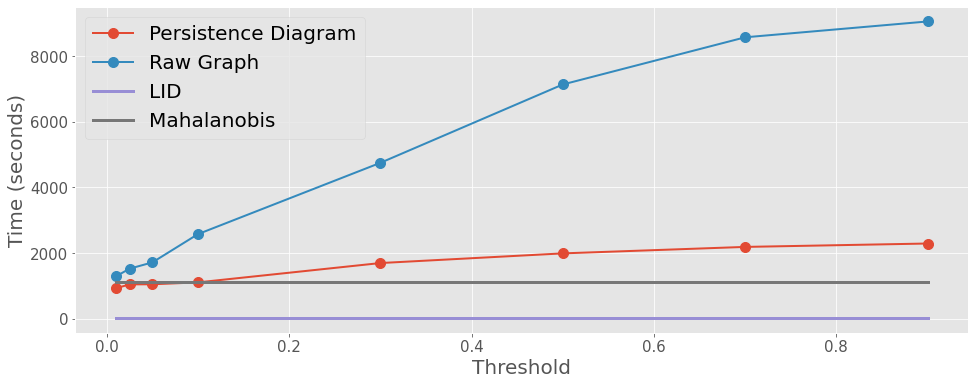

In [130]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
t_lid2 = np.repeat(t_lid, len(t_pd))
t_maha2 = np.repeat(t_maha, len(t_pd))
plt.figure(figsize=(16,6))

plt.plot(t, t_pd, "o-", label="Persistence Diagram", ms=10, linewidth=2)
plt.plot(t, t_rg, "o-", label="Raw Graph", ms=10, linewidth=2)
plt.plot(t, t_lid2, label="LID", linewidth=3)
plt.plot(t, t_maha2, label="Mahalanobis", linewidth=3)
plt.xlabel("Threshold", fontsize=20)
plt.ylabel("Time (seconds)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
#plt.show()
plt.savefig("/Users/m.goibert/Downloads/complexity_comparisons", dpi=500)

### ResNet exp

In [92]:
# threshold : skip layers (0.05) --> first try, not really useful
exp = 1601387623
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][0]

Common configuration {'dataset_size': 500, 'kernel_type': 'SlicedWasserstein', 'architecture': 'cifar_resnet_1', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'thresholds': '6:0.05_11:0.05_16:0.05_21:0.05_26:0.05_31:0.05_36:0.05_41:0.05_45:0.05_46:0.05_47:0.05', 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'n_jobs': 4, 'sigmoidize': True, 'noise': 0.0, 'attack_backend': 'FOOLBOX', 'dataset': 'CIFAR10', 'epochs': 100, 'raw_graph_pca': -1, 'embedding_type': 'PersistentDiagram'}


,run_id,attack_type,all_epsilons,linf_diff,unsupervised_predictions,supervised_predictions,aucs_l2_norm,unsupervised_metrics,detailed_times_protocolar_datasets,detailed_times_stats,detailed_times_embeddings,time,name,l2_diff,supervised_metrics
0,0,PGD,0.01;0.1;0.4,"{'0.01': [0.010000000000000009, 0.010000000000...","{'0.01': [[-0.5000000000000338, -0.50000000000...","{'0.01': [[-0.43857367209088477, -0.1829488722...",None,{'0.01': {'auc': {'upper_bound': 0.59450884288...,0.078901,2.952492,47773.37039,48234.227876,Graph,"{'0.01': [0.4030261028541503, 0.50050078921015...",{'0.01': {'auc': {'upper_bound': 0.62082396349...
1,1,CW,1.0,None,None,None,None,None,NaN,NaN,NaN,NaN,None,None,None


In [133]:
# Threshold : "0:0.05_45:0.05_46:0.05_47:0.05_43:0.05" (first, last and skip between blocks)
exp = 1601460430
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][0]

Common configuration {'dataset_size': 500, 'epochs': 100, 'raw_graph_pca': -1, 'kernel_type': 'SlicedWasserstein', 'embedding_type': 'PersistentDiagram', 'architecture': 'cifar_resnet_1', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'thresholds': '0:0.05_45:0.05_46:0.05_47:0.05_43:0.05', 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'n_jobs': 20, 'sigmoidize': True, 'noise': 0.0, 'attack_backend': 'FOOLBOX', 'dataset': 'CIFAR10', 'all_epsilons': '0.01;0.1;0.4', 'attack_type': 'PGD'}


,run_id,linf_diff,unsupervised_predictions,supervised_predictions,aucs_l2_norm,unsupervised_metrics,detailed_times_protocolar_datasets,detailed_times_stats,detailed_times_embeddings,time,name,l2_diff,supervised_metrics
0,0,"{'0.01': [0.010000000000000009, 0.010000000000...","{'0.01': [[-0.10000000000000009, -0.1000000000...","{'0.01': [[1.0535648594550119e-19, 1.053564911...",None,"{'0.01': {'auc': {'upper_bound': 0.5, 'value':...",667.523824,5684.108074,40201.146128,47144.473468,Graph,"{'0.01': [0.4030261028541518, 0.50050078921016...",{'0.01': {'auc': {'upper_bound': 0.59125320260...


In [21]:
# Threshold : "12:0.05_13:0.05_14:0.05_15:0.05_16:0.05_17:0.05_18:0.05_19:0.05_20:0.05_21:0.05"
# (Second block, q=0.05)
exp = 1601623946
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][0]

Common configuration {'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'embedding_type': 'PersistentDiagram', 'kernel_type': 'SlicedWasserstein', 'noise': 0.0, 'thresholds': '12:0.05_13:0.05_14:0.05_15:0.05_16:0.05_17:0.05_18:0.05_19:0.05_20:0.05_21:0.05', 'sigmoidize': True, 'attack_type': 'PGD', 'raw_graph_pca': -1, 'dataset_size': 500, 'attack_backend': 'FOOLBOX', 'architecture': 'cifar_resnet_1', 'epochs': 100, 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'all_epsilons': '0.01;0.1;0.4', 'dataset': 'CIFAR10', 'n_jobs': 20}


,run_id,supervised_predictions,name,time,detailed_times_stats,detailed_times_protocolar_datasets,detailed_times_embeddings,linf_diff,supervised_metrics,l2_diff,aucs_l2_norm,unsupervised_metrics,unsupervised_predictions
0,0,"{'0.01': [[0.002610675456465199, 0.00543735852...",Graph,60684.309166,3.002052,0.367055,59612.216326,"{'0.01': [0.010000000000000009, 0.010000000000...",{'0.01': {'auc': {'upper_bound': 0.64250885801...,"{'0.01': [0.4030261028541518, 0.50050078921016...",None,"{'0.01': {'auc': {'upper_bound': 0.5, 'value':...","{'0.01': [[-0.10000000000000009, -0.1000000000..."


In [23]:
# Threshold : "12:0.1_13:0.1_14:0.1_15:0.1_16:0.1_17:0.1_18:0.1_19:0.1_20:0.1_21:0.1" (Second block, q=0.1)
exp = 1601715997
df = my_db.show_experiment(exp)
df
df["unsupervised_metrics"][0]

Common configuration {'n_jobs': 20, 'all_epsilons': '0.01;0.1;0.4', 'attack_backend': 'FOOLBOX', 'noise': 0.0, 'embedding_type': 'PersistentDiagram', 'dataset': 'CIFAR10', 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'raw_graph_pca': -1, 'attack_type': 'PGD', 'thresholds': '12:0.1_13:0.1_14:0.1_15:0.1_16:0.1_17:0.1_18:0.1_19:0.1_20:0.1_21:0.1', 'epochs': 100, 'sigmoidize': True, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'kernel_type': 'SlicedWasserstein', 'architecture': 'cifar_resnet_1', 'dataset_size': 500}


{'0.01': {'auc': {'upper_bound': 0.5, 'value': 0.5, 'lower_bound': 0.5}},
 '0.1': {'auc': {'upper_bound': 0.8066165327111283,
   'value': 0.769072,
   'lower_bound': 0.7311624739599384}},
 '0.4': {'auc': {'upper_bound': 0.9870183995891113,
   'value': 0.980096,
   'lower_bound': 0.9687662663236543}}}

In [40]:
# (Thomas better with layers 0,1,34,35)
# Threshold : "12:0.15_13:0.15_14:0.15_15:0.15_16:0.15_17:0.15_18:0.15_19:0.15_20:0.15_21:0.15"
# (Second block, q=0.15)
exp = 1601812281
df = my_db.show_experiment(exp)
df
df["unsupervised_metrics"][0]

Common configuration {'kernel_type': 'SlicedWasserstein', 'sigmoidize': True, 'dataset_size': 500, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'attack_type': 'PGD', 'architecture': 'cifar_resnet_1', 'thresholds': '12:0.15_13:0.15_14:0.15_15:0.15_16:0.15_17:0.15_18:0.15_19:0.15_20:0.15_21:0.15', 'raw_graph_pca': -1, 'n_jobs': 20, 'epochs': 100, 'noise': 0.0, 'all_epsilons': '0.01;0.1;0.4', 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'attack_backend': 'FOOLBOX', 'dataset': 'CIFAR10', 'embedding_type': 'PersistentDiagram'}


{'0.01': {'auc': {'upper_bound': 0.5, 'value': 0.5, 'lower_bound': 0.5}},
 '0.1': {'auc': {'upper_bound': 0.8063191263043337,
   'value': 0.7736159999999999,
   'lower_bound': 0.7344199923685919}},
 '0.4': {'auc': {'upper_bound': 0.9940841656462919,
   'value': 0.9844480000000001,
   'lower_bound': 0.9758257760813491}}}

In [39]:
# Threshold : "0:0.1_1:0.1_34:0.1_35:0.1"
# (Like Thomas, q=0.1, with 100 ex)
exp = 1601970057
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][0]

Common configuration {'kernel_type': 'SlicedWasserstein', 'sigmoidize': True, 'dataset_size': 100, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'attack_type': 'PGD', 'architecture': 'cifar_resnet_1', 'thresholds': '0:0.1_1:0.1_34:0.1_35:0.1', 'raw_graph_pca': -1, 'n_jobs': 20, 'epochs': 100, 'noise': 0.0, 'all_epsilons': '0.01;0.1;0.4', 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'attack_backend': 'FOOLBOX', 'dataset': 'CIFAR10', 'embedding_type': 'PersistentDiagram'}


,run_id,unsupervised_metrics,aucs_l2_norm,time,detailed_times_embeddings,detailed_times_stats,detailed_times_protocolar_datasets,supervised_predictions,name,linf_diff,supervised_metrics,unsupervised_predictions,l2_diff
0,0,{'0.01': {'auc': {'upper_bound': 0.62316078817...,None,40876.351294,40249.870552,3.082733,165.222549,"{'0.01': [[0.24799685653864675, 0.518367966086...",Graph,"{'0.01': [0.010000000000000009, 0.010000000000...",{'0.01': {'auc': {'upper_bound': 0.71377687402...,"{'0.01': [[0.0009786334021981702, 0.0009191580...","{'0.01': [0.46402038748312974, 0.4519837607702..."


In [34]:
# TSeveral thresholds with q=0.1
exp = 1602058604
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][2]
#df["thresholds"][2]

Common configuration {'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'attack_type': 'PGD', 'noise': 0.0, 'attack_backend': 'FOOLBOX', 'embedding_type': 'PersistentDiagram', 'kernel_type': 'SlicedWasserstein', 'sigmoidize': True, 'dataset_size': 100, 'architecture': 'cifar_resnet_1', 'raw_graph_pca': -1, 'n_jobs': 20, 'epochs': 100, 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'all_epsilons': '0.01;0.1;0.4', 'dataset': 'CIFAR10'}


,run_id,thresholds,unsupervised_metrics,detailed_times_embeddings,detailed_times_stats,detailed_times_protocolar_datasets,supervised_predictions,name,linf_diff,supervised_metrics,unsupervised_predictions,aucs_l2_norm,time,ERROR,l2_diff
0,0,2_0.1_3:0.1_4:0.1_5:0.1_6:0.1,None,NaN,NaN,NaN,None,None,None,None,None,None,NaN,Traceback\ \(most\ recent\ call\ last\)\:\\n\ ...,None
1,1,0:0.1_1:0.1,{'0.01': {'auc': {'upper_bound': 0.65987618959...,35425.772005,3.102010,0.021804,"{'0.01': [[0.3960227338680874, 0.6049389311387...",Graph,"{'0.01': [0.010000000000000009, 0.010000000000...",{'0.01': {'auc': {'upper_bound': 0.70015113636...,"{'0.01': [[6.0133511610160895e-06, 7.032071788...",None,35856.585936,None,"{'0.01': [0.46402038748312974, 0.4519837607702..."
2,2,37:0.1_38:0.1_39:0.1_40:0.1_41:0.1,{'0.01': {'auc': {'upper_bound': 0.58331955128...,44396.441142,3.023222,0.109612,"{'0.01': [[0.5135431148828948, -0.458932430961...",Graph,"{'0.01': [0.010000000000000009, 0.010000000000...",{'0.01': {'auc': {'upper_bound': 0.72909436392...,"{'0.01': [[-0.5000000000001495, -0.50000000000...",None,44843.345925,None,"{'0.01': [0.46402038748312974, 0.4519837607702..."


In [50]:
# Several thresholds with q=0.1
# BEST RESULTS SO FAR
exp = 1602240179
df = my_db.show_experiment(exp)
df
df["unsupervised_metrics"][1]
df["thresholds"][0]

Common configuration {'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'attack_type': 'PGD', 'noise': 0.0, 'attack_backend': 'FOOLBOX', 'embedding_type': 'PersistentDiagram', 'kernel_type': 'SlicedWasserstein', 'sigmoidize': True, 'dataset_size': 100, 'architecture': 'cifar_resnet_1', 'raw_graph_pca': -1, 'n_jobs': 20, 'epochs': 100, 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'all_epsilons': '0.01;0.1;0.4', 'dataset': 'CIFAR10'}


'2:0.1_3:0.1_4:0.1_5:0.1_6:0.1'

In [58]:
# Several thresholds with q=0.1 and qu=0.05
exp = 1602401391
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][1]
#df["thresholds"][1]

Common configuration {'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'attack_type': 'PGD', 'noise': 0.0, 'attack_backend': 'FOOLBOX', 'embedding_type': 'PersistentDiagram', 'kernel_type': 'SlicedWasserstein', 'sigmoidize': True, 'dataset_size': 100, 'architecture': 'cifar_resnet_1', 'raw_graph_pca': -1, 'n_jobs': 20, 'epochs': 100, 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'all_epsilons': '0.01;0.1;0.4', 'dataset': 'CIFAR10'}


,run_id,thresholds,unsupervised_metrics,aucs_l2_norm,time,detailed_times_embeddings,detailed_times_stats,detailed_times_protocolar_datasets,supervised_predictions,name,linf_diff,supervised_metrics,unsupervised_predictions,l2_diff
0,0,32:0.05_33:0.05_34:0.05_35:0.05_36:0.05_37:0.0...,{'0.01': {'auc': {'upper_bound': 0.58611669209...,None,45034.926005,44546.957746,3.084773,0.043839,"{'0.01': [[-0.1574122215155857, 0.272537239121...",Graph,"{'0.01': [0.010000000000000009, 0.010000000000...",{'0.01': {'auc': {'upper_bound': 0.74578785051...,"{'0.01': [[0.0001608912357786707, 0.0002216277...","{'0.01': [0.46402038748312974, 0.4519837607702..."
1,1,27:0.1_28:0.1_29:0.1_30:0.1_31:0.1_32:0.1_33:0...,"{'0.01': {'auc': {'upper_bound': 0.5, 'value':...",None,78650.990439,74808.794545,3.077029,0.063962,"{'0.01': [[-0.004624830821326031, -0.000496974...",Graph,"{'0.01': [0.010000000000000009, 0.010000000000...",{'0.01': {'auc': {'upper_bound': 0.72194376811...,"{'0.01': [[-0.09999999999999998, -0.0999999999...","{'0.01': [0.46402038748312974, 0.4519837607702..."


In [63]:
# Several thresholds with q=0.15 and Magnitude Increase V3
exp = 1602535560
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][0]
#df["thresholds"][0]

Common configuration {'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'attack_type': 'PGD', 'noise': 0.0, 'attack_backend': 'FOOLBOX', 'embedding_type': 'PersistentDiagram', 'sigmoidize': False, 'dataset_size': 500, 'architecture': 'cifar_resnet_1', 'raw_graph_pca': -1, 'n_jobs': 8, 'epochs': 100, 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'all_epsilons': '0.01;0.1;0.4', 'dataset': 'CIFAR10'}


,run_id,thresholds,unsupervised_metrics,aucs_l2_norm,time,detailed_times_E_PersistentDiagram,detailed_times_T_UnderoptimizedMagnitudeIncreaseV3,detailed_times_embeddings,detailed_times_graph,detailed_times_protocolar_datasets,ERROR,supervised_predictions,name,linf_diff,supervised_metrics,unsupervised_predictions,l2_diff
0,0,27:0.15_28:0.15_29:0.15_30:0.15_31:0.15_32:0.1...,{'0.01': {'auc': {'upper_bound': 0.62655162480...,None,22124.986664,26036.306498,0.008023,21297.380928,556.043445,0.211382,None,"{'0.01': [[0.17927986116535394, -0.13941010450...",Graph,"{'0.01': [0.010000000000000009, 0.010000000000...",{'0.01': {'auc': {'upper_bound': 0.70530211867...,"{'0.01': [[-0.01486974359572657, 0.00281768390...","{'0.01': [0.4030261028541518, 0.50050078921016..."
1,1,0;0.15_1:0.15_27:0.15_28:0.15_29:0.15_30:0.15_...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,Traceback\ \(most\ recent\ call\ last\)\:\\n\ ...,None,None,None,None,None,None


In [70]:
# Several thresholds with q=0.15 and Magnitude Increase V3
exp = 1602575243
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][0]
#df["thresholds"][0]

Common configuration {'sigmoidize': False, 'dataset_size': 500, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'attack_type': 'PGD', 'architecture': 'cifar_resnet_1', 'thresholds': '0:0.1_1:0.1_27:0.1_28:0.1_29:0.1_30:0.1_31:0.1_32:0.1_33:0.1_34:0.1_35:0.1_36:0.1_37:0.1_38:0.1_39:0.1_40:0.1_41:0.1', 'raw_graph_pca': -1, 'n_jobs': 8, 'epochs': 100, 'noise': 0.0, 'all_epsilons': '0.01;0.1;0.4', 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'attack_backend': 'FOOLBOX', 'dataset': 'CIFAR10', 'embedding_type': 'PersistentDiagram'}


,run_id,unsupervised_metrics,aucs_l2_norm,time,detailed_times_E_PersistentDiagram,detailed_times_T_UnderoptimizedMagnitudeIncreaseV3,detailed_times_embeddings,detailed_times_graph,detailed_times_protocolar_datasets,supervised_predictions,name,linf_diff,supervised_metrics,unsupervised_predictions,l2_diff
0,0,{'0.01': {'auc': {'upper_bound': 0.55433480894...,None,14909.553456,17460.429197,0.008144,14011.337527,501.65528,0.181511,"{'0.01': [[0.3422388663732101, 0.4463484561787...",Graph,"{'0.01': [0.010000000000000009, 0.010000000000...",{'0.01': {'auc': {'upper_bound': 0.61238080427...,"{'0.01': [[-6.486845215337828, -0.903908637591...","{'0.01': [0.4030261028541518, 0.50050078921016..."


In [73]:
# Several thresholds with q=0.1 and Magnitude Increase V3 and without sigmoidize
exp = 1602591170
df = my_db.show_experiment(exp)
df
df["unsupervised_metrics"][0]
#df["thresholds"][0]

Common configuration {'sigmoidize': False, 'dataset_size': 500, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'attack_type': 'PGD', 'architecture': 'cifar_resnet_1', 'thresholds': '27:0.1_28:0.1_29:0.1_30:0.1_31:0.1_32:0.1_33:0.1_34:0.1_35:0.1_36:0.1_37:0.1_38:0.1_39:0.1_40:0.1_41:0.1', 'raw_graph_pca': -1, 'n_jobs': 8, 'epochs': 100, 'noise': 0.0, 'all_epsilons': '0.01;0.1;0.4', 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'attack_backend': 'FOOLBOX', 'dataset': 'CIFAR10', 'embedding_type': 'PersistentDiagram'}


{'0.01': {'auc': {'upper_bound': 0.6254417260755547,
   'value': 0.57808,
   'lower_bound': 0.5286969275690585}},
 '0.1': {'auc': {'upper_bound': 0.8843292453042284,
   'value': 0.855944,
   'lower_bound': 0.8257608890872591}},
 '0.4': {'auc': {'upper_bound': 0.983517569120685,
   'value': 0.967408,
   'lower_bound': 0.9480997678589557}}}

In [17]:
# Several thresholds with q=0.1 and Magnitude Increase V3 and without sigmoidize
exp = 1602608020
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][0]
#df["thresholds"][0]

Common configuration {'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'dataset_size': 500, 'raw_graph_pca': -1, 'noise': 0.0, 'embedding_type': 'PersistentDiagram', 'dataset': 'CIFAR10', 'thresholds': '0:0.1_1:0.1_2:0.1_39:0.1_40:0.1_41:0.1', 'all_epsilons': '0.01;0.1;0.4', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'epochs': 100, 'attack_backend': 'FOOLBOX', 'architecture': 'cifar_resnet_1', 'attack_type': 'PGD', 'n_jobs': 8}


,run_id,sigmoidize,detailed_times_T_UnderoptimizedMagnitudeIncreaseV3,detailed_times_sigmoidize,detailed_times_embeddings,detailed_times_graph,detailed_times_stats,detailed_times_protocolar_datasets,detailed_times_E_PersistentDiagram,name,unsupervised_predictions,l2_diff,time,linf_diff,unsupervised_metrics,supervised_metrics,supervised_predictions,aucs_l2_norm
0,0,True,0.006355,757.541527,19476.722516,398.961429,3.205839,0.151705,4406.474150,Graph,"{'0.01': [[-10.99994358168863, -6.654860376542...","{'0.01': [0.4030261028541518, 0.50050078921016...",20223.524749,"{'0.01': [0.010000000000000009, 0.010000000000...",{'0.01': {'auc': {'upper_bound': 0.55653256038...,{'0.01': {'auc': {'upper_bound': 0.57765618966...,"{'0.01': [[0.9391003603054994, 0.9259014587099...",None
1,1,False,0.006318,NaN,7004.848940,408.812942,NaN,0.149054,4404.130655,Graph,"{'0.01': [[-3.944169359040999, -0.279450689107...","{'0.01': [0.4030261028541518, 0.50050078921016...",7789.172600,"{'0.01': [0.010000000000000009, 0.010000000000...",{'0.01': {'auc': {'upper_bound': 0.55249473451...,{'0.01': {'auc': {'upper_bound': 0.57107812129...,"{'0.01': [[-5.893363141995287e-12, 1.717694072...",None


In [30]:
# Several thresholds with q=0.1 and Magnitude Increase V3 (big exp with all layers)
exp = 1602663322
df = my_db.show_experiment(exp)
df
df["unsupervised_metrics"][1]
#df["thresholds"][1]

Common configuration {'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'dataset_size': 500, 'raw_graph_pca': -1, 'sigmoidize': True, 'noise': 0.0, 'embedding_type': 'PersistentDiagram', 'dataset': 'CIFAR10', 'all_epsilons': '0.01;0.1;0.4', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'epochs': 100, 'attack_backend': 'FOOLBOX', 'architecture': 'cifar_resnet_1', 'attack_type': 'PGD', 'n_jobs': 8}


{'0.01': {'auc': {'upper_bound': 0.6573979902609826,
   'value': 0.6113280000000001,
   'lower_bound': 0.5715592840163937}},
 '0.1': {'auc': {'upper_bound': 0.7859309880072037,
   'value': 0.745296,
   'lower_bound': 0.7067297654512226}},
 '0.4': {'auc': {'upper_bound': 0.9532307943307337,
   'value': 0.9216880000000001,
   'lower_bound': 0.8945675524227847}}}

In [43]:
# Several thresholds with q=0.1 and Magnitude Increase V3 
exp = 1602839787
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][1]
#df["thresholds"][1]

Common configuration {'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'dataset_size': 500, 'raw_graph_pca': -1, 'sigmoidize': True, 'noise': 0.0, 'embedding_type': 'PersistentDiagram', 'dataset': 'CIFAR10', 'all_epsilons': '0.01;0.1;0.4', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'epochs': 100, 'attack_backend': 'FOOLBOX', 'architecture': 'cifar_resnet_1', 'attack_type': 'PGD', 'n_jobs': 1}


,run_id,thresholds,detailed_times_T_UnderoptimizedMagnitudeIncreaseV3,detailed_times_sigmoidize,detailed_times_embeddings,detailed_times_graph,detailed_times_stats,detailed_times_protocolar_datasets,detailed_times_E_PersistentDiagram,name,unsupervised_predictions,l2_diff,time,linf_diff,unsupervised_metrics,supervised_metrics,supervised_predictions,aucs_l2_norm
0,0,0:0.1_1:0.1_2:0.1_3:0.1_4:0.1_5:0.1_6:0.1_37:0...,0.007372,22.003738,11153.179267,453.964700,3.183254,0.224872,10677.097820,Graph,"{'0.01': [[-34.999698932331846, 2.736665933866...","{'0.01': [0.4030261028541518, 0.50050078921016...",12144.075997,"{'0.01': [0.010000000000000009, 0.010000000000...",{'0.01': {'auc': {'upper_bound': 0.66254701313...,{'0.01': {'auc': {'upper_bound': 0.71195646281...,"{'0.01': [[-0.9799362158453778, 0.860620491529...",None
1,1,0:0.1_1:0.1_2:0.1_3:0.1_4:0.1_5:0.1_6:0.1_32:0...,0.007083,26.188113,15773.451215,494.707104,3.216699,0.148843,15252.408397,Graph,"{'0.01': [[-34.999685057584045, 1.854419920732...","{'0.01': [0.4030261028541518, 0.50050078921016...",16811.845450,"{'0.01': [0.010000000000000009, 0.010000000000...",{'0.01': {'auc': {'upper_bound': 0.66829934971...,{'0.01': {'auc': {'upper_bound': 0.73635735597...,"{'0.01': [[-0.9999980764367938, 0.999985530108...",None


In [52]:
# Several thresholds with q=0.1 and Magnitude Increase V3 
# BEST SO FAR ! MATCH LID
exp = 1602875064
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][1]
#df["thresholds"][1]

Common configuration {'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'dataset_size': 500, 'raw_graph_pca': -1, 'sigmoidize': True, 'noise': 0.0, 'embedding_type': 'PersistentDiagram', 'dataset': 'CIFAR10', 'all_epsilons': '0.01;0.1;0.4', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'epochs': 100, 'attack_backend': 'FOOLBOX', 'architecture': 'cifar_resnet_1', 'attack_type': 'PGD', 'n_jobs': 1}


,run_id,thresholds,detailed_times_T_UnderoptimizedMagnitudeIncreaseV3,detailed_times_sigmoidize,detailed_times_embeddings,detailed_times_graph,detailed_times_stats,detailed_times_protocolar_datasets,detailed_times_E_PersistentDiagram,name,unsupervised_predictions,l2_diff,time,linf_diff,unsupervised_metrics,supervised_metrics,supervised_predictions,aucs_l2_norm
0,0,0:0.1_1:0.1_2:0.1_41:0.1_42:0.1_43:0.1,0.007641,12.416736,1204.353268,374.677867,3.078206,0.243249,817.182078,Graph,"{'0.01': [[-26.66648495537661, -4.300924903333...","{'0.01': [0.4030261028541518, 0.50050078921016...",1987.421062,"{'0.01': [0.010000000000000009, 0.010000000000...",{'0.01': {'auc': {'upper_bound': 0.66683976514...,{'0.01': {'auc': {'upper_bound': 0.71330502354...,"{'0.01': [[-0.9998020658756575, 0.999434803788...",None
1,1,32:0.1_33:0.1_34:0.1_35:0.1_36:0.1_37:0.1_38:0...,0.007401,24.179566,11116.759410,475.758028,3.282608,0.105242,10616.705475,Graph,"{'0.01': [[-14.199960935070333, 4.444924307733...","{'0.01': [0.4030261028541518, 0.50050078921016...",11930.369400,"{'0.01': [0.010000000000000009, 0.010000000000...",{'0.01': {'auc': {'upper_bound': 0.74807854475...,{'0.01': {'auc': {'upper_bound': 0.84964433523...,"{'0.01': [[-0.6836465582857921, 0.143346921356...",None


In [4]:
# Several thresholds with Magnitude Increase V3 (several q for best threshold)
# MORE EXP BEST THRESHOLD
exp = 1602922084
df = my_db.show_experiment(exp)
df
df["unsupervised_metrics"][6]
#df["thresholds"][1]

Common configuration {'noise': 0.0, 'all_epsilons': '0.01;0.1;0.4', 'dataset': 'CIFAR10', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'epochs': 100, 'architecture': 'cifar_resnet_1', 'n_jobs': 1, 'attack_type': 'PGD', 'raw_graph_pca': -1, 'attack_backend': 'FOOLBOX', 'embedding_type': 'PersistentDiagram', 'dataset_size': 500, 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'sigmoidize': True}


{'0.01': {'auc': {'upper_bound': 0.7492452733875621,
   'value': 0.7135039999999999,
   'lower_bound': 0.6728795168177033}},
 '0.1': {'auc': {'upper_bound': 0.9435172798601034,
   'value': 0.9183680000000001,
   'lower_bound': 0.8987026960394704}},
 '0.4': {'auc': {'upper_bound': 0.9839057308894044,
   'value': 0.9663200000000001,
   'lower_bound': 0.9503121251378497}}}

In [52]:
# Several thresholds with Magnitude Increase V3 (several q for best threshold)
# EVEN MORE EXP BEST THRESHOLD
exp = 1603007218
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][12]
#df["thresholds"][12]

Common configuration {'noise': 0.0, 'all_epsilons': '0.01;0.1;0.4', 'dataset': 'CIFAR10', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'epochs': 100, 'architecture': 'cifar_resnet_1', 'n_jobs': 1, 'attack_type': 'PGD', 'raw_graph_pca': -1, 'attack_backend': 'FOOLBOX', 'embedding_type': 'PersistentDiagram', 'dataset_size': 500, 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'sigmoidize': True}


,run_id,thresholds,time,supervised_predictions,linf_diff,aucs_l2_norm,unsupervised_predictions,unsupervised_metrics,supervised_metrics,name,detailed_times_sigmoidize,detailed_times_stats,detailed_times_embeddings,detailed_times_graph,detailed_times_T_UnderoptimizedMagnitudeIncreaseV3,detailed_times_E_PersistentDiagram,detailed_times_protocolar_datasets,l2_diff
0,0,31:0.075_32:0.075_33:0.075_34:0.075_35:0.075_3...,15534.375084,"{'0.01': [[-0.3990750545466981, -0.13178573271...","{'0.01': [0.010000000000000009, 0.010000000000...",None,"{'0.01': [[-30.15554998481806, -0.055513473067...",{'0.01': {'auc': {'upper_bound': 0.77237200086...,{'0.01': {'auc': {'upper_bound': 0.85415543029...,Graph,20.993927,5770.753502,8302.974298,460.961124,0.007565,7820.912289,676.136509,"{'0.01': [0.4030261028541518, 0.50050078921016..."
1,1,30:0.075_31:0.075_32:0.075_33:0.075_34:0.075_3...,9379.748175,"{'0.01': [[-0.3990750545466981, -0.13178573271...","{'0.01': [0.010000000000000009, 0.010000000000...",None,"{'0.01': [[-30.15554998481806, -0.055513473067...",{'0.01': {'auc': {'upper_bound': 0.77237200086...,{'0.01': {'auc': {'upper_bound': 0.85415543029...,Graph,21.280372,3.023822,8571.916375,447.755826,0.007434,8102.763520,0.138204,"{'0.01': [0.4030261028541518, 0.50050078921016..."
2,2,29:0.075_30:0.075_31:0.075_32:0.075_33:0.075_3...,11330.377757,"{'0.01': [[-0.9798461879292661, 0.883629690772...","{'0.01': [0.010000000000000009, 0.010000000000...",None,"{'0.01': [[-30.999873021667785, -4.98462533471...",{'0.01': {'auc': {'upper_bound': 0.76168984078...,{'0.01': {'auc': {'upper_bound': 0.82096118463...,Graph,22.772098,2.993760,10482.168951,465.246138,0.006701,9994.036379,0.136579,"{'0.01': [0.4030261028541518, 0.50050078921016..."
3,3,28:0.075_29:0.075_30:0.075_31:0.075_32:0.075_3...,11546.534653,"{'0.01': [[-0.9798461879292661, 0.883629690772...","{'0.01': [0.010000000000000009, 0.010000000000...",None,"{'0.01': [[-30.999873021667785, -4.98462533471...",{'0.01': {'auc': {'upper_bound': 0.76168984078...,{'0.01': {'auc': {'upper_bound': 0.82096118463...,Graph,23.421204,3.095968,10666.782877,466.548805,0.007022,10176.694488,0.138493,"{'0.01': [0.4030261028541518, 0.50050078921016..."
4,4,27:0.075_28:0.075_29:0.075_30:0.075_31:0.075_3...,13680.218461,"{'0.01': [[-0.9900814302834267, 0.846118037985...","{'0.01': [0.010000000000000009, 0.010000000000...",None,"{'0.01': [[-30.983702885621177, -0.00147041752...",{'0.01': {'auc': {'upper_bound': 0.75902674753...,{'0.01': {'auc': {'upper_bound': 0.81646172992...,Graph,24.545436,3.057592,12734.497582,481.654246,0.006737,12228.182852,0.101186,"{'0.01': [0.4030261028541518, 0.50050078921016..."
5,5,33:0.075_34:0.075_35:0.075_36:0.075_37:0.075_3...,7965.175080,"{'0.01': [[-0.5479521835740969, 0.319225891142...","{'0.01': [0.010000000000000009, 0.010000000000...",None,"{'0.01': [[-7.571404601922159, 3.3813008002425...",{'0.01': {'auc': {'upper_bound': 0.77661306515...,{'0.01': {'auc': {'upper_bound': 0.89062703278...,Graph,19.522696,3.114074,7217.954686,527.816571,0.007363,6670.506912,0.150781,"{'0.01': [0.4030261028541518, 0.50050078921016..."
6,6,34:0.075_35:0.075_36:0.075_37:0.075_38:0.075_3...,7891.312016,"{'0.01': [[-0.5479521835740969, 0.319225891142...","{'0.01': [0.010000000000000009, 0.010000000000...",None,"{'0.01': [[-7.571404601922159, 3.3813008002425...",{'0.01': {'auc': {'upper_bound': 0.77661306515...,{'0.01': {'auc': {'upper_bound': 0.89062703278...,Graph,19.569027,3.067743,7154.869638,447.167125,0.006343,6688.023727,0.130003,"{'0.01': [0.4030261028541518, 0.50050078921016..."
7,7,35:0.075_36:0.075_37:0.075_38:0.075_39:0.075_4...,6174.983542,"{'0.01': [[-0.5626668608747882, 0.698487518189...","{'0.01': [0.010000000000000009, 0.010000000000...",None,"{'0.01': [[-15.336575826977143, -0.00560654738...",{'0.01': {'auc': {'upper_bound': 0.78340065654...,{'0.01': {'auc': {'upper_bound': 0.88566720437...,Graph,17.618890,3.274719,5451.237990,425.562077,0.005841,5007.956079,0.104212,"{'0.01': [0.403026

In [275]:
# Several thresholds with Magnitude Increase V3 (several q for best threshold)
# SOME MORE EXP BEST THRESHOLD
exp = 1603113848
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][1]
#df["thresholds"][0]

Common configuration {'attack_type': 'PGD', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'architecture': 'cifar_resnet_1', 'dataset': 'CIFAR10', 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'attack_backend': 'FOOLBOX', 'embedding_type': 'PersistentDiagram', 'sigmoidize': True, 'dataset_size': 500, 'n_jobs': 1, 'all_epsilons': '0.01;0.1;0.4', 'noise': 0.0, 'raw_graph_pca': -1, 'epochs': 100}


,run_id,thresholds,name,aucs_l2_norm,linf_diff,detailed_times_graph,detailed_times_T_UnderoptimizedMagnitudeIncreaseV3,detailed_times_embeddings,detailed_times_sigmoidize,detailed_times_stats,detailed_times_protocolar_datasets,detailed_times_E_PersistentDiagram,unsupervised_metrics,supervised_predictions,unsupervised_predictions,time,supervised_metrics,l2_diff
0,0,41:0.075_42:0.075_43:0.075,Graph,None,"{'0.01': [0.010000000000000009, 0.010000000000...",385.920987,0.005102,499.907226,11.520008,3.108631,0.062979,102.401091,{'0.01': {'auc': {'upper_bound': 0.79587781268...,"{'0.01': [[-0.44161398843664623, 0.90788900243...","{'0.01': [[-0.001961472642956874, 0.0006881192...",1161.071608,{'0.01': {'auc': {'upper_bound': 0.89928592493...,"{'0.01': [0.4030261028541518, 0.50050078921016..."
1,1,42:0.075_43:0.075,Graph,None,"{'0.01': [0.010000000000000009, 0.010000000000...",378.134353,0.007511,489.022218,11.638227,3.048111,0.074385,99.189357,{'0.01': {'auc': {'upper_bound': 0.79587781268...,"{'0.01': [[-0.44161398843664623, 0.90788900243...","{'0.01': [[-0.001961472642956874, 0.0006881192...",1144.376051,{'0.01': {'auc': {'upper_bound': 0.89928592493...,"{'0.01': [0.4030261028541518, 0.50050078921016..."
2,2,43:0.075,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,None,None


In [109]:
# Several q with the good thresholds : 1603964670, 1604008604, 1604079226, 1604180730
exp = 1603964670
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][0]
#df["thresholds"][1]

Common configuration {'attack_type': 'PGD', 'dataset_size': 500, 'raw_graph_pca': -1, 'dataset': 'CIFAR10', 'all_epsilons': '0.01;0.05;0.1', 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'epochs': 100, 'noise': 0.0, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'attack_backend': 'FOOLBOX', 'architecture': 'cifar_resnet_1', 'n_jobs': 1, 'sigmoidize': False, 'embedding_type': 'PersistentDiagram'}


,run_id,thresholds,time,supervised_predictions,l2_diff,name,detailed_times_T_UnderoptimizedMagnitudeIncreaseV3,detailed_times_embeddings,detailed_times_graph,detailed_times_E_PersistentDiagram,detailed_times_protocolar_datasets,aucs_l2_norm,unsupervised_metrics,unsupervised_predictions,supervised_metrics,linf_diff
0,0,39:0.005_40:0.005_41:0.005_42:0.005_43:0.005,9676.965679,"{'0.01': [[0.04933181703231809, 0.043494354402...","{'0.01': [0.4030261028541503, 0.50050078921015...",Graph,0.007947,854.840874,453.970134,400.788723,7876.102669,None,{'0.01': {'auc': {'upper_bound': 0.61099695282...,"{'0.01': [[-0.1389411401387053, -0.00597581890...",{'0.01': {'auc': {'upper_bound': 0.77113801970...,"{'0.01': [0.010000000000000009, 0.010000000000..."
1,1,39:0.01_40:0.01_41:0.01_42:0.01_43:0.01,2080.233280,"{'0.01': [[0.00035313583023084336, 0.024238377...","{'0.01': [0.4030261028541503, 0.50050078921015...",Graph,0.009290,1120.346936,492.347902,627.901530,0.095719,None,{'0.01': {'auc': {'upper_bound': 0.75090454610...,"{'0.01': [[-1.3714975046045592, 0.003188973709...",{'0.01': {'auc': {'upper_bound': 0.82948744300...,"{'0.01': [0.010000000000000009, 0.010000000000..."
2,2,39:0.05_40:0.05_41:0.05_42:0.05_43:0.05,3902.534776,"{'0.01': [[-0.7980749931650372, 0.946499974966...","{'0.01': [0.4030261028541503, 0.50050078921015...",Graph,0.007038,2993.753390,512.820211,2480.783393,0.130235,None,{'0.01': {'auc': {'upper_bound': 0.91288769122...,"{'0.01': [[-0.160468806807484, 0.0106410326152...",{'0.01': {'auc': {'upper_bound': 0.91705471001...,"{'0.01': [0.010000000000000009, 0.010000000000..."
3,3,39:0.1_40:0.1_41:0.1_42:0.1_43:0.1,6452.794307,"{'0.01': [[0.0027290350741932777, 0.0061222757...","{'0.01': [0.4030261028541503, 0.50050078921015...",Graph,0.009837,5514.197105,459.112185,5054.915078,0.062042,None,{'0.01': {'auc': {'upper_bound': 0.92447048452...,"{'0.01': [[-0.916237345730234, 0.0213791521145...",{'0.01': {'auc': {'upper_bound': 0.93773546522...,"{'0.01': [0.010000000000000009, 0.010000000000..."
4,4,39:0.15_40:0.15_41:0.15_42:0.15_43:0.15,9054.087938,"{'0.01': [[0.002067425837243926, 0.04509832284...","{'0.01': [0.4030261028541503, 0.50050078921015...",Graph,0.009744,8093.150855,496.895865,7596.044643,0.192187,None,{'0.01': {'auc': {'upper_bound': 0.92810192003...,"{'0.01': [[-0.10181026981460936, -0.0964723738...",{'0.01': {'auc': {'upper_bound': 0.94379846389...,"{'0.01': [0.010000000000000009, 0.010000000000..."
5,5,39:0.2_40:0.2_41:0.2_42:0.2_43:0.2,10932.714860,"{'0.01': [[-0.004046642988046077, 0.0722869392...","{'0.01': [0.4030261028541503, 0.50050078921015...",Graph,0.007603,9948.458961,571.483493,9376.789607,0.525521,None,{'0.01': {'auc': {'upper_bound': 0.93295675151...,"{'0.01': [[-0.10280597395644439, -0.0913263494...",{'0.01': {'auc': {'upper_bound': 0.94686995169...,"{'0.01': [0.010000000000000009, 0.010000000000..."


In [32]:
#exp = 1604180730
#df = my_db.show_experiment(exp)
#df

timedf = dict()
timedf["q"] = np.asarray([0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 1.0])
timedf["time"] = np.asarray([2080.233280, 3902.534776, 6452.794307, 9054.087938, 10932.714860, 13521.698695, 16497.661867, 18646.447027, 20863.167335, 27185.830508, 32929.778076, 36831.556322, 51090.473197])
print(len(timedf["q"]))
print(len(timedf["time"]))

13
13


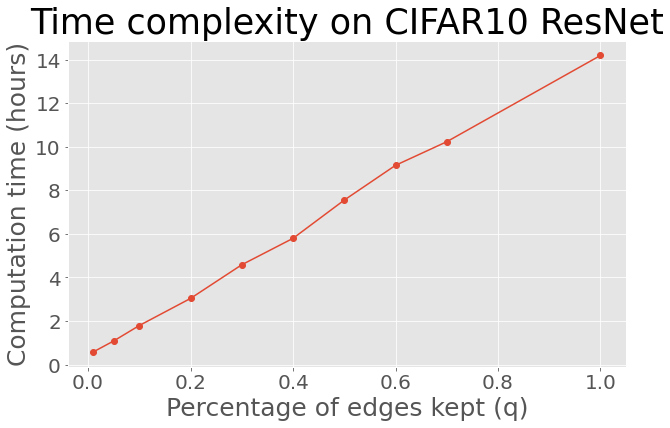

In [39]:
q2 = timedf["q"][[0,1,2,4,6,8,9,10,11,12]]
time2 = timedf["time"][[0,1,2,4,6,8,9,10,11,12]]
timedf = {"q":q2, "time":time2}
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(timedf["q"], timedf["time"]/3600, "o-")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Time complexity on CIFAR10 ResNet", fontsize=35)
plt.xlabel("Percentage of edges kept (q)", fontsize=25)
plt.ylabel("Computation time (hours)", fontsize=25)
plt.show()

In [87]:
my_db.show_experiment(1604008604)

Common configuration {'attack_type': 'PGD', 'dataset_size': 500, 'raw_graph_pca': -1, 'dataset': 'CIFAR10', 'all_epsilons': '0.01;0.05;0.1', 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'epochs': 100, 'noise': 0.0, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'attack_backend': 'FOOLBOX', 'architecture': 'cifar_resnet_1', 'n_jobs': 1, 'sigmoidize': False, 'embedding_type': 'PersistentDiagram'}


,run_id,thresholds,time,supervised_predictions,l2_diff,name,detailed_times_T_UnderoptimizedMagnitudeIncreaseV3,detailed_times_embeddings,detailed_times_graph,detailed_times_E_PersistentDiagram,detailed_times_protocolar_datasets,aucs_l2_norm,unsupervised_metrics,unsupervised_predictions,supervised_metrics,linf_diff
0,0,39:0.25_40:0.25_41:0.25_42:0.25_43:0.25,13521.698695,"{'0.01': [[-0.003894815011416474, 0.0669199243...","{'0.01': [0.4030261028541503, 0.50050078921015...",Graph,0.010288,12543.947815,602.105051,11941.653680,0.331620,None,{'0.01': {'auc': {'upper_bound': 0.93812528647...,"{'0.01': [[-0.10327857327979163, -0.0924662805...",{'0.01': {'auc': {'upper_bound': 0.95199058814...,"{'0.01': [0.010000000000000009, 0.010000000000..."
1,1,39:0.3_40:0.3_41:0.3_42:0.3_43:0.3,16497.661867,"{'0.01': [[-0.00550279493594915, 0.06889255089...","{'0.01': [0.4030261028541503, 0.50050078921015...",Graph,0.008131,15524.162970,627.564805,14896.385436,0.344739,None,{'0.01': {'auc': {'upper_bound': 0.93958065008...,"{'0.01': [[-0.10398931723000088, -0.0927161822...",{'0.01': {'auc': {'upper_bound': 0.95234410054...,"{'0.01': [0.010000000000000009, 0.010000000000..."
2,2,39:0.35_40:0.35_41:0.35_42:0.35_43:0.35,18646.447027,"{'0.01': [[-0.00644138397717787, 0.06699080242...","{'0.01': [0.4030261028541503, 0.50050078921015...",Graph,0.011516,17666.634839,630.861803,17035.580009,0.084861,None,{'0.01': {'auc': {'upper_bound': 0.93650921046...,"{'0.01': [[-0.10419268029730994, -0.0930132066...",{'0.01': {'auc': {'upper_bound': 0.95084950656...,"{'0.01': [0.010000000000000009, 0.010000000000..."
3,3,39:0.4_40:0.4_41:0.4_42:0.4_43:0.4,20863.167335,"{'0.01': [[0.011323879649804912, 0.07624246702...","{'0.01': [0.4030261028541503, 0.50050078921015...",Graph,0.008764,19888.808133,650.914078,19237.718120,0.669467,None,{'0.01': {'auc': {'upper_bound': 0.92529239418...,"{'0.01': [[-0.20493615684989386, -0.1843742245...",{'0.01': {'auc': {'upper_bound': 0.95272491057...,"{'0.01': [0.010000000000000009, 0.010000000000..."


Common configuration {'raw_graph_pca': -1, 'embedding_type': 'PersistentDiagram', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'attack_backend': 'FOOLBOX', 'epochs': 100, 'architecture': 'cifar_resnet_1', 'sigmoidize': False, 'noise': 0.0, 'dataset_size': 500, 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'dataset': 'CIFAR10', 'n_jobs': 1, 'all_epsilons': '0.01;0.05;0.1', 'attack_type': 'PGD'}
Common configuration {'raw_graph_pca': -1, 'embedding_type': 'PersistentDiagram', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'attack_backend': 'FOOLBOX', 'epochs': 100, 'architecture': 'cifar_resnet_1', 'sigmoidize': False, 'noise': 0.0, 'dataset_size': 500, 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'dataset': 'CIFAR10', 'n_jobs': 1, 'all_epsilons': '0.01;0.05;0.1', 'attack_type': 'PGD'}
Common configuration {'raw_graph_pca': -1, 'embedding_type': 'Pers

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

Common configuration {'raw_graph_pca': -1, 'embedding_type': 'PersistentDiagram', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'attack_backend': 'FOOLBOX', 'dataset_size': 500, 'epochs': 100, 'architecture': 'cifar_resnet_1', 'thresholds': '39:1_40:1_41:1_42:1_43:1', 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'dataset': 'CIFAR10', 'sigmoidize': False, 'n_jobs': 1, 'noise': 0.0, 'all_epsilons': '0.01;0.05;0.1', 'attack_type': 'PGD'}
               q                                             result
0   {0.01: 0.01}  {'0.01': {'auc': {'upper_bound': 0.75090454610...
1   {0.05: 0.05}  {'0.01': {'auc': {'upper_bound': 0.91288769122...
2     {0.1: 0.1}  {'0.01': {'auc': {'upper_bound': 0.92447048452...
3     {0.2: 0.2}  {'0.01': {'auc': {'upper_bound': 0.93295675151...
5     {0.3: 0.3}  {'0.01': {'auc': {'upper_bound': 0.93958065008...
7     {0.4: 0.4}  {'0.01': {'auc': {'upper_bound': 0.92529239418...
6     {0.5: 0.5

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

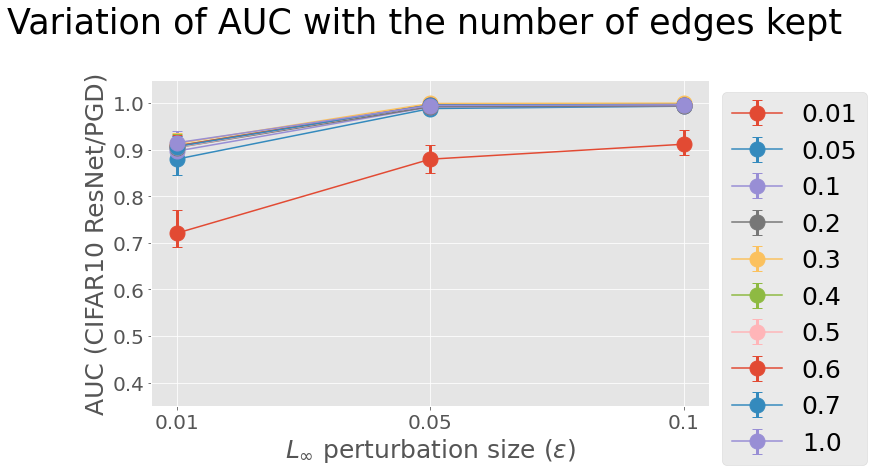

In [34]:
# Plot threshold variation
# Our : different q for the same layer (exp 1603964670, 1604008604, 1604079226, 1604180730)

result = my_db.show_experiment(1603964670).loc[[1,2,3,5],"unsupervised_metrics"]
data = {"q":dict(), "result":dict()}
df = pd.DataFrame(data)
df.loc[0] = [{0.01:0.01}, result[1]]
df.loc[1] = [{0.05:0.05}, result[2]]
df.loc[2] = [{0.1:0.1}, result[3]]
df.loc[3] = [{0.2:0.2}, result[5]]

exp2 = my_db.show_experiment(1604008604).loc[:,["thresholds","unsupervised_metrics"]]
q = float(exp2.loc[1,"thresholds"].split("_")[0].split(":")[1])
df.loc[df.shape[0]+1] = [{q:q}, exp2.loc[1,"unsupervised_metrics"]]
q = float(exp2.loc[3,"thresholds"].split("_")[0].split(":")[1])
df.loc[df.shape[0]+2] = [{q:q}, exp2.loc[3,"unsupervised_metrics"]]
exp3 = my_db.show_experiment(1604079226).loc[:,["thresholds","unsupervised_metrics"]]
for i, row in exp3.iterrows():
    q = float(exp3.loc[i,"thresholds"].split("_")[0].split(":")[1])
    df.loc[df.shape[0]+i] = [{q:q}, exp3.loc[i,"unsupervised_metrics"]]
exp4 = my_db.show_experiment(1604180730).loc[:,["unsupervised_metrics"]]
df.loc[df.shape[0]+i] = [{1:1}, exp4.loc[0,"unsupervised_metrics"]]

#df2 = df.loc[1:,:]
print(df)
df_variation_cifar = df.reset_index(drop=True)

plt.style.use('ggplot')
plt.figure(figsize=(10,6))

eps = list(df_variation_cifar.loc[0,"result"].keys())
for i, row in df_variation_cifar.iterrows():
    val = list()
    up = list()
    do = list()
    for ep in eps:
        #print(f'q = {float(list(row["q"].values())[0])}')
        val.append(row["result"][ep]["auc"]["value"])
        up.append(row["result"][ep]["auc"]["upper_bound"])
        do.append(row["result"][ep]["auc"]["lower_bound"])
    #plt.plot(eps,val, label=float(list(row["q"].values())[0]))
    plt.errorbar(eps, val, yerr=[np.array(up)-np.array(val),np.array(val)-np.array(do)], fmt='o-', label=float(list(row["q"].values())[0]), elinewidth=3, capsize=5, ms=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.35,1.05)
plt.ylabel(f"AUC (CIFAR10 ResNet/PGD)", fontsize=25)
plt.xlabel(r"$L_{\infty}$ perturbation size ($\varepsilon$)", fontsize=25)
plt.title(f"Variation of AUC with the number of edges kept \n", fontsize=35)
plt.legend(fontsize=25, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

              q                                             result
0  {0.01: 0.01}  {'0.01': {'auc': {'upper_bound': 0.75090454610...
1  {0.05: 0.05}  {'0.01': {'auc': {'upper_bound': 0.91288769122...
2    {0.1: 0.1}  {'0.01': {'auc': {'upper_bound': 0.92447048452...
3    {0.2: 0.2}  {'0.01': {'auc': {'upper_bound': 0.93295675151...
4    {0.3: 0.3}  {'0.01': {'auc': {'upper_bound': 0.93958065008...
5    {0.4: 0.4}  {'0.01': {'auc': {'upper_bound': 0.92529239418...
6    {0.5: 0.5}  {'0.01': {'auc': {'upper_bound': 0.93083351024...
7    {0.6: 0.6}  {'0.01': {'auc': {'upper_bound': 0.93414201614...
8    {0.7: 0.7}  {'0.01': {'auc': {'upper_bound': 0.93351894003...
9        {1: 1}  {'0.01': {'auc': {'upper_bound': 0.94566466933...


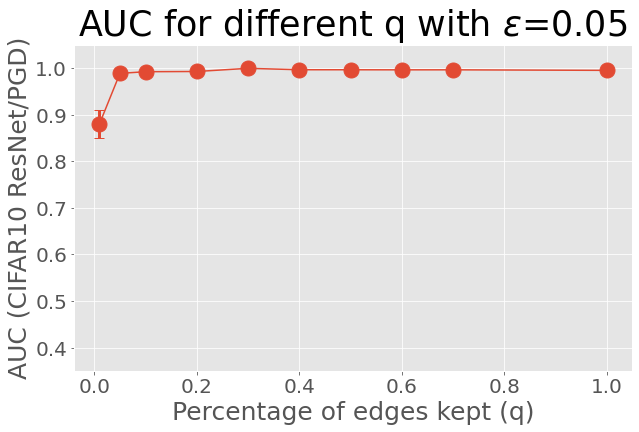

In [40]:
#new_index = [0,1,2,3,5,4,6,7]
#df_variation_cifar["indx"] = new_index
#df_variation_cifar = df_variation_cifar.set_index('indx')
#df_variation_cifar = df_variation_cifar.sort_index()
print(df_variation_cifar)

qs = [float(list(row["q"].values())[0]) for i, row in df_variation_cifar.iterrows()]
val = np.array([row["result"]["0.05"]["auc"]["value"] for i, row in df_variation_cifar.iterrows()])
up = np.array([row["result"]["0.05"]["auc"]["upper_bound"] for i, row in df_variation_cifar.iterrows()])
do = np.array([row["result"]["0.05"]["auc"]["lower_bound"] for i, row in df_variation_cifar.iterrows()])

plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.errorbar(qs, val, yerr=[up-val,val-do], fmt='o-', elinewidth=3, capsize=5, ms=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.35,1.05)
plt.ylabel(f"AUC (CIFAR10 ResNet/PGD)", fontsize=25)
plt.xlabel(r"Percentage of edges kept (q)", fontsize=25)
plt.title(r"AUC for different q with $\varepsilon$=0.05", fontsize=35)
#plt.legend(fontsize=25, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [43]:
#lid_cifar_res
lid_val = np.repeat(0.9285, len(qs))
lid_up = np.repeat(0.9482, len(qs))
lid_do = np.repeat(0.9101, len(qs))

#lid_cifar_time
lid_time = np.repeat(431.741758, len(timedf["q"]))

print(qs, timedf["q"])

[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1.0] [0.01 0.05 0.1  0.2  0.3  0.4  0.5  0.6  0.7  1.  ]


In [57]:
maha_val = np.repeat(0.7136, len(qs))
maha_up = np.repeat(0.7584, len(qs))
maha_do = np.repeat(0.6750, len(qs))

maha_time = np.repeat(28082.548665, len(timedf["q"]))

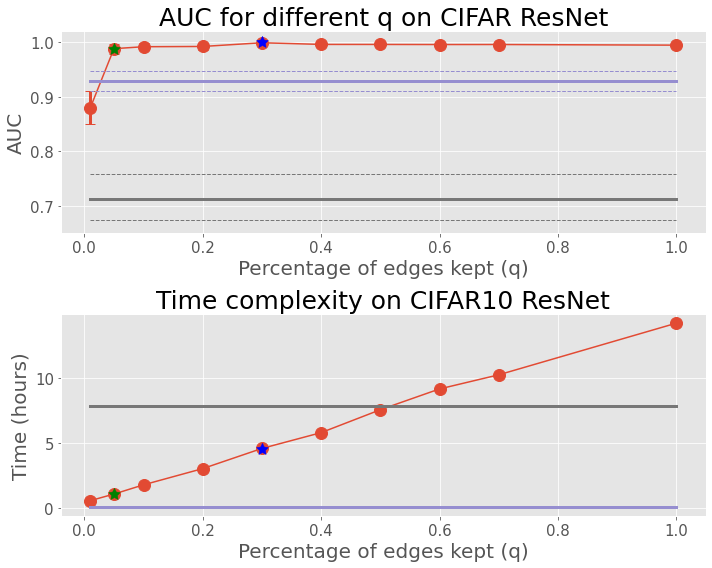

In [141]:
plt.style.use('ggplot')
#plt.figure(figsize=(10,12))
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,8))
ax1.errorbar(qs, val, yerr=[up-val,val-do], fmt='o-', elinewidth=3, capsize=5, ms=12, label="Persistance Diagram", zorder=1)
ax1.plot(qs, lid_val, "-", color="#968ED0", linewidth=3, label="LID")
ax1.plot(qs, lid_up, "--", color="#968ED0", linewidth=1)
ax1.plot(qs, lid_do, "--", color="#968ED0", linewidth=1)
ax1.plot(qs, maha_val, "-", color="#777777", linewidth=3, label="Mahalanobis")
ax1.plot(qs, maha_up, "--", color="#777777", linewidth=1)
ax1.plot(qs, maha_do, "--", color="#777777", linewidth=1)
ax1.tick_params(axis="both", labelsize=15)
ax1.set_ylim(0.65,1.02)
ax1.set_ylabel('AUC', fontsize=20)
ax1.set_xlabel('Percentage of edges kept (q)', fontsize=20)
ax1.set_title(r"AUC for different q on CIFAR ResNet", fontsize=25)
#ax1.text(0.3, 0.96, "Best AUC", fontsize=20, color="blue")
ax1.scatter(0.3, 1, marker=(5, 1), s=150, color="blue", zorder=2)
#ax1.text(-0.3, 0.95, "Best compromise", fontsize=20, color="green")
ax1.scatter(0.05, 0.988, marker=(5, 1), s=150, color="green", zorder=3)
#ax1.legend(fontsize=20)

ax2.plot(timedf["q"], timedf["time"]/3600, "o-", ms=12, label="Persistence Diagram", zorder=1)
#ax2.plot(timedf["q"], lid_time/3600, "o-", ms=10, label="LID", color="#968ED0")
ax2.plot(qs, lid_time/3600, "-", color="#968ED0", linewidth=3, label="LID")
ax2.plot(qs, maha_time/3600, "-", color="#777777", linewidth=3, label="Mahalanobis")
ax2.tick_params(axis="both", labelsize=15)
ax2.set_title("Time complexity on CIFAR10 ResNet", fontsize=25)
ax2.set_xlabel('Percentage of edges kept (q)', fontsize=20)
ax2.set_ylabel('Time (hours)', fontsize=20)
ax2.scatter(0.3, 4.55, marker=(5, 1), s=150, color="blue", zorder=2)
ax2.scatter(0.05, 1.1, marker=(5, 1), s=150, color="green", zorder=3)
#ax2.legend(fontsize=30)

plt.tight_layout()
plt.savefig("/Users/m.goibert/Downloads/time_complexity_auc_cifar_resnet.png", dpi=250)
#plt.savefig("/Users/m.goibert/Downloads/legend.png", dpi=250)

## Official Threshold for CIFAR10 ResNet

In [274]:
# All exp ours
# q = 0.3
# White-box attack = 1604008604 run 1
# Boundary (black-box) attack = 1603139173 (with q=0.075 --> to do)
# Backup exp with threshold strating from layer 32 = 1603179188 DO NOT USE
exp = 1603122346
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][1]

Common configuration {'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'architecture': 'cifar_resnet_1', 'dataset': 'CIFAR10', 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'attack_backend': 'FOOLBOX', 'embedding_type': 'PersistentDiagram', 'sigmoidize': True, 'dataset_size': 500, 'n_jobs': 1, 'noise': 0.0, 'thresholds': '39:0.075_40:0.075_41:0.075_42:0.075_43:0.075', 'raw_graph_pca': -1, 'epochs': 100}


,run_id,all_epsilons,attack_type,aucs_l2_norm,linf_diff,detailed_times_graph,detailed_times_T_UnderoptimizedMagnitudeIncreaseV3,detailed_times_embeddings,detailed_times_sigmoidize,detailed_times_stats,detailed_times_protocolar_datasets,detailed_times_E_PersistentDiagram,supervised_predictions,unsupervised_predictions,time,supervised_metrics,name,unsupervised_metrics,l2_diff
0,0,0.01;0.05;0.1,FGSM,None,"{'0.01': [0.010000000000000009, 0.010000000000...",409.075380,0.005911,4031.900379,16.398315,3.106523,16.041916,3606.327095,"{'0.01': [[0.7292692209693415, 0.9043306041134...","{'0.01': [[-1.1249971799853298, 1.688434001501...",4729.566925,{'0.01': {'auc': {'upper_bound': 0.62672210330...,Graph,{'0.01': {'auc': {'upper_bound': 0.58390832783...,"{'0.01': [0.5542562584220412, 0.55425625842204..."
1,1,0.01;0.05;0.1,PGD,None,"{'0.01': [0.010000000000000009, 0.010000000000...",400.874139,0.006001,3042.968140,14.932291,3.069138,227.972756,2627.073353,"{'0.01': [[-0.42682904052641746, 0.56173595365...","{'0.01': [[-0.0033464337982174186, 0.001095911...",3949.993749,{'0.01': {'auc': {'upper_bound': 0.90922385155...,Graph,{'0.01': {'auc': {'upper_bound': 0.85133555530...,"{'0.01': [0.4030261028541518, 0.50050078921016..."
2,2,1.0,DeepFool,"{'0.06240653872337195': [0.7483157681442849, 0...","{'1.0': [0.007233426412088906, 0.0358729608679...",205.246003,0.002475,1960.201336,13.007444,3.070872,67.166434,1741.900881,"{'1.0': [[0.7497536549899261, 0.91359507299618...","{'1.0': [[-6.535452801523274, -0.4854299743584...",2642.860932,{'1.0': {'auc': {'upper_bound': 0.795670093920...,Graph,{'1.0': {'auc': {'upper_bound': 0.659670778181...,"{'1.0': [0.40091718587355485, 1.94101214213132..."
3,3,1.0,CW,"{'0.035470629071742046': [0.7465971945367293, ...","{'1.0': [0.004978050605853324, 0.0131925208508...",209.623919,0.003476,1864.704386,12.833849,3.056595,708.951961,1642.201424,"{'1.0': [[0.7986471039682512, 1.02431113580163...","{'1.0': [[-6.535452801523274, -0.4854299743584...",3179.123516,{'1.0': {'auc': {'upper_bound': 0.913275045957...,Graph,{'1.0': {'auc': {'upper_bound': 0.727927258801...,"{'1.0': [0.2148095093376679, 0.118144383541658..."


In [42]:
# All exp LID : 1603195089
# Paramater optimization LID : 1603697336, 1603700981, 1603703372
exp = 1603703372
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][1]
#df["supervised_metrics"][0]
#lid_cifar_res = df["unsupervised_metrics"][1]
#lid_cifar_time = df["time"][1]

Common configuration {'train_noise': 0.0, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/lid/lid_binary.py', 'attack_backend': 'FOOLBOX', 'epochs': 100, 'architecture': 'cifar_resnet_1', 'noise': 0.0, 'dataset_size': 500, 'successful_adv': 1, 'dataset': 'CIFAR10', 'all_epsilons': '0.01;0.05;0.1', 'attack_type': 'PGD'}


,run_id,perc_of_nn,batch_size,unsupervised_predictions,aucs_l2_norm,supervised_metrics,unsupervised_metrics,time,supervised_predictions,name
0,0,0.05,50,"{'0.01': [[-5.1952447801900234, -2.45367652730...",None,{'0.01': {'auc': {'upper_bound': 0.75101298461...,{'0.01': {'auc': {'upper_bound': 0.70035824470...,431.452910,"{'0.01': [[0.7559025663698935, 0.7451246402488...",LID
1,1,0.10,50,"{'0.01': [[-1.4581880177175117, -1.54857213844...",None,{'0.01': {'auc': {'upper_bound': 0.89243375900...,{'0.01': {'auc': {'upper_bound': 0.85845594614...,431.741758,"{'0.01': [[0.7401641609883193, 0.2338340156097...",LID
2,2,0.20,50,"{'0.01': [[-3.1323479638536895, -3.62576967584...",None,{'0.01': {'auc': {'upper_bound': 0.86785872783...,{'0.01': {'auc': {'upper_bound': 0.81912630817...,452.560228,"{'0.01': [[0.48982586962862323, 0.237470429380...",LID
3,3,0.05,100,"{'0.01': [[-0.6814376318302633, -0.97550766833...",None,{'0.01': {'auc': {'upper_bound': 0.80484411036...,{'0.01': {'auc': {'upper_bound': 0.73717439439...,455.457739,"{'0.01': [[0.9476230114723965, 0.6802011582239...",LID
4,4,0.10,100,"{'0.01': [[-2.959568053906863, -3.973183683576...",None,{'0.01': {'auc': {'upper_bound': 0.82251159753...,{'0.01': {'auc': {'upper_bound': 0.75581969525...,448.343226,"{'0.01': [[0.10869728595632994, 0.014603507632...",LID
5,5,0.20,100,"{'0.01': [[-1.3067428941849855, -3.29116415762...",None,{'0.01': {'auc': {'upper_bound': 0.81188225882...,{'0.01': {'auc': {'upper_bound': 0.69654396446...,455.608308,"{'0.01': [[0.11680713398117992, 0.508755986831...",LID
6,6,0.05,150,"{'0.01': [[-1.180617312112141, -1.038392585061...",None,{'0.01': {'auc': {'upper_bound': 0.84339362642...,{'0.01': {'auc': {'upper_bound': 0.81399126621...,447.629541,"{'0.01': [[0.8682574705671436, 0.7227921725063...",LID
7,7,0.10,150,"{'0.01': [[-3.6946765395419163, -5.69787467012...",None,{'0.01': {'auc': {'upper_bound': 0.86721899808...,{'0.01': {'auc': {'upper_bound': 0.77227329628...,454.620235,"{'0.01': [[-0.1722463720810971, -0.25507897840...",LID
8,8,0.20,150,"{'0.01': [[-0.21874330682645393, -1.7239126194...",None,{'0.01': {'auc': {'upper_bound': 0.82871183983...,{'0.01': {'auc': {'upper_bound': 0.71550583942...,457.263362,"{'0.01': [[-0.12063175027615791, 0.06594197095...",LID


Common configuration {'attack_type': 'PGD', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'architecture': 'cifar_resnet_1', 'dataset': 'CIFAR10', 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'attack_backend': 'FOOLBOX', 'embedding_type': 'PersistentDiagram', 'sigmoidize': False, 'dataset_size': 500, 'n_jobs': 1, 'all_epsilons': '0.01;0.05;0.1', 'noise': 0.0, 'raw_graph_pca': -1, 'epochs': 100}


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

Common configuration {'attack_type': 'PGD', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/lid/lid_binary.py', 'architecture': 'cifar_resnet_1', 'dataset': 'CIFAR10', 'attack_backend': 'FOOLBOX', 'dataset_size': 500, 'all_epsilons': '0.01;0.05;0.1', 'noise': 0.0, 'successful_adv': 1, 'train_noise': 0.0, 'epochs': 100}


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


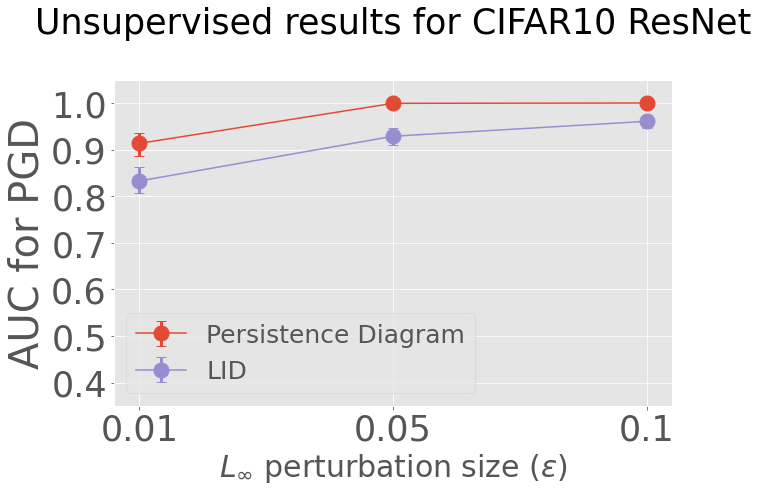

In [396]:
# Plot CIFAR ResNet
# Ours : q = 0.3 (exp 1604008604, run 1)
# LID : batch size = 50, perc nn = 0.1 (exp 1603703372, run 1)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast

df1 = pd.DataFrame(my_db.show_experiment(1604008604)).loc[1,"unsupervised_metrics"]
df2 = pd.DataFrame(my_db.show_experiment(1603703372)).loc[1,"unsupervised_metrics"]
val_ours = dict()
val_lid = dict()
up_ours = dict()
up_lid = dict()
do_ours = dict()
do_lid = dict()

for i, eps in enumerate(df1.keys()):
    val_ours[eps] = df1[eps]['auc']['value']
    val_lid[eps] = df2[eps]['auc']['value']
    up_ours[eps] = df1[eps]['auc']['upper_bound']
    up_lid[eps] = df2[eps]['auc']['upper_bound']
    do_ours[eps] = df1[eps]['auc']['lower_bound']
    do_lid[eps] = df2[eps]['auc']['lower_bound']

eps = list(val_ours.keys())
yours = np.array(list(val_ours.values()))
ylid = np.array(list(val_lid.values()))
yup1 = np.array(list(up_ours.values()))
yup2 = np.array(list(up_lid.values()))
ydo1 = np.array(list(do_ours.values()))
ydo2 = np.array(list(do_lid.values()))

plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.errorbar(eps, yours, yerr=[yup1-yours, yours-ydo1], fmt='o-', label="Persistence Diagram", elinewidth=3, capsize=5, ms=15)
plt.errorbar(eps, ylid, yerr=[yup2-ylid, ylid-ydo2], fmt='o-', label="LID", elinewidth=3, capsize=5, ms=15, color="#968ED0")
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.ylim(0.35,1.05)
plt.ylabel(f"AUC for PGD", fontsize=40)
plt.xlabel(r"$L_{\infty}$ perturbation size ($\varepsilon$)", fontsize=30)
plt.title(f"Unsupervised results for CIFAR10 ResNet\n", fontsize=35)
leg = plt.legend(labels=["Persistence Diagram", "LID"], fontsize=25)
for text in leg.get_texts():
    plt.setp(text, color="#565557")
plt.show()

### Comparing "false sense of security" between PD and LID

In [124]:
# LID : 1603703372 run 1
# Our : 1604008604 run 1 (or 1603964670 run 1 for a result below LID)

# For LID
exp = 1603703372
df_u_lid = my_db.show_experiment(exp).loc[1, "unsupervised_metrics"]
df_s_lid = my_db.show_experiment(exp).loc[1, "supervised_metrics"]
print(f"Unsupervised LID = {df_u_lid}")
print(f"Supervised LID = {df_s_lid}")
val_u_lid = [df_u_lid[eps]['auc']['value'] for eps in df_u_lid.keys()]
val_s_lid = [df_s_lid[eps]['auc']['value'] for eps in df_s_lid.keys()]
print(f"Diff LID = {np.array(val_s_lid) - np.array(val_u_lid)}\n\n")

# For best our
exp = 1604008604
df_u_our = my_db.show_experiment(exp).loc[1, "unsupervised_metrics"]
df_s_our = my_db.show_experiment(exp).loc[1, "supervised_metrics"]
print(f"Unsupervised our = {df_u_our}")
print(f"Supervised our = {df_s_our}")
val_u_our = [df_u_our[eps]['auc']['value'] for eps in df_u_our.keys()]
val_s_our = [df_s_our[eps]['auc']['value'] for eps in df_s_our.keys()]
print(f"Diff Our = {np.array(val_s_our) - np.array(val_u_our)}\n\n")

# For not good our
exp = 1603964670
df_u_our2 = my_db.show_experiment(exp).loc[2, "unsupervised_metrics"]
df_s_our2 = my_db.show_experiment(exp).loc[2, "supervised_metrics"]
print(f"Unsupervised our = {df_u_our2}")
print(f"Supervised our = {df_s_our2}")
val_u_our2 = [df_u_our2[eps]['auc']['value'] for eps in df_u_our2.keys()]
val_s_our2 = [df_s_our2[eps]['auc']['value'] for eps in df_s_our2.keys()]
print(f"Diff Our v2 = {np.array(val_s_our2) - np.array(val_u_our2)}\n\n")

Common configuration {'attack_type': 'PGD', 'dataset_size': 500, 'train_noise': 0.0, 'successful_adv': 1, 'dataset': 'CIFAR10', 'all_epsilons': '0.01;0.05;0.1', 'epochs': 100, 'noise': 0.0, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/lid/lid_binary.py', 'attack_backend': 'FOOLBOX', 'architecture': 'cifar_resnet_1'}
Common configuration {'attack_type': 'PGD', 'dataset_size': 500, 'train_noise': 0.0, 'successful_adv': 1, 'dataset': 'CIFAR10', 'all_epsilons': '0.01;0.05;0.1', 'epochs': 100, 'noise': 0.0, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/lid/lid_binary.py', 'attack_backend': 'FOOLBOX', 'architecture': 'cifar_resnet_1'}
Unsupervised LID = {'0.01': {'auc': {'upper_bound': 0.858455946144251, 'value': 0.8324799999999999, 'lower_bound': 0.8034103586529087}}, '0.05': {'auc': {'upper_bound': 0.9481565608745612, 'value': 0.928496, 'lower_bound': 0.910095436725397}}, '0.1': {'auc': {'upper_bound': 0.974616476899444

## ResNet for SVHN

In [409]:
# Ours 
# Exp like CIFAR (q=0.075): 1603269033
# Different q : 1603286044
# Exp with different thresholds and q = 0.125 : 1603308675
# Exp with smalls q : 1603564347
# Exp with first layers : 1603611644
# Mixed exp : 1603712494
# Very last layers : 1603723889, 1603730045, 1603785490
# Without sigmoidize : 1603815572, 1603822411, 1603873928
exp = 1603822411
df = my_db.show_experiment(exp)
df
#df["thresholds"][0]
#df["unsupervised_metrics"][4]

Common configuration {'attack_type': 'PGD', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'architecture': 'svhn_resnet_1', 'dataset': 'SVHN', 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'attack_backend': 'FOOLBOX', 'embedding_type': 'PersistentDiagram', 'sigmoidize': False, 'dataset_size': 500, 'n_jobs': 1, 'all_epsilons': '0.01;0.05;0.1', 'noise': 0.0, 'raw_graph_pca': -1, 'epochs': 100}


,run_id,thresholds,aucs_l2_norm,linf_diff,detailed_times_graph,detailed_times_T_UnderoptimizedMagnitudeIncreaseV3,detailed_times_embeddings,detailed_times_protocolar_datasets,detailed_times_E_PersistentDiagram,supervised_predictions,unsupervised_predictions,time,supervised_metrics,name,unsupervised_metrics,l2_diff
0,0,39:0.005_40:0.005_41:0.005_42:0.005_43:0.005,None,"{'0.01': [0.010000000000000009, 0.010000000000...",388.913271,0.007153,671.699770,0.067813,282.718109,"{'0.01': [[0.11333817562502187, 0.127933907671...","{'0.01': [[-0.08154220656724842, -0.0895830037...",1017.266358,{'0.01': {'auc': {'upper_bound': 0.72100891820...,Graph,{'0.01': {'auc': {'upper_bound': 0.65035553601...,"{'0.01': [0.4963543089366674, 0.51467076855014..."
1,1,39:0.075_40:0.075_41:0.075_42:0.075_43:0.075,None,"{'0.01': [0.010000000000000009, 0.010000000000...",405.002228,0.006529,3076.743778,0.098145,2671.649529,"{'0.01': [[0.1805009171574092, -0.014613964921...","{'0.01': [[-0.08277563310980837, -0.1022436144...",3423.648996,{'0.01': {'auc': {'upper_bound': 0.85784630486...,Graph,{'0.01': {'auc': {'upper_bound': 0.85955354898...,"{'0.01': [0.4963543089366674, 0.51467076855014..."
2,2,39:0.1_40:0.1_41:0.1_42:0.1_43:0.1,None,"{'0.01': [0.010000000000000009, 0.010000000000...",578.508811,0.008278,4060.364875,0.104535,3481.749007,"{'0.01': [[0.23919273892598764, 0.005731729323...","{'0.01': [[-0.07641700547160055, -0.1011128408...",4406.493000,{'0.01': {'auc': {'upper_bound': 0.87757929659...,Graph,{'0.01': {'auc': {'upper_bound': 0.87974254989...,"{'0.01': [0.4963543089366674, 0.51467076855014..."
3,3,39:0.15_40:0.15_41:0.15_42:0.15_43:0.15,None,"{'0.01': [0.010000000000000009, 0.010000000000...",428.376556,0.007560,5626.611254,0.219088,5198.117076,"{'0.01': [[0.08019921911757137, -0.01762571230...","{'0.01': [[-0.09438183050404705, -0.1020923893...",5981.206472,{'0.01': {'auc': {'upper_bound': 0.87300174826...,Graph,{'0.01': {'auc': {'upper_bound': 0.87246564762...,"{'0.01': [0.4963543089366674, 0.51467076855014..."
4,4,39:0.2_40:0.2_41:0.2_42:0.2_43:0.2,None,"{'0.01': [0.010000000000000009, 0.010000000000...",438.389302,0.006194,7213.136873,0.153543,6774.636386,"{'0.01': [[0.2846391504672946, -0.001187236803...","{'0.01': [[-0.07396879035129442, -0.1011443158...",7557.139199,{'0.01': {'auc': {'upper_bound': 0.87897817033...,Graph,{'0.01': {'auc': {'upper_bound': 0.88817088717...,"{'0.01': [0.4963543089366674, 0.51467076855014..."


In [126]:
# LID
# First exp : 1603285000
# Parameters explo : 1603806102
exp = 1603806102
df = my_db.show_experiment(exp)
df
df["unsupervised_metrics"][6]

Common configuration {'attack_type': 'PGD', 'dataset_size': 500, 'train_noise': 0.0, 'successful_adv': 1, 'dataset': 'SVHN', 'all_epsilons': '0.01;0.05;0.1;0.4', 'epochs': 100, 'noise': 0.0, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/lid/lid_binary.py', 'attack_backend': 'FOOLBOX', 'architecture': 'svhn_resnet_1'}


{'0.01': {'auc': {'upper_bound': 0.8165109038648611,
   'value': 0.776064,
   'lower_bound': 0.7436159423455785}},
 '0.05': {'auc': {'upper_bound': 0.9190845736434108,
   'value': 0.89752,
   'lower_bound': 0.8727839799178754}},
 '0.1': {'auc': {'upper_bound': 0.9539210063822768,
   'value': 0.93952,
   'lower_bound': 0.9209840554293112}},
 '0.4': {'auc': {'upper_bound': 0.9954160044745387,
   'value': 0.990144,
   'lower_bound': 0.9850748860389281}}}

Common configuration {'attack_type': 'PGD', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'architecture': 'svhn_resnet_1', 'dataset': 'SVHN', 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'attack_backend': 'FOOLBOX', 'embedding_type': 'PersistentDiagram', 'sigmoidize': False, 'dataset_size': 500, 'n_jobs': 1, 'all_epsilons': '0.01;0.05;0.1', 'noise': 0.0, 'raw_graph_pca': -1, 'epochs': 100}


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

Common configuration {'attack_type': 'PGD', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/lid/lid_binary.py', 'architecture': 'svhn_resnet_1', 'dataset': 'SVHN', 'attack_backend': 'FOOLBOX', 'dataset_size': 500, 'all_epsilons': '0.01;0.05;0.1;0.4', 'noise': 0.0, 'successful_adv': 1, 'train_noise': 0.0, 'epochs': 100}


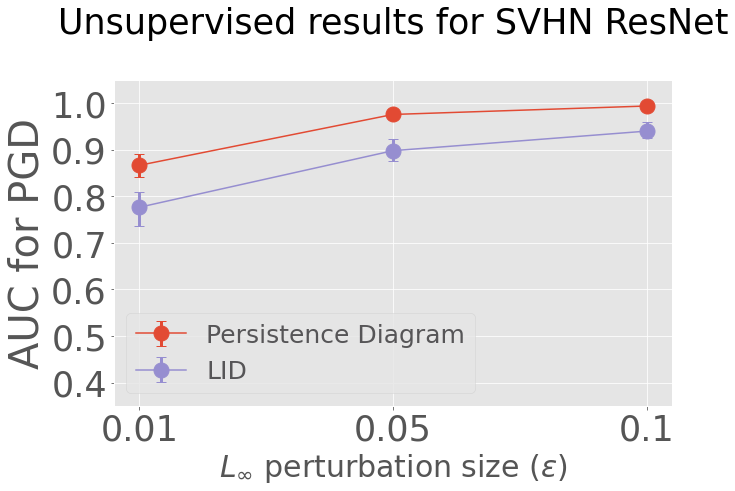

In [327]:
# Plot results (Persistence diagram vs LID)
# Ours : q = 0.25 (exp 1603873928, run 1)
# LID : batch size = 150, perc nn = 0.05 (exp 1603806102, run 6)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast

df1 = pd.DataFrame(my_db.show_experiment(1603873928)).loc[1,"unsupervised_metrics"]
df2 = pd.DataFrame(my_db.show_experiment(1603806102)).loc[6,"unsupervised_metrics"]
val_ours = dict()
val_lid = dict()
up_ours = dict()
up_lid = dict()
do_ours = dict()
do_lid = dict()

for i, eps in enumerate(df1.keys()):
    val_ours[eps] = df1[eps]['auc']['value']
    val_lid[eps] = df2[eps]['auc']['value']
    up_ours[eps] = df1[eps]['auc']['upper_bound']
    up_lid[eps] = df2[eps]['auc']['upper_bound']
    do_ours[eps] = df1[eps]['auc']['lower_bound']
    do_lid[eps] = df2[eps]['auc']['lower_bound']

eps = list(val_ours.keys())
yours = np.array(list(val_ours.values()))
ylid = np.array(list(val_lid.values()))
yup1 = np.array(list(up_ours.values()))
yup2 = np.array(list(up_lid.values()))
ydo1 = np.array(list(do_ours.values()))
ydo2 = np.array(list(do_lid.values()))

plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.errorbar(eps, yours, yerr=[yup1-yours, yours-ydo1], fmt='o-', label="Persistence Diagram", elinewidth=3, capsize=5, ms=15)
plt.errorbar(eps, ylid, yerr=[yup2-ylid, ylid-ydo2], fmt='o-', label="LID", elinewidth=3, capsize=5, ms=15, color="#968ED0")
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.ylim(0.35,1.05)
plt.ylabel(f"AUC for PGD", fontsize=40)
plt.xlabel(r"$L_{\infty}$ perturbation size ($\varepsilon$)", fontsize=30)
plt.title(f"Unsupervised results for SVHN ResNet\n", fontsize=35)
leg = plt.legend(labels=["Persistence Diagram", "LID"], fontsize=25)
for text in leg.get_texts():
    plt.setp(text, color="#565557")
plt.show()

Common configuration {'attack_type': 'PGD', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'architecture': 'svhn_resnet_1', 'dataset': 'SVHN', 'thresholds': '39:0.125_40:0.125_41:0.125_42:0.125_43:0.125', 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'attack_backend': 'FOOLBOX', 'embedding_type': 'PersistentDiagram', 'sigmoidize': False, 'dataset_size': 500, 'raw_graph_pca': -1, 'n_jobs': 1, 'epochs': 100, 'all_epsilons': '0.01;0.05;0.1', 'noise': 0.0}
Common configuration {'attack_type': 'PGD', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'architecture': 'svhn_resnet_1', 'dataset': 'SVHN', 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'attack_backend': 'FOOLBOX', 'embedding_type': 'PersistentDiagram', 'sigmoidize': False, 'dataset_size': 500, 'n_jobs': 1, 'all_epsilons': '0.01;0.05;0.1', 'noise': 0.0, 'raw_graph_pca': -1, 'epochs': 100}


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

Common configuration {'attack_type': 'PGD', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'architecture': 'svhn_resnet_1', 'dataset': 'SVHN', 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'attack_backend': 'FOOLBOX', 'embedding_type': 'PersistentDiagram', 'sigmoidize': False, 'dataset_size': 500, 'n_jobs': 1, 'all_epsilons': '0.01;0.05;0.1', 'noise': 0.0, 'raw_graph_pca': -1, 'epochs': 100}


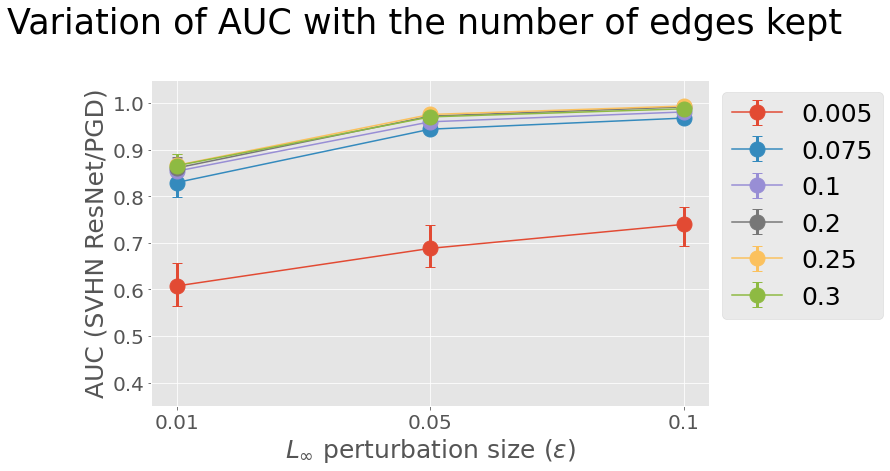

In [397]:
# Plot threshold variation
# Our : different q for the same layer (exp 1603815572, 1603822411, 1603873928)

data = {"q":dict(), "result":dict()}
df = pd.DataFrame(data)
df.loc[0] = [{0.125:0.125}, my_db.show_experiment(1603815572).loc[0,"unsupervised_metrics"]]

exp2 = my_db.show_experiment(1603822411).loc[:,["thresholds","unsupervised_metrics"]]
for i, row in exp2.iterrows():
    q = float(exp2.loc[i,"thresholds"].split("_")[0].split(":")[1])
    df.loc[df.shape[0]+i] = [{q:q}, exp2.loc[i,"unsupervised_metrics"]]
exp3 = my_db.show_experiment(1603873928).loc[:,["thresholds","unsupervised_metrics"]]
for i, row in exp3.iterrows():
    q = float(exp3.loc[i,"thresholds"].split("_")[0].split(":")[1])
    df.loc[df.shape[0]+i] = [{q:q}, exp3.loc[i,"unsupervised_metrics"]]

df2 = df.loc[[1,3,5,9,8,12],:]
df_variation_svhn = df2.reset_index(drop=True)

plt.style.use('ggplot')
plt.figure(figsize=(10,6))

eps = list(df_variation_svhn.loc[0,"result"].keys())
for i, row in df_variation_svhn.iterrows():
    val = list()
    up = list()
    do = list()
    for ep in eps:
        #print(f'q = {float(list(row["q"].values())[0])}')
        val.append(row["result"][ep]["auc"]["value"])
        up.append(row["result"][ep]["auc"]["upper_bound"])
        do.append(row["result"][ep]["auc"]["lower_bound"])
    #plt.plot(eps,val, label=float(list(row["q"].values())[0]))
    plt.errorbar(eps, val, yerr=[np.array(up)-np.array(val),np.array(val)-np.array(do)], fmt='o-', label=float(list(row["q"].values())[0]), elinewidth=3, capsize=5, ms=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.35,1.05)
plt.ylabel(f"AUC (SVHN ResNet/PGD)", fontsize=25)
plt.xlabel(r"$L_{\infty}$ perturbation size ($\varepsilon$)", fontsize=25)
plt.title(f"Variation of AUC with the number of edges kept \n", fontsize=35)
plt.legend(fontsize=25, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

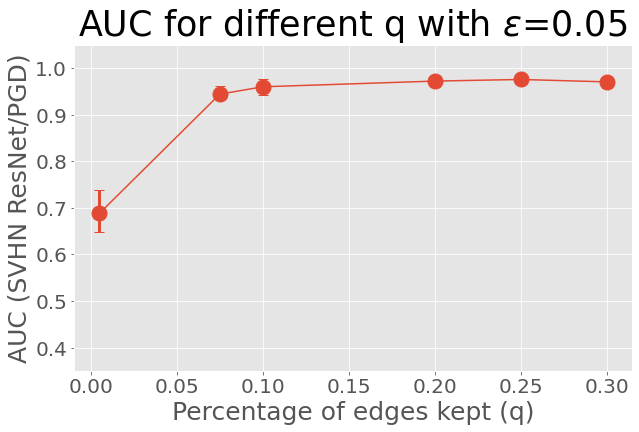

In [403]:
df_variation_svhn

qs = [float(list(row["q"].values())[0]) for i, row in df_variation_svhn.iterrows()]
val = np.array([row["result"]["0.05"]["auc"]["value"] for i, row in df_variation_svhn.iterrows()])
up = np.array([row["result"]["0.05"]["auc"]["upper_bound"] for i, row in df_variation_svhn.iterrows()])
do = np.array([row["result"]["0.05"]["auc"]["lower_bound"] for i, row in df_variation_svhn.iterrows()])

plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.errorbar(qs, val, yerr=[up-val,val-do], fmt='o-', elinewidth=3, capsize=5, ms=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.35,1.05)
plt.ylabel(f"AUC (SVHN ResNet/PGD)", fontsize=25)
plt.xlabel(r"Percentage of edges kept (q)", fontsize=25)
plt.title(r"AUC for different q with $\varepsilon$=0.05", fontsize=35)
#plt.legend(fontsize=25, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# CIFAR and SVHN ResNet : all attacks results

In [82]:
db_path = '/Users/m.goibert/sshfs/r3d3.db'
my_db = ExperimentDB(db_path)

In [84]:
# Our Persistence Diagram
# Exp : 1604334332
exp = 1604334332
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][0]

Common configuration {'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'attack_backend': 'FOOLBOX', 'n_jobs': 1, 'sigmoidize': False, 'noise': 0.0, 'raw_graph_pca': -1, 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'epochs': 100, 'dataset_size': 500, 'embedding_type': 'PersistentDiagram'}


{'0.01': {'auc': {'upper_bound': 0.9395806500867555,
   'value': 0.9131680000000001,
   'lower_bound': 0.8911301024585082}},
 '0.05': {'auc': {'upper_bound': 0.9998745585008783,
   'value': 0.999168,
   'lower_bound': 0.9983359999999999}},
 '0.1': {'auc': {'upper_bound': 1.0002252747126934,
   'value': 0.9998560000000001,
   'lower_bound': 0.9997120000000002}}}

In [44]:
# LID 
# Exp 1604674014
exp = 1604674014
df = my_db.show_experiment(exp)
df
df["supervised_metrics"][5]

Common configuration {'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/lid/lid_binary.py', 'attack_backend': 'FOOLBOX', 'successful_adv': 1, 'n_jobs': 1, 'noise': 0.0, 'epochs': 100, 'dataset_size': 500, 'train_noise': 0.0}


{'1.0': {'auc': {'upper_bound': 0.8932974994291667,
   'value': 0.852064,
   'lower_bound': 0.8251149431643626}}}

# MNIST and Fashion MNIST leNet : all attacks results

In [23]:
# Our Persistence Diagram
# Exp : 1604660089, old threshold MNIST : 1604665648/1604666917
exp = 1604660089
df = my_db.show_experiment(exp)
df
df["supervised_metrics"][5]

Common configuration {'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'attack_backend': 'FOOLBOX', 'n_jobs': 1, 'sigmoidize': False, 'noise': 0.0, 'raw_graph_pca': -1, 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'dataset_size': 500, 'embedding_type': 'PersistentDiagram', 'kernel_type': 'SlicedWasserstein'}


{'1.0': {'auc': {'upper_bound': 0.9575136062740595,
   'value': 0.9390719999999999,
   'lower_bound': 0.9182829393839236}}}

In [30]:
# LID
# Exp : 1604663013
exp = 1604663013
df = my_db.show_experiment(exp)
df
df["supervised_metrics"][5]

Common configuration {'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/lid/lid_binary.py', 'attack_backend': 'FOOLBOX', 'successful_adv': 1, 'noise': 0.0, 'dataset_size': 500, 'train_noise': 0.0}


{'1.0': {'auc': {'upper_bound': 0.8087287364981741,
   'value': 0.773536,
   'lower_bound': 0.7370348399746995}}}

In [89]:
exp = 1604673587
df = my_db.show_experiment(exp)
df

Common configuration {'all_epsilons': '1.0', 'noise': 0.0, 'n_jobs': 1, 'attack_type': 'CW', 'attack_backend': 'FOOLBOX', 'epochs': 100, 'batch_size': 50, 'dataset_size': 500, 'architecture': 'cifar_resnet_1', 'dataset': 'CIFAR10', 'train_noise': 0.0, 'successful_adv': 1, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/lid/lid_binary.py', 'perc_of_nn': 0.1}


,run_id,time,supervised_metrics,aucs_l2_norm,supervised_predictions,unsupervised_predictions,name,unsupervised_metrics
0,0,334.434782,{'1.0': {'auc': {'upper_bound': 0.882005692014...,"{'0.03547062907174208': [0.8241110163970324, 0...","{'1.0': [[0.7362135552338543, 0.35645634065011...","{'1.0': [[-0.11119821898507323, -0.11690726566...",LID,{'1.0': {'auc': {'upper_bound': 0.822061157225...


# MNIST LeNet threshold finder

In [97]:
# Our Persistence Diagram on several thresholds
# Exp : 1604562661, optimal layer = 1604606583, more thresholds = 1604647872
exp = 1604647872
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][6]
#df["supervised_metrics"][1]

Common configuration {'noise': 0.0, 'attack_type': 'PGD', 'epochs': 50, 'attack_backend': 'FOOLBOX', 'dataset': 'MNIST', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'embedding_type': 'PersistentDiagram', 'architecture': 'mnist_lenet', 'n_jobs': 1, 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'sigmoidize': False, 'dataset_size': 500, 'kernel_type': 'SlicedWasserstein', 'all_epsilons': '0.01;0.1;0.4', 'raw_graph_pca': -1}


,run_id,thresholds,supervised_metrics,supervised_predictions,name,linf_diff,detailed_times_embeddings,detailed_times_protocolar_datasets,detailed_times_graph,detailed_times_T_UnderoptimizedMagnitudeIncrease,detailed_times_E_PersistentDiagram,unsupervised_predictions,aucs_l2_norm,l2_diff,time,unsupervised_metrics
0,0,0:0.015_2:0.015_4:0.015_6:0.015,{'0.01': {'auc': {'upper_bound': 0.99834518747...,"{'0.01': [[0.7440334699437654, 1.0280420442214...",Graph,"{'0.01': [0.010000000000000009, 0.010000000000...",1002.563396,0.044900,324.647984,405.068491,272.738556,"{'0.01': [[-0.09733430599590498, 0.01149795655...",None,"{'0.01': [0.19112070976202628, 0.2025278059724...",1245.598983,{'0.01': {'auc': {'upper_bound': 0.98990744101...
1,1,0:0.02_2:0.02_4:0.02_6:0.02,{'0.01': {'auc': {'upper_bound': 1.00003325261...,"{'0.01': [[0.8404827806394899, 0.8683793961651...",Graph,"{'0.01': [0.010000000000000009, 0.010000000000...",1116.686857,0.048216,329.730032,428.576935,358.252412,"{'0.01': [[-0.062194462746815005, -0.051319965...",None,"{'0.01': [0.19112070976202628, 0.2025278059724...",1368.848570,{'0.01': {'auc': {'upper_bound': 1.00019512195...
2,2,0:0.025_2:0.025_4:0.025_6:0.025,{'0.01': {'auc': {'upper_bound': 0.99816672804...,"{'0.01': [[0.7253163286174041, 0.9913971731297...",Graph,"{'0.01': [0.010000000000000009, 0.010000000000...",1233.400902,0.045314,338.184365,446.065276,449.017054,"{'0.01': [[-0.11636781217156905, -0.0036460935...",None,"{'0.01': [0.19112070976202628, 0.2025278059724...",1447.168006,{'0.01': {'auc': {'upper_bound': 0.99261048638...
3,3,0:0.03_2:0.03_4:0.03_6:0.03,{'0.01': {'auc': {'upper_bound': 1.00107583371...,"{'0.01': [[0.9473173059551488, 0.6663054009119...",Graph,"{'0.01': [0.010000000000000009, 0.010000000000...",1361.068334,0.047168,343.484714,470.319438,547.114177,"{'0.01': [[-0.15595171506272054, -1.7805957535...",None,"{'0.01': [0.19112070976202628, 0.2025278059724...",1593.584193,{'0.01': {'auc': {'upper_bound': 0.99812271989...
4,4,0:0.035_2:0.035_4:0.035_6:0.035,{'0.01': {'auc': {'upper_bound': 0.99862319814...,"{'0.01': [[0.9930380677217794, 0.8716714194400...",Graph,"{'0.01': [0.010000000000000009, 0.010000000000...",1453.285154,0.045749,344.441794,490.907691,617.782394,"{'0.01': [[-0.010734264048374298, -0.204256798...",None,"{'0.01': [0.19112070976202628, 0.2025278059724...",1655.748806,{'0.01': {'auc': {'upper_bound': 0.98426205616...
5,5,0:0.04_2:0.04_4:0.04_6:0.04,{'0.01': {'auc': {'upper_bound': 0.98820929253...,"{'0.01': [[0.9930999496169457, 1.0637790627186...",Graph,"{'0.01': [0.010000000000000009, 0.010000000000...",1278.125543,0.072904,288.140317,413.725070,576.137666,"{'0.01': [[-0.022781502420069266, 0.2285695530...",None,"{'0.01': [0.19112070976202628, 0.2025278059724...",1482.873194,{'0.01': {'auc': {'upper_bound': 0.99641114908...
6,6,0:0.045_2:0.045_4:0.045_6:0.045,{'0.01': {'auc': {'upper_bound': 0.97427094726...,"{'0.01': [[0.9844711125116379, 1.0070712961446...",Graph,"{'0.01': [0.010000000000000009, 0.010000000000...",1357.400438,0.073683,284.402138,428.402175,644.472468,"{'0.01': [[-4.702635667247748, -0.395811182485...",None,"{'0.01': [0.19112070976202628, 0.2025278059724...",1585.808534,{'0.01': {'auc': {'upper_bound': 0.97083837657...


# Fashion MNIST LeNet threshold finder

In [80]:
# Our Persistence Diagram on several thresholds
# Exp : 1604608217
exp = 1604608217
df = my_db.show_experiment(exp)
df
df["unsupervised_metrics"][5]
#df["supervised_metrics"][1]

Common configuration {'noise': 0.0, 'attack_type': 'PGD', 'epochs': 100, 'attack_backend': 'FOOLBOX', 'dataset': 'FashionMNIST', 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'embedding_type': 'PersistentDiagram', 'architecture': 'fashion_mnist_lenet', 'n_jobs': 1, 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'sigmoidize': False, 'dataset_size': 500, 'kernel_type': 'SlicedWasserstein', 'all_epsilons': '0.01;0.1;0.4', 'raw_graph_pca': -1}


{'0.01': {'auc': {'upper_bound': 0.6366020684230416,
   'value': 0.58968,
   'lower_bound': 0.5485891958234496}},
 '0.1': {'auc': {'upper_bound': 0.7640373969525436,
   'value': 0.7251999999999998,
   'lower_bound': 0.6860474358974356}},
 '0.4': {'auc': {'upper_bound': 1.0002156970388212,
   'value': 0.9881439999999999,
   'lower_bound': 0.9809914779660677}}}

# New Thresholding method

In [6]:
db_path = '/Users/m.goibert/sshfs/r3d3.db'
#db_path = '/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/TDA_for_adv_robustness/r3d3.db'
my_db = ExperimentDB(db_path)

In [7]:
# Test new way of thresholding
exp = 1602000805
df = my_db.show_experiment(exp)
df
#df["unsupervised_metrics"][0]
#print(f"Time previous method = {df['time'][0]} and new method = {df['time'][1]}")

IndexError: list index out of range

In [5]:
# Test new way of thresholding
exp = 1602505969
df = my_db.show_experiment(exp)
df

IndexError: list index out of range

# CIFAR ResNet Pruned

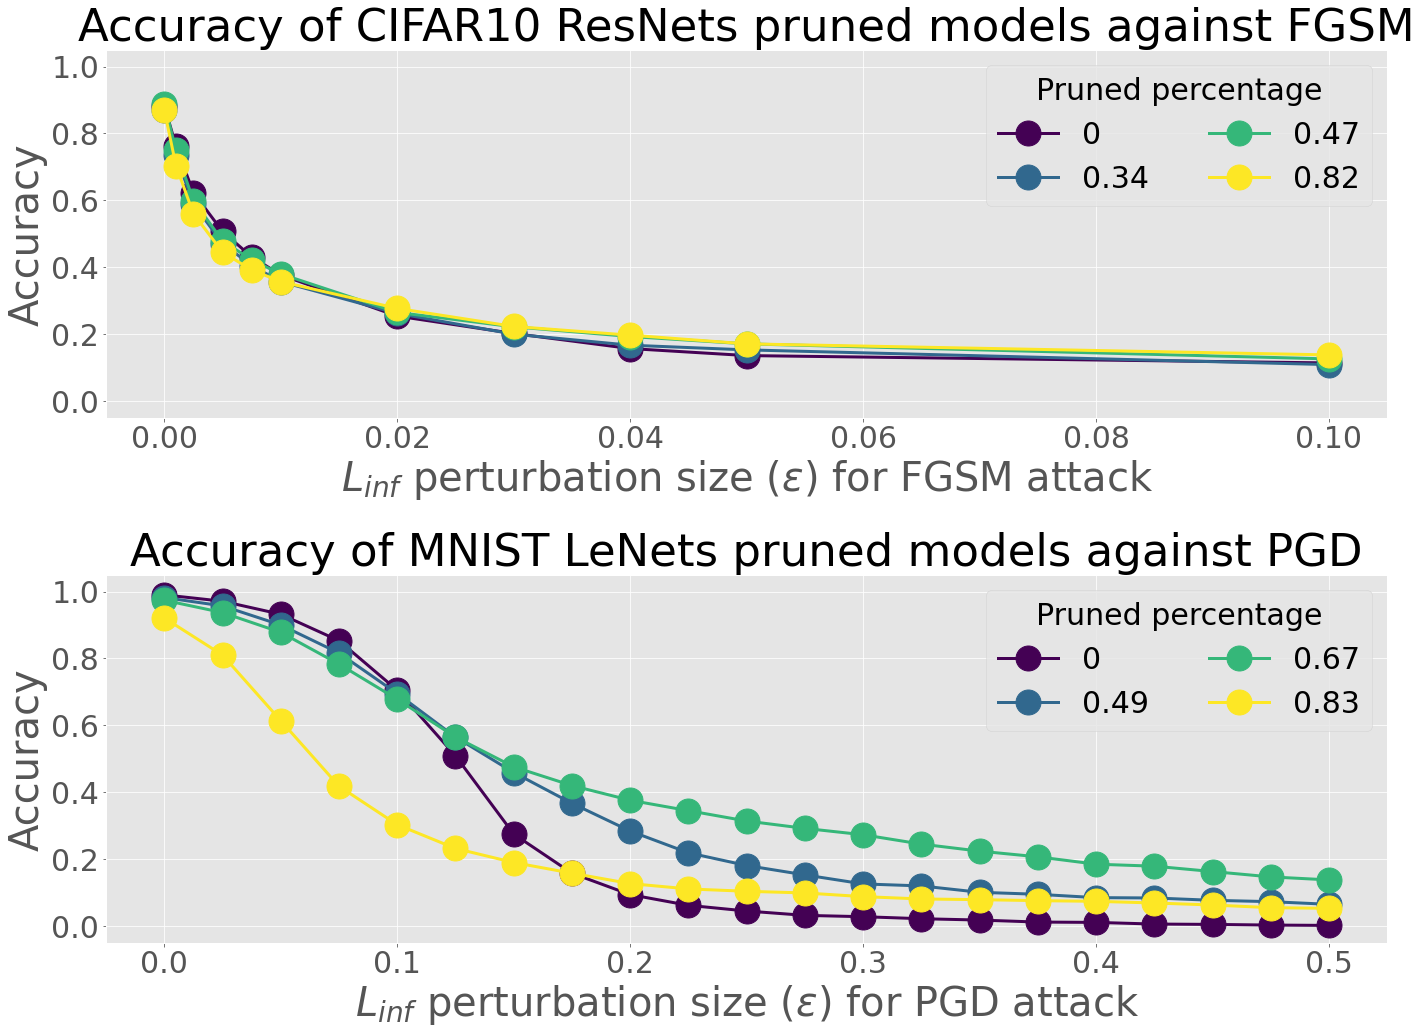

In [103]:
pruned_auc = dict()
pruned_auc[0] = {0: 0.883, 0.001: 0.763, 0.0025: 0.623, 0.005: 0.507, 0.0075: 0.431, 0.01: 0.377, 0.02: 0.254, 0.03: 0.202, 0.04: 0.157, 0.05: 0.136, 0.1: 0.114}
#pruned_auc[0.1] = {0: 0.889, 0.001: 0.753, 0.0025: 0.581, 0.005: 0.48, 0.0075: 0.398, 0.01: 0.364, 0.02: 0.268, 0.03: 0.201, 0.04: 0.17, 0.05: 0.135, 0.1: 0.102}
#pruned_auc[0.19] = {0: 0.882, 0.001: 0.753, 0.0025: 0.593, 0.005: 0.456, 0.0075: 0.374, 0.01: 0.334, 0.02: 0.233, 0.03: 0.178, 0.04: 0.147, 0.05: 0.124, 0.1: 0.098}
#pruned_auc[0.27] = {0: 0.885, 0.001: 0.752, 0.0025: 0.606, 0.005: 0.481, 0.0075: 0.409, 0.01: 0.357, 0.02: 0.244, 0.03: 0.193, 0.04: 0.15, 0.05: 0.134, 0.1: 0.111}
pruned_auc[0.34] = {0: 0.869, 0.001: 0.735, 0.0025: 0.589, 0.005: 0.471, 0.0075: 0.405, 0.01: 0.357, 0.02: 0.262, 0.03: 0.2, 0.04: 0.167, 0.05: 0.153, 0.1: 0.109}
#pruned_auc[0.41] = {0: 0.894, 0.001: 0.742, 0.0025: 0.598, 0.005: 0.473, 0.0075: 0.401, 0.01: 0.352, 0.02: 0.247, 0.03: 0.183, 0.04: 0.151, 0.05: 0.147, 0.1: 0.12}
pruned_auc[0.47] = {0: 0.889, 0.001: 0.751, 0.0025: 0.599, 0.005: 0.479, 0.0075: 0.422, 0.01: 0.38, 0.02: 0.265, 0.03: 0.222, 0.04: 0.193, 0.05: 0.171, 0.1: 0.126}
#pruned_auc[0.52] = {0: 0.881, 0.001: 0.747, 0.0025: 0.607, 0.005: 0.484, 0.0075: 0.415, 0.01: 0.351, 0.02: 0.246, 0.03: 0.188, 0.04: 0.16, 0.05: 0.14, 0.1: 0.11}
#pruned_auc[0.66] = {0: 0.866, 0.001: 0.727, 0.0025: 0.576, 0.005: 0.466, 0.0075: 0.407, 0.01: 0.376, 0.02: 0.274, 0.03: 0.214, 0.04: 0.177, 0.05: 0.155, 0.1: 0.123}
#pruned_auc[0.76] = {0: 0.884, 0.001: 0.721, 0.0025: 0.576, 0.005: 0.476, 0.0075: 0.408, 0.01: 0.368, 0.02: 0.262, 0.03: 0.216, 0.04: 0.178, 0.05: 0.157, 0.1: 0.113}
pruned_auc[0.82] = {0: 0.87, 0.001: 0.704, 0.0025: 0.56, 0.005: 0.445, 0.0075: 0.392, 0.01: 0.357, 0.02: 0.277, 0.03: 0.223, 0.04: 0.197, 0.05: 0.171, 0.1: 0.138}
#pruned_auc[0.94] = {0: 0.841, 0.001: 0.694, 0.0025: 0.528, 0.005: 0.431, 0.0075: 0.386, 0.01: 0.355, 0.02: 0.268, 0.03: 0.196, 0.04: 0.183, 0.05: 0.163, 0.1: 0.138}
#pruned_auc[0.97] = {0: 0.837, 0.001: 0.672, 0.0025: 0.508, 0.005: 0.376, 0.0075: 0.322, 0.01: 0.3, 0.02: 0.259, 0.03: 0.233, 0.04: 0.184, 0.05: 0.168, 0.1: 0.142}

pruned_res = dict()
pruned_res[0] = {0.0: 0.99, 0.025: 0.971, 0.05: 0.932, 0.07500000000000001: 0.853, 0.1: 0.705, 0.125: 0.509, 0.15000000000000002: 0.275, 0.17500000000000002:0.158, 0.2: 0.094, 0.225: 0.062, 0.25: 0.045, 0.275: 0.032, 0.30000000000000004: 0.028, 0.325: 0.022, 0.35000000000000003: 0.018, 0.375: 0.012, 0.4: 0.011, 0.42500000000000004: 0.006, 0.45: 0.005, 0.47500000000000003: 0.003, 0.5: 0.002}
#pruned_res[0.2] = {0.0: 0.993, 0.025: 0.97, 0.05: 0.935, 0.07500000000000001: 0.836, 0.1: 0.694, 0.125: 0.494, 0.15000000000000002: 0.322, 0.17500000000000002:0.195, 0.2: 0.111, 0.225: 0.063, 0.25: 0.042, 0.275: 0.027, 0.30000000000000004: 0.022, 0.325: 0.012, 0.35000000000000003: 0.007, 0.375: 0.004, 0.4: 0.005, 0.42500000000000004: 0.004, 0.45: 0.002, 0.47500000000000003: 0.002, 0.5: 0.001}
#pruned_res[0.36] = {0.0: 0.987, 0.025: 0.956, 0.05: 0.904, 0.07500000000000001: 0.82, 0.1: 0.7, 0.125: 0.54, 0.15000000000000002: 0.395, 0.17500000000000002: 0.321, 0.2: 0.234, 0.225: 0.167, 0.25: 0.127, 0.275: 0.096, 0.30000000000000004: 0.071, 0.325: 0.058, 0.35000000000000003: 0.052, 0.375: 0.042, 0.4: 0.036, 0.42500000000000004: 0.034, 0.45: 0.032, 0.47500000000000003: 0.032, 0.5: 0.028}
pruned_res[0.49] = {0.0: 0.982, 0.025: 0.957, 0.05: 0.9, 0.07500000000000001: 0.816, 0.1: 0.695, 0.125: 0.565, 0.15000000000000002: 0.459, 0.17500000000000002: 0.367, 0.2: 0.284, 0.225: 0.219, 0.25: 0.181, 0.275: 0.153, 0.30000000000000004: 0.126, 0.325: 0.12, 0.35000000000000003: 0.101, 0.375: 0.095, 0.4: 0.085, 0.42500000000000004: 0.084, 0.45: 0.077, 0.47500000000000003: 0.073, 0.5: 0.065}
#pruned_res[0.59] = {0.0: 0.982, 0.025: 0.947, 0.05: 0.887, 0.07500000000000001: 0.778, 0.1: 0.656, 0.125: 0.547, 0.15000000000000002: 0.461, 0.17500000000000002: 0.399, 0.2: 0.344, 0.225: 0.29, 0.25: 0.252, 0.275: 0.216, 0.30000000000000004: 0.191, 0.325: 0.164, 0.35000000000000003: 0.146, 0.375: 0.13, 0.4: 0.109, 0.42500000000000004: 0.104, 0.45: 0.098, 0.47500000000000003: 0.093, 0.5: 0.086}
pruned_res[0.67] = {0.0: 0.974, 0.025: 0.937, 0.05: 0.878, 0.07500000000000001: 0.783, 0.1: 0.678, 0.125: 0.565, 0.15000000000000002: 0.476, 0.17500000000000002: 0.42, 0.2: 0.376, 0.225: 0.345, 0.25: 0.314, 0.275: 0.292, 0.30000000000000004: 0.273, 0.325: 0.245, 0.35000000000000003: 0.224, 0.375: 0.207, 0.4: 0.185, 0.42500000000000004: 0.179, 0.45: 0.163, 0.47500000000000003: 0.147, 0.5: 0.138}
#pruned_res[0.74] = {0.0: 0.973, 0.025: 0.926, 0.05: 0.85, 0.07500000000000001: 0.741, 0.1: 0.641, 0.125: 0.541, 0.15000000000000002: 0.434, 0.17500000000000002: 0.363, 0.2: 0.305, 0.225: 0.256, 0.25: 0.221, 0.275: 0.181, 0.30000000000000004: 0.157, 0.325: 0.137, 0.35000000000000003: 0.122, 0.375: 0.115, 0.4: 0.105, 0.42500000000000004: 0.089, 0.45: 0.084, 0.47500000000000003: 0.082, 0.5: 0.071}
#pruned_res[0.79] = {0.0: 0.962, 0.025: 0.885, 0.05: 0.785, 0.07500000000000001: 0.657, 0.1: 0.555, 0.125: 0.484, 0.15000000000000002: 0.445, 0.17500000000000002: 0.413, 0.2: 0.384, 0.225: 0.349, 0.25: 0.317, 0.275: 0.297, 0.30000000000000004: 0.279, 0.325: 0.251, 0.35000000000000003: 0.238, 0.375: 0.23, 0.4: 0.219, 0.42500000000000004: 0.202, 0.45: 0.185, 0.47500000000000003: 0.175, 0.5: 0.17}
pruned_res[0.83] = {0.0: 0.921, 0.025: 0.81, 0.05: 0.614, 0.07500000000000001: 0.418, 0.1: 0.303, 0.125: 0.232, 0.15000000000000002: 0.19, 0.17500000000000002: 0.158, 0.2: 0.127, 0.225: 0.111, 0.25: 0.104, 0.275: 0.099, 0.30000000000000004: 0.088, 0.325: 0.081, 0.35000000000000003: 0.079, 0.375: 0.076, 0.4: 0.074, 0.42500000000000004: 0.069, 0.45: 0.063, 0.47500000000000003: 0.055, 0.5: 0.053}


import matplotlib.pyplot as plt
from matplotlib import cm
mycolors = cm.get_cmap("viridis", len(list(pruned_auc.keys()))).colors
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(2, figsize=(20,15))
for i, key in enumerate(pruned_auc.keys()):
    ax1.plot(list(pruned_auc[key].keys()), list(pruned_auc[key].values()),
             "-o", color=mycolors[i], label=key, linewidth=3, ms=25)
lg1 = ax1.legend(title="Pruned percentage", fontsize=30, ncol=2)
lg1.get_title().set_fontsize(30)
ax1.set_title("Accuracy of CIFAR10 ResNets pruned models against FGSM", fontsize=45)
ax1.tick_params(axis="both", labelsize=30)
ax1.set_xlabel(r"$L_{inf}$ perturbation size ($\varepsilon$) for FGSM attack", fontsize=40)
ax1.set_ylabel("Accuracy", fontsize=40)
ax1.set_ylim([-0.05,1.05])

for i, key in enumerate(pruned_res.keys()):
    ax2.plot(list(pruned_res[key].keys()), list(pruned_res[key].values()),
             "-o", color=mycolors[i], label=key, linewidth=3, ms=25)
lg2 = ax2.legend(title="Pruned percentage", fontsize=30, ncol=2)
lg2.get_title().set_fontsize(30)
ax2.set_title("Accuracy of MNIST LeNets pruned models against PGD", fontsize=45)
ax2.tick_params(axis="both", labelsize=30)
ax2.set_xlabel(r"$L_{inf}$ perturbation size ($\varepsilon$) for PGD attack", fontsize=40)
ax2.set_ylabel("Accuracy", fontsize=40)
ax2.set_ylim([-0.05,1.05])
plt.tight_layout(pad=3.0)
#plt.show()
plt.savefig("/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/plots_for_paper/pruned_accuracy_cifar_mnist.png",dpi=200)


In [4]:
# First exp 1605007684
exp = 1605007684
df = my_db.show_experiment(exp)
df

Common configuration {'prune_percentile': 0.1, 'dataset_size': 500, 'thresholds': '39:0.3_40:0.3_41:0.3_42:0.3_43:0.3', 'architecture': 'cifar_resnet_1', 'dataset': 'CIFAR10', 'epochs': 99, 'attack_type': 'PGD', 'embedding_type': 'PersistentDiagram', 'threshold_strategy': 'UnderoptimizedMagnitudeIncreaseV3', 'noise': 0.0, 'all_epsilons': '0.01;0.05;0.1', 'tot_prune_percentile': 0.5, 'first_pruned_iter': 100, 'n_jobs': 1, 'attack_backend': 'FOOLBOX', 'sigmoidize': False, 'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'raw_graph_pca': -1}


,run_id
0,0


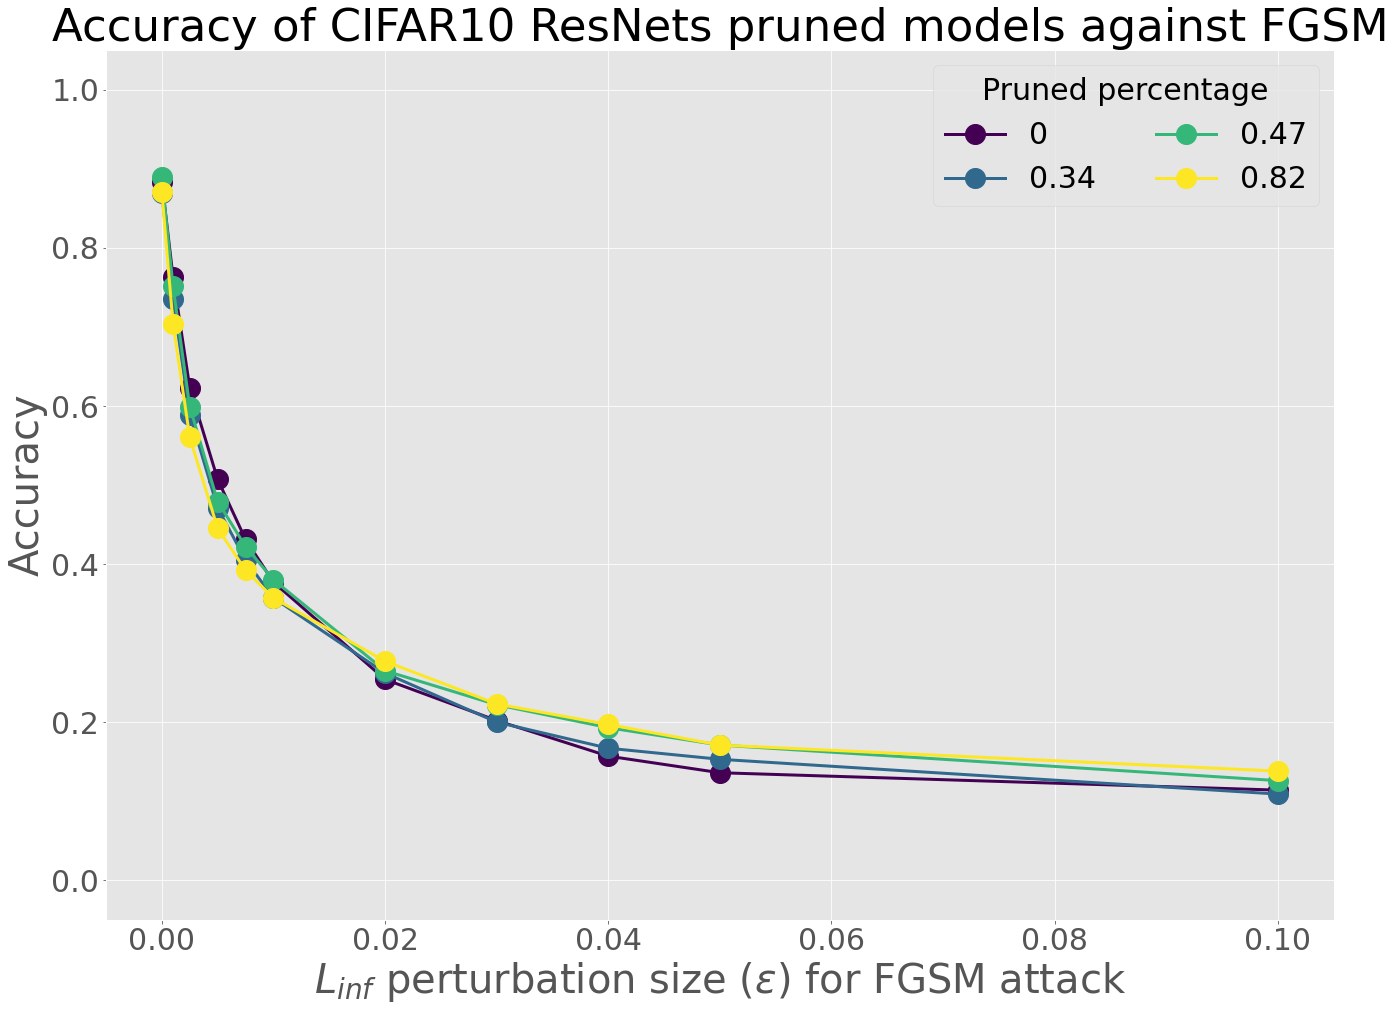

In [50]:
pruned_auc = dict()
pruned_auc[0] = {0: 0.883, 0.001: 0.763, 0.0025: 0.623, 0.005: 0.507, 0.0075: 0.431, 0.01: 0.377, 0.02: 0.254, 0.03: 0.202, 0.04: 0.157, 0.05: 0.136, 0.1: 0.114}
#pruned_auc[0.1] = {0: 0.889, 0.001: 0.753, 0.0025: 0.581, 0.005: 0.48, 0.0075: 0.398, 0.01: 0.364, 0.02: 0.268, 0.03: 0.201, 0.04: 0.17, 0.05: 0.135, 0.1: 0.102}
#pruned_auc[0.19] = {0: 0.882, 0.001: 0.753, 0.0025: 0.593, 0.005: 0.456, 0.0075: 0.374, 0.01: 0.334, 0.02: 0.233, 0.03: 0.178, 0.04: 0.147, 0.05: 0.124, 0.1: 0.098}
#pruned_auc[0.27] = {0: 0.885, 0.001: 0.752, 0.0025: 0.606, 0.005: 0.481, 0.0075: 0.409, 0.01: 0.357, 0.02: 0.244, 0.03: 0.193, 0.04: 0.15, 0.05: 0.134, 0.1: 0.111}
pruned_auc[0.34] = {0: 0.869, 0.001: 0.735, 0.0025: 0.589, 0.005: 0.471, 0.0075: 0.405, 0.01: 0.357, 0.02: 0.262, 0.03: 0.2, 0.04: 0.167, 0.05: 0.153, 0.1: 0.109}
#pruned_auc[0.41] = {0: 0.894, 0.001: 0.742, 0.0025: 0.598, 0.005: 0.473, 0.0075: 0.401, 0.01: 0.352, 0.02: 0.247, 0.03: 0.183, 0.04: 0.151, 0.05: 0.147, 0.1: 0.12}
pruned_auc[0.47] = {0: 0.889, 0.001: 0.751, 0.0025: 0.599, 0.005: 0.479, 0.0075: 0.422, 0.01: 0.38, 0.02: 0.265, 0.03: 0.222, 0.04: 0.193, 0.05: 0.171, 0.1: 0.126}
#pruned_auc[0.52] = {0: 0.881, 0.001: 0.747, 0.0025: 0.607, 0.005: 0.484, 0.0075: 0.415, 0.01: 0.351, 0.02: 0.246, 0.03: 0.188, 0.04: 0.16, 0.05: 0.14, 0.1: 0.11}
#pruned_auc[0.66] = {0: 0.866, 0.001: 0.727, 0.0025: 0.576, 0.005: 0.466, 0.0075: 0.407, 0.01: 0.376, 0.02: 0.274, 0.03: 0.214, 0.04: 0.177, 0.05: 0.155, 0.1: 0.123}
#pruned_auc[0.76] = {0: 0.884, 0.001: 0.721, 0.0025: 0.576, 0.005: 0.476, 0.0075: 0.408, 0.01: 0.368, 0.02: 0.262, 0.03: 0.216, 0.04: 0.178, 0.05: 0.157, 0.1: 0.113}
pruned_auc[0.82] = {0: 0.87, 0.001: 0.704, 0.0025: 0.56, 0.005: 0.445, 0.0075: 0.392, 0.01: 0.357, 0.02: 0.277, 0.03: 0.223, 0.04: 0.197, 0.05: 0.171, 0.1: 0.138}
#pruned_auc[0.94] = {0: 0.841, 0.001: 0.694, 0.0025: 0.528, 0.005: 0.431, 0.0075: 0.386, 0.01: 0.355, 0.02: 0.268, 0.03: 0.196, 0.04: 0.183, 0.05: 0.163, 0.1: 0.138}
#pruned_auc[0.97] = {0: 0.837, 0.001: 0.672, 0.0025: 0.508, 0.005: 0.376, 0.0075: 0.322, 0.01: 0.3, 0.02: 0.259, 0.03: 0.233, 0.04: 0.184, 0.05: 0.168, 0.1: 0.142}


import matplotlib.pyplot as plt
from matplotlib import cm
mycolors = cm.get_cmap("viridis", len(list(pruned_auc.keys()))).colors
plt.style.use('ggplot')
plt.figure(figsize=(22,16))
for i, key in enumerate(pruned_auc.keys()):
    plt.plot(list(pruned_auc[key].keys()), list(pruned_auc[key].values()),
             "-o", color=mycolors[i], label=key, linewidth=3, ms=20)
lg = plt.legend(title="Pruned percentage", fontsize=30, ncol=2)
lg.get_title().set_fontsize(30)
plt.title("Accuracy of CIFAR10 ResNets pruned models against FGSM", fontsize=45)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel(r"$L_{inf}$ perturbation size ($\varepsilon$) for FGSM attack", fontsize=40)
plt.ylabel("Accuracy", fontsize=40)
#plt.xlim(-0.001,0.02)
plt.ylim(-0.05,1.05)
plt.show()

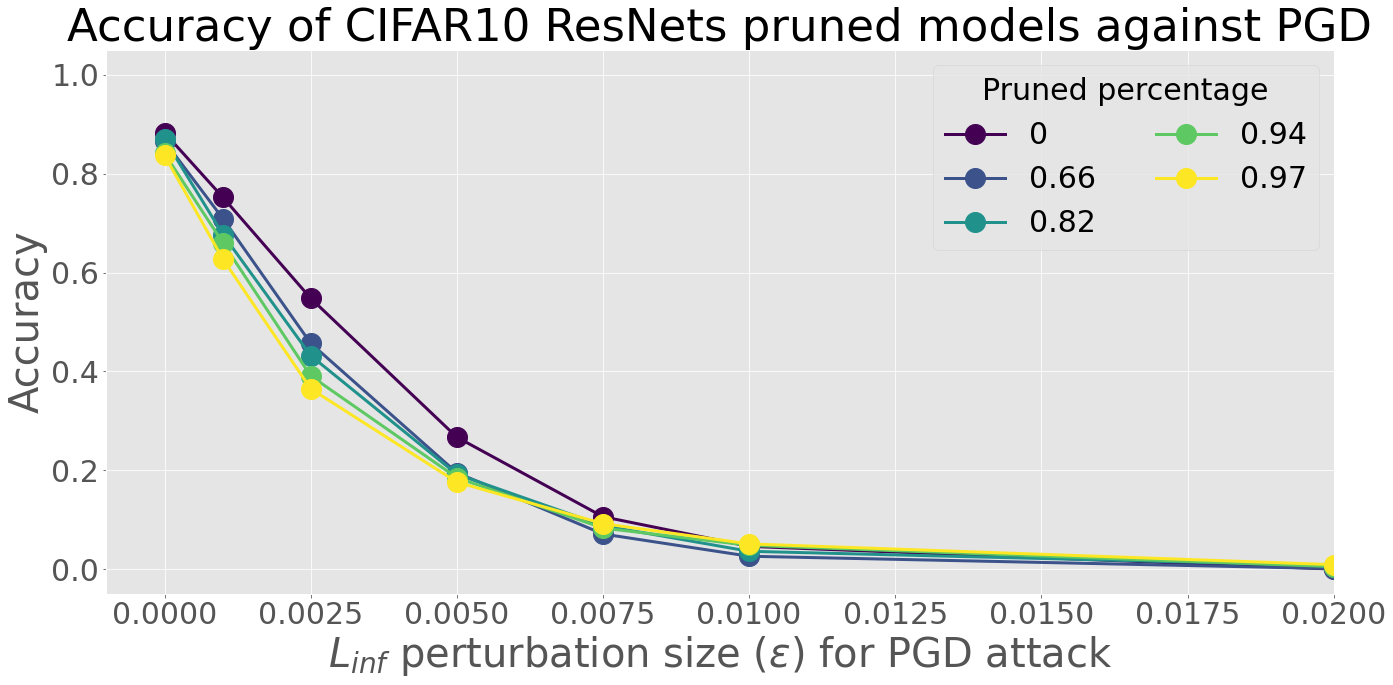

In [57]:
pruned_auc = dict()
pruned_auc[0] = {0: 0.883, 0.001: 0.752, 0.0025: 0.548, 0.005: 0.267, 0.0075: 0.106, 0.01: 0.046, 0.02: 0.0, 0.03: 0.0, 0.04: 0.0, 0.05: 0.0, 0.1: 0.0}
#pruned_auc[0.1] = {0: 0.889, 0.001: 0.739, 0.0025: 0.489, 0.005: 0.212, 0.0075: 0.082, 0.01: 0.032, 0.02: 0.0, 0.03: 0.0, 0.04: 0.0, 0.05: 0.0, 0.1: 0.0}
#pruned_auc[0.19] = {0: 0.882, 0.001: 0.733, 0.0025: 0.469, 0.005: 0.203, 0.0075: 0.081, 0.01: 0.025, 0.02: 0.001, 0.03: 0.0, 0.04: 0.001, 0.05: 0.0, 0.1: 0.0}
#pruned_auc[0.27] = {0: 0.885, 0.001: 0.731, 0.0025: 0.493, 0.005: 0.192, 0.0075: 0.066, 0.01: 0.023, 0.02: 0.0, 0.03: 0.0, 0.04: 0.0, 0.05: 0.0, 0.1: 0.0}
#pruned_auc[0.34] = {0: 0.869, 0.001: 0.718, 0.0025: 0.474, 0.005: 0.2, 0.0075: 0.076, 0.01: 0.023, 0.02: 0.0, 0.03: 0.0, 0.04: 0.0, 0.05: 0.0, 0.1: 0.0}
#pruned_auc[0.41] = {0: 0.894, 0.001: 0.721, 0.0025: 0.474, 0.005: 0.192, 0.0075: 0.06, 0.01: 0.018, 0.02: 0.0, 0.03: 0.0, 0.04: 0.0, 0.05: 0.0, 0.1: 0.0}
#pruned_auc[0.47] = {0: 0.889, 0.001: 0.729, 0.0025: 0.493, 0.005: 0.221, 0.0075: 0.09, 0.01: 0.036, 0.02: 0.0, 0.03: 0.0, 0.04: 0.0, 0.05: 0.0, 0.1: 0.0}
#pruned_auc[0.52] = {0: 0.881, 0.001: 0.735, 0.0025: 0.489, 0.005: 0.202, 0.0075: 0.069, 0.01: 0.025, 0.02: 0.0, 0.03: 0.0, 0.04: 0.0, 0.05: 0.0, 0.1: 0.0}
pruned_auc[0.66] = {0: 0.866, 0.001: 0.709, 0.0025: 0.457, 0.005: 0.195, 0.0075: 0.071, 0.01: 0.026, 0.02: 0.001, 0.03: 0.0, 0.04: 0.0, 0.05: 0.0, 0.1: 0.0}
#pruned_auc[0.76] = {0: 0.884, 0.001: 0.709, 0.0025: 0.447, 0.005: 0.178, 0.0075: 0.068, 0.01: 0.021, 0.02: 0.0, 0.03: 0.0, 0.04: 0.0, 0.05: 0.0, 0.1: 0.0}
pruned_auc[0.82] = {0: 0.87, 0.001: 0.677, 0.0025: 0.432, 0.005: 0.192, 0.0075: 0.088, 0.01: 0.036, 0.02: 0.007, 0.03: 0.004, 0.04: 0.0, 0.05: 0.0, 0.1: 0.0}
pruned_auc[0.94] = {0: 0.841, 0.001: 0.66, 0.0025: 0.391, 0.005: 0.185, 0.0075: 0.083, 0.01: 0.048, 0.02: 0.005, 0.03: 0.0, 0.04: 0.0, 0.05: 0.0, 0.1: 0.0}
pruned_auc[0.97] = {0: 0.837, 0.001: 0.627, 0.0025: 0.365, 0.005: 0.176, 0.0075: 0.092, 0.01: 0.051, 0.02: 0.009, 0.03: 0.003, 0.04: 0.002, 0.05: 0.001, 0.1: 0.0}

import matplotlib.pyplot as plt
from matplotlib import cm
mycolors = cm.get_cmap("viridis", len(list(pruned_auc.keys()))).colors
plt.style.use('ggplot')
plt.figure(figsize=(22,10))
for i, key in enumerate(pruned_auc.keys()):
    plt.plot(list(pruned_auc[key].keys()), list(pruned_auc[key].values()),
             "-o", color=mycolors[i], label=key, linewidth=3, ms=20)
lg = plt.legend(title="Pruned percentage", fontsize=30, ncol=2)
lg.get_title().set_fontsize(30)
plt.title("Accuracy of CIFAR10 ResNets pruned models against PGD", fontsize=45)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel(r"$L_{inf}$ perturbation size ($\varepsilon$) for PGD attack", fontsize=40)
plt.ylabel("Accuracy", fontsize=40)
plt.xlim(-0.001,0.02)
#plt.xlim(0.005,0.015)
plt.ylim(-0.05,1.05)
#plt.ylim(-0.05,0.4)
plt.show()
    


### For MNIST LeNet

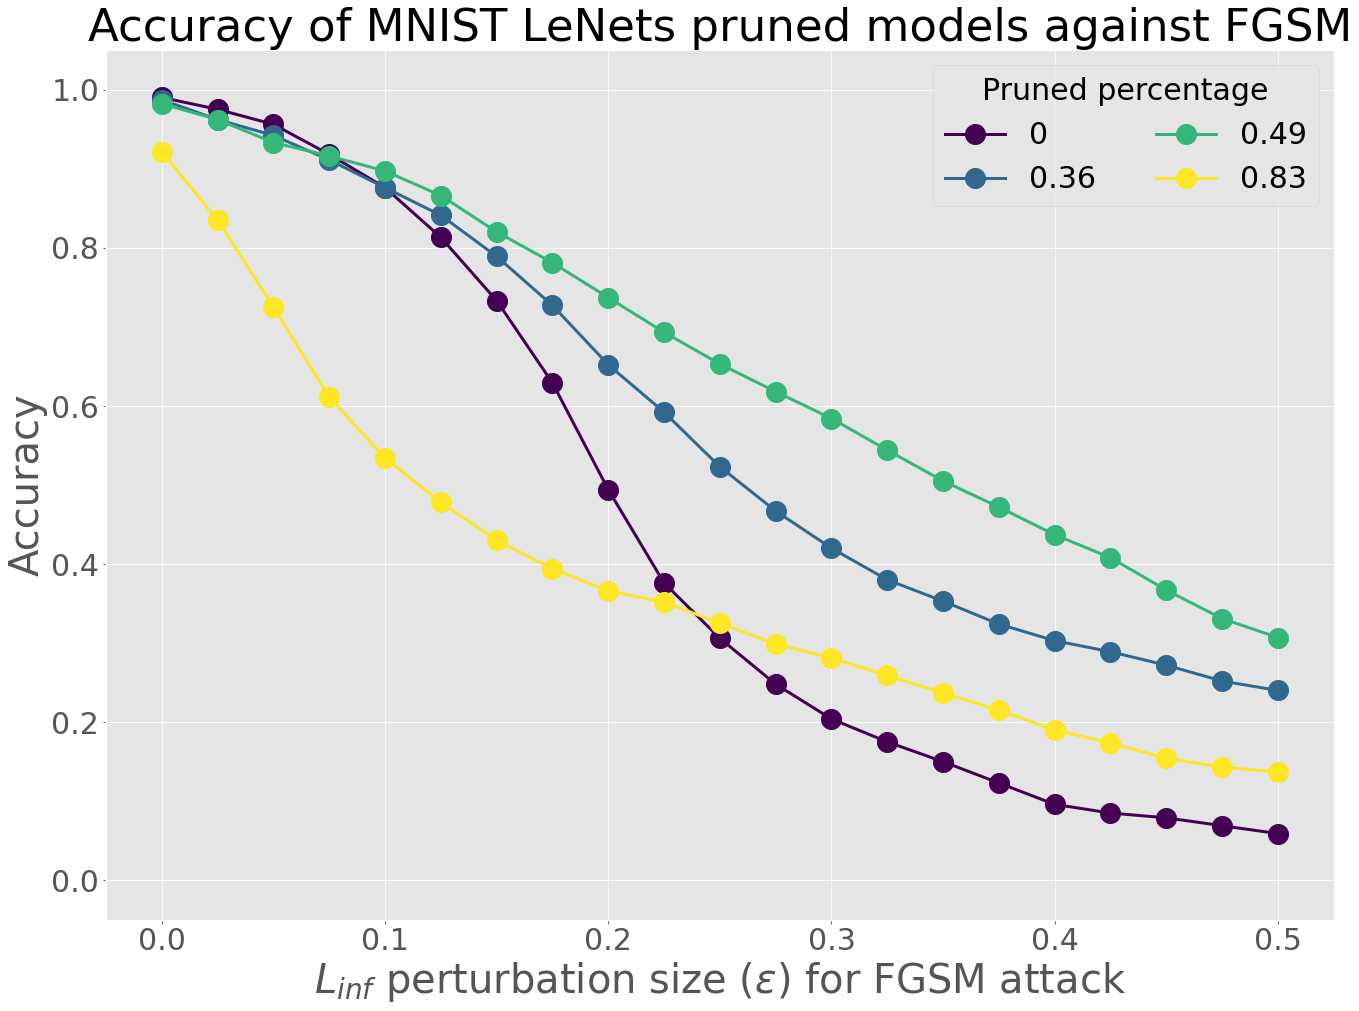

In [48]:
pruned_res = dict()
pruned_res[0] = {0.0: 0.99, 0.025: 0.975, 0.05: 0.956, 0.07500000000000001: 0.918, 0.1: 0.876, 0.125: 0.813, 0.15000000000000002: 0.733, 0.17500000000000002: 0.629, 0.2: 0.494, 0.225: 0.376, 0.25: 0.306, 0.275: 0.248, 0.30000000000000004: 0.204, 0.325: 0.175, 0.35000000000000003: 0.15, 0.375: 0.123, 0.4: 0.096, 0.42500000000000004: 0.085, 0.45: 0.079, 0.47500000000000003: 0.069, 0.5: 0.059}
#pruned_res[0.2] = {0.0: 0.993, 0.025: 0.975, 0.05: 0.956, 0.07500000000000001: 0.937, 0.1: 0.903, 0.125: 0.847, 0.15000000000000002: 0.776, 0.17500000000000002: 0.69, 0.2: 0.59, 0.225: 0.488, 0.25: 0.384, 0.275: 0.31, 0.30000000000000004: 0.262, 0.325: 0.223, 0.35000000000000003: 0.189, 0.375: 0.167, 0.4: 0.147, 0.42500000000000004: 0.134, 0.45: 0.113, 0.47500000000000003: 0.1, 0.5: 0.089}
pruned_res[0.36] = {0.0: 0.987, 0.025: 0.962, 0.05: 0.942, 0.07500000000000001: 0.911, 0.1: 0.876, 0.125: 0.841, 0.15000000000000002: 0.789, 0.17500000000000002: 0.727, 0.2: 0.652, 0.225: 0.592, 0.25: 0.523, 0.275: 0.467, 0.30000000000000004: 0.42, 0.325: 0.38, 0.35000000000000003: 0.353, 0.375: 0.324, 0.4: 0.303, 0.42500000000000004: 0.289, 0.45: 0.272, 0.47500000000000003: 0.252, 0.5: 0.24}
pruned_res[0.49] = {0.0: 0.982, 0.025: 0.962, 0.05: 0.933, 0.07500000000000001: 0.916, 0.1: 0.897, 0.125: 0.866, 0.15000000000000002: 0.82, 0.17500000000000002: 0.781, 0.2: 0.737, 0.225: 0.693, 0.25: 0.653, 0.275: 0.618, 0.30000000000000004: 0.584, 0.325: 0.544, 0.35000000000000003: 0.505, 0.375: 0.472, 0.4: 0.437, 0.42500000000000004: 0.408, 0.45: 0.367, 0.47500000000000003: 0.331, 0.5: 0.307}
#pruned_res[0.59] = {0.0: 0.982, 0.025: 0.953, 0.05: 0.934, 0.07500000000000001: 0.916, 0.1: 0.877, 0.125: 0.843, 0.15000000000000002: 0.801, 0.17500000000000002: 0.753, 0.2: 0.693, 0.225: 0.644, 0.25: 0.611, 0.275: 0.573, 0.30000000000000004: 0.547, 0.325: 0.502, 0.35000000000000003: 0.47, 0.375: 0.437, 0.4: 0.407, 0.42500000000000004: 0.381, 0.45: 0.352, 0.47500000000000003: 0.332, 0.5: 0.312}
#pruned_res[0.67] = {0.0: 0.974, 0.025: 0.949, 0.05: 0.916, 0.07500000000000001: 0.888, 0.1: 0.859, 0.125: 0.826, 0.15000000000000002: 0.788, 0.17500000000000002: 0.755, 0.2: 0.721, 0.225: 0.683, 0.25: 0.651, 0.275: 0.622, 0.30000000000000004: 0.588, 0.325: 0.558, 0.35000000000000003: 0.526, 0.375: 0.481, 0.4: 0.448, 0.42500000000000004: 0.425, 0.45: 0.404, 0.47500000000000003: 0.381, 0.5: 0.364}
#pruned_res[0.74] = {0.0: 0.973, 0.025: 0.938, 0.05: 0.91, 0.07500000000000001: 0.878, 0.1: 0.851, 0.125: 0.808, 0.15000000000000002: 0.775, 0.17500000000000002: 0.731, 0.2: 0.702, 0.225: 0.651, 0.25: 0.621, 0.275: 0.584, 0.30000000000000004: 0.552, 0.325: 0.515, 0.35000000000000003: 0.483, 0.375: 0.45, 0.4: 0.422, 0.42500000000000004: 0.39, 0.45: 0.364, 0.47500000000000003: 0.342, 0.5: 0.329}
#pruned_res[0.79] = {0.0: 0.962, 0.025: 0.905, 0.05: 0.871, 0.07500000000000001: 0.83, 0.1: 0.797, 0.125: 0.758, 0.15000000000000002: 0.722, 0.17500000000000002: 0.675, 0.2: 0.641, 0.225: 0.619, 0.25: 0.585, 0.275: 0.56, 0.30000000000000004: 0.526, 0.325: 0.498, 0.35000000000000003: 0.48, 0.375: 0.455, 0.4: 0.43, 0.42500000000000004: 0.411, 0.45: 0.397, 0.47500000000000003: 0.381, 0.5: 0.36}
pruned_res[0.83] = {0.0: 0.921, 0.025: 0.835, 0.05: 0.725, 0.07500000000000001: 0.611, 0.1: 0.534, 0.125: 0.478, 0.15000000000000002: 0.43, 0.17500000000000002: 0.394, 0.2: 0.366, 0.225: 0.352, 0.25: 0.325, 0.275: 0.299, 0.30000000000000004: 0.281, 0.325: 0.259, 0.35000000000000003: 0.237, 0.375: 0.215, 0.4: 0.19, 0.42500000000000004: 0.174, 0.45: 0.154, 0.47500000000000003: 0.143, 0.5: 0.137}


import matplotlib.pyplot as plt
from matplotlib import cm
mycolors = cm.get_cmap("viridis", len(list(pruned_res.keys()))).colors
plt.style.use('ggplot')
plt.figure(figsize=(22,16))
for i, key in enumerate(pruned_res.keys()):
    plt.plot(list(pruned_res[key].keys()), list(pruned_res[key].values()),
             "-o", color=mycolors[i], label=key, linewidth=3, ms=20)
lg = plt.legend(title="Pruned percentage", fontsize=30, ncol=2)
lg.get_title().set_fontsize(30)
plt.title("Accuracy of MNIST LeNets pruned models against FGSM", fontsize=45)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel(r"$L_{inf}$ perturbation size ($\varepsilon$) for FGSM attack", fontsize=40)
plt.ylabel("Accuracy", fontsize=40)
#plt.xlim(-0.001,0.02)
plt.ylim(-0.05,1.05)
plt.show()


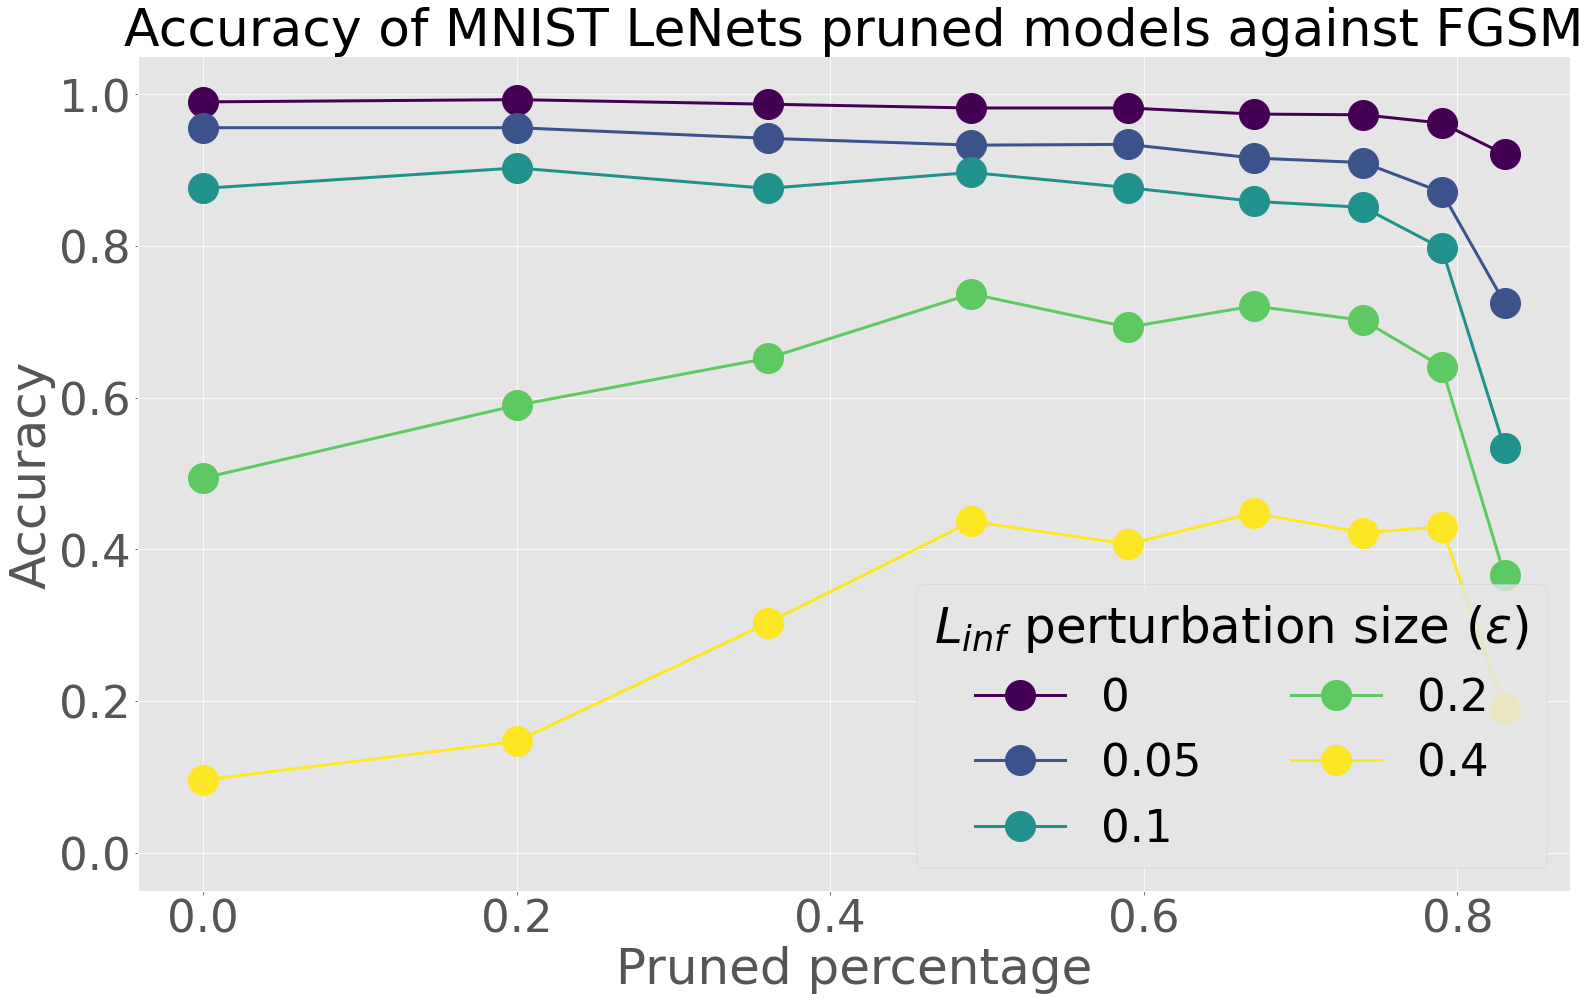

In [81]:
pruned_res = dict()
pruned_res[0] = {0.0: 0.99, 0.025: 0.975, 0.05: 0.956, 0.07500000000000001: 0.918, 0.1: 0.876, 0.125: 0.813, 0.15000000000000002: 0.733, 0.17500000000000002: 0.629, 0.2: 0.494, 0.225: 0.376, 0.25: 0.306, 0.275: 0.248, 0.30000000000000004: 0.204, 0.325: 0.175, 0.35000000000000003: 0.15, 0.375: 0.123, 0.4: 0.096, 0.42500000000000004: 0.085, 0.45: 0.079, 0.47500000000000003: 0.069, 0.5: 0.059}
pruned_res[0.2] = {0.0: 0.993, 0.025: 0.975, 0.05: 0.956, 0.07500000000000001: 0.937, 0.1: 0.903, 0.125: 0.847, 0.15000000000000002: 0.776, 0.17500000000000002: 0.69, 0.2: 0.59, 0.225: 0.488, 0.25: 0.384, 0.275: 0.31, 0.30000000000000004: 0.262, 0.325: 0.223, 0.35000000000000003: 0.189, 0.375: 0.167, 0.4: 0.147, 0.42500000000000004: 0.134, 0.45: 0.113, 0.47500000000000003: 0.1, 0.5: 0.089}
pruned_res[0.36] = {0.0: 0.987, 0.025: 0.962, 0.05: 0.942, 0.07500000000000001: 0.911, 0.1: 0.876, 0.125: 0.841, 0.15000000000000002: 0.789, 0.17500000000000002: 0.727, 0.2: 0.652, 0.225: 0.592, 0.25: 0.523, 0.275: 0.467, 0.30000000000000004: 0.42, 0.325: 0.38, 0.35000000000000003: 0.353, 0.375: 0.324, 0.4: 0.303, 0.42500000000000004: 0.289, 0.45: 0.272, 0.47500000000000003: 0.252, 0.5: 0.24}
pruned_res[0.49] = {0.0: 0.982, 0.025: 0.962, 0.05: 0.933, 0.07500000000000001: 0.916, 0.1: 0.897, 0.125: 0.866, 0.15000000000000002: 0.82, 0.17500000000000002: 0.781, 0.2: 0.737, 0.225: 0.693, 0.25: 0.653, 0.275: 0.618, 0.30000000000000004: 0.584, 0.325: 0.544, 0.35000000000000003: 0.505, 0.375: 0.472, 0.4: 0.437, 0.42500000000000004: 0.408, 0.45: 0.367, 0.47500000000000003: 0.331, 0.5: 0.307}
pruned_res[0.59] = {0.0: 0.982, 0.025: 0.953, 0.05: 0.934, 0.07500000000000001: 0.916, 0.1: 0.877, 0.125: 0.843, 0.15000000000000002: 0.801, 0.17500000000000002: 0.753, 0.2: 0.693, 0.225: 0.644, 0.25: 0.611, 0.275: 0.573, 0.30000000000000004: 0.547, 0.325: 0.502, 0.35000000000000003: 0.47, 0.375: 0.437, 0.4: 0.407, 0.42500000000000004: 0.381, 0.45: 0.352, 0.47500000000000003: 0.332, 0.5: 0.312}
pruned_res[0.67] = {0.0: 0.974, 0.025: 0.949, 0.05: 0.916, 0.07500000000000001: 0.888, 0.1: 0.859, 0.125: 0.826, 0.15000000000000002: 0.788, 0.17500000000000002: 0.755, 0.2: 0.721, 0.225: 0.683, 0.25: 0.651, 0.275: 0.622, 0.30000000000000004: 0.588, 0.325: 0.558, 0.35000000000000003: 0.526, 0.375: 0.481, 0.4: 0.448, 0.42500000000000004: 0.425, 0.45: 0.404, 0.47500000000000003: 0.381, 0.5: 0.364}
pruned_res[0.74] = {0.0: 0.973, 0.025: 0.938, 0.05: 0.91, 0.07500000000000001: 0.878, 0.1: 0.851, 0.125: 0.808, 0.15000000000000002: 0.775, 0.17500000000000002: 0.731, 0.2: 0.702, 0.225: 0.651, 0.25: 0.621, 0.275: 0.584, 0.30000000000000004: 0.552, 0.325: 0.515, 0.35000000000000003: 0.483, 0.375: 0.45, 0.4: 0.422, 0.42500000000000004: 0.39, 0.45: 0.364, 0.47500000000000003: 0.342, 0.5: 0.329}
pruned_res[0.79] = {0.0: 0.962, 0.025: 0.905, 0.05: 0.871, 0.07500000000000001: 0.83, 0.1: 0.797, 0.125: 0.758, 0.15000000000000002: 0.722, 0.17500000000000002: 0.675, 0.2: 0.641, 0.225: 0.619, 0.25: 0.585, 0.275: 0.56, 0.30000000000000004: 0.526, 0.325: 0.498, 0.35000000000000003: 0.48, 0.375: 0.455, 0.4: 0.43, 0.42500000000000004: 0.411, 0.45: 0.397, 0.47500000000000003: 0.381, 0.5: 0.36}
pruned_res[0.83] = {0.0: 0.921, 0.025: 0.835, 0.05: 0.725, 0.07500000000000001: 0.611, 0.1: 0.534, 0.125: 0.478, 0.15000000000000002: 0.43, 0.17500000000000002: 0.394, 0.2: 0.366, 0.225: 0.352, 0.25: 0.325, 0.275: 0.299, 0.30000000000000004: 0.281, 0.325: 0.259, 0.35000000000000003: 0.237, 0.375: 0.215, 0.4: 0.19, 0.42500000000000004: 0.174, 0.45: 0.154, 0.47500000000000003: 0.143, 0.5: 0.137}

to_keep_eps = [0, 0.05, 0.1, 0.2, 0.4]


import matplotlib.pyplot as plt
from matplotlib import cm
mycolors = cm.get_cmap("viridis", len(to_keep_eps)).colors
plt.style.use('ggplot')
plt.figure(figsize=(22,14))
for i, key in enumerate(to_keep_eps):
    pry = [pruned_res[k_][key] for k_ in pruned_res.keys()]
    plt.plot(list(pruned_res.keys()), pry,
             "-o", color=mycolors[i], label=key, linewidth=3, ms=30)
lg = plt.legend(title=r"$L_{inf}$ perturbation size ($\varepsilon$)", fontsize=45, ncol=2)
lg.get_title().set_fontsize(50)
plt.title("Accuracy of MNIST LeNets pruned models against FGSM", fontsize=52)
plt.xticks(size=45)
plt.yticks(size=45)
plt.xlabel("Pruned percentage", fontsize=50)
plt.ylabel("Accuracy", fontsize=50)
#plt.xlim(-0.001,0.02)
plt.ylim(-0.05,1.05)
#plt.show()
plt.tight_layout()

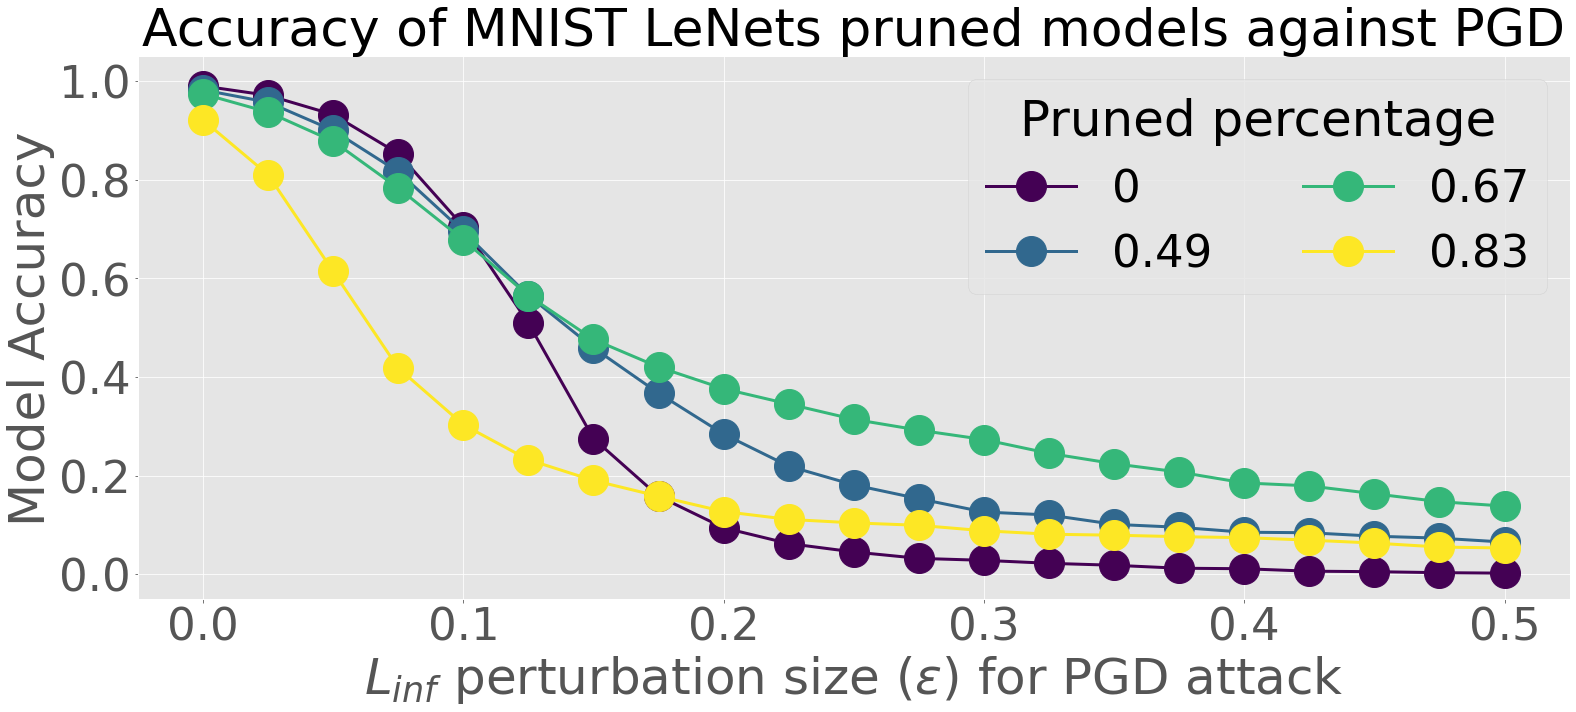

In [107]:
pruned_res = dict()
pruned_res[0] = {0.0: 0.99, 0.025: 0.971, 0.05: 0.932, 0.07500000000000001: 0.853, 0.1: 0.705, 0.125: 0.509, 0.15000000000000002: 0.275, 0.17500000000000002:0.158, 0.2: 0.094, 0.225: 0.062, 0.25: 0.045, 0.275: 0.032, 0.30000000000000004: 0.028, 0.325: 0.022, 0.35000000000000003: 0.018, 0.375: 0.012, 0.4: 0.011, 0.42500000000000004: 0.006, 0.45: 0.005, 0.47500000000000003: 0.003, 0.5: 0.002}
#pruned_res[0.2] = {0.0: 0.993, 0.025: 0.97, 0.05: 0.935, 0.07500000000000001: 0.836, 0.1: 0.694, 0.125: 0.494, 0.15000000000000002: 0.322, 0.17500000000000002:0.195, 0.2: 0.111, 0.225: 0.063, 0.25: 0.042, 0.275: 0.027, 0.30000000000000004: 0.022, 0.325: 0.012, 0.35000000000000003: 0.007, 0.375: 0.004, 0.4: 0.005, 0.42500000000000004: 0.004, 0.45: 0.002, 0.47500000000000003: 0.002, 0.5: 0.001}
#pruned_res[0.36] = {0.0: 0.987, 0.025: 0.956, 0.05: 0.904, 0.07500000000000001: 0.82, 0.1: 0.7, 0.125: 0.54, 0.15000000000000002: 0.395, 0.17500000000000002: 0.321, 0.2: 0.234, 0.225: 0.167, 0.25: 0.127, 0.275: 0.096, 0.30000000000000004: 0.071, 0.325: 0.058, 0.35000000000000003: 0.052, 0.375: 0.042, 0.4: 0.036, 0.42500000000000004: 0.034, 0.45: 0.032, 0.47500000000000003: 0.032, 0.5: 0.028}
pruned_res[0.49] = {0.0: 0.982, 0.025: 0.957, 0.05: 0.9, 0.07500000000000001: 0.816, 0.1: 0.695, 0.125: 0.565, 0.15000000000000002: 0.459, 0.17500000000000002: 0.367, 0.2: 0.284, 0.225: 0.219, 0.25: 0.181, 0.275: 0.153, 0.30000000000000004: 0.126, 0.325: 0.12, 0.35000000000000003: 0.101, 0.375: 0.095, 0.4: 0.085, 0.42500000000000004: 0.084, 0.45: 0.077, 0.47500000000000003: 0.073, 0.5: 0.065}
#pruned_res[0.59] = {0.0: 0.982, 0.025: 0.947, 0.05: 0.887, 0.07500000000000001: 0.778, 0.1: 0.656, 0.125: 0.547, 0.15000000000000002: 0.461, 0.17500000000000002: 0.399, 0.2: 0.344, 0.225: 0.29, 0.25: 0.252, 0.275: 0.216, 0.30000000000000004: 0.191, 0.325: 0.164, 0.35000000000000003: 0.146, 0.375: 0.13, 0.4: 0.109, 0.42500000000000004: 0.104, 0.45: 0.098, 0.47500000000000003: 0.093, 0.5: 0.086}
pruned_res[0.67] = {0.0: 0.974, 0.025: 0.937, 0.05: 0.878, 0.07500000000000001: 0.783, 0.1: 0.678, 0.125: 0.565, 0.15000000000000002: 0.476, 0.17500000000000002: 0.42, 0.2: 0.376, 0.225: 0.345, 0.25: 0.314, 0.275: 0.292, 0.30000000000000004: 0.273, 0.325: 0.245, 0.35000000000000003: 0.224, 0.375: 0.207, 0.4: 0.185, 0.42500000000000004: 0.179, 0.45: 0.163, 0.47500000000000003: 0.147, 0.5: 0.138}
#pruned_res[0.74] = {0.0: 0.973, 0.025: 0.926, 0.05: 0.85, 0.07500000000000001: 0.741, 0.1: 0.641, 0.125: 0.541, 0.15000000000000002: 0.434, 0.17500000000000002: 0.363, 0.2: 0.305, 0.225: 0.256, 0.25: 0.221, 0.275: 0.181, 0.30000000000000004: 0.157, 0.325: 0.137, 0.35000000000000003: 0.122, 0.375: 0.115, 0.4: 0.105, 0.42500000000000004: 0.089, 0.45: 0.084, 0.47500000000000003: 0.082, 0.5: 0.071}
#pruned_res[0.79] = {0.0: 0.962, 0.025: 0.885, 0.05: 0.785, 0.07500000000000001: 0.657, 0.1: 0.555, 0.125: 0.484, 0.15000000000000002: 0.445, 0.17500000000000002: 0.413, 0.2: 0.384, 0.225: 0.349, 0.25: 0.317, 0.275: 0.297, 0.30000000000000004: 0.279, 0.325: 0.251, 0.35000000000000003: 0.238, 0.375: 0.23, 0.4: 0.219, 0.42500000000000004: 0.202, 0.45: 0.185, 0.47500000000000003: 0.175, 0.5: 0.17}
pruned_res[0.83] = {0.0: 0.921, 0.025: 0.81, 0.05: 0.614, 0.07500000000000001: 0.418, 0.1: 0.303, 0.125: 0.232, 0.15000000000000002: 0.19, 0.17500000000000002: 0.158, 0.2: 0.127, 0.225: 0.111, 0.25: 0.104, 0.275: 0.099, 0.30000000000000004: 0.088, 0.325: 0.081, 0.35000000000000003: 0.079, 0.375: 0.076, 0.4: 0.074, 0.42500000000000004: 0.069, 0.45: 0.063, 0.47500000000000003: 0.055, 0.5: 0.053}


import matplotlib.pyplot as plt
from matplotlib import cm
mycolors = cm.get_cmap("viridis", len(list(pruned_res.keys()))).colors
plt.style.use('ggplot')
plt.figure(figsize=(22,10))
for i, key in enumerate(pruned_res.keys()):
    plt.plot(list(pruned_res[key].keys()), list(pruned_res[key].values()),
             "-o", color=mycolors[i], label=key, linewidth=3, ms=30)
lg = plt.legend(title="Pruned percentage", fontsize=45, ncol=2)
lg.get_title().set_fontsize(50)
plt.title("Accuracy of MNIST LeNets pruned models against PGD", fontsize=52)
plt.xticks(size=45)
plt.yticks(size=45)
plt.xlabel(r"$L_{inf}$ perturbation size ($\varepsilon$) for PGD attack", fontsize=50)
plt.ylabel("Model Accuracy", fontsize=50)
#plt.xlim(-0.001,0.02)
plt.ylim(-0.05,1.05)
#plt.show()
plt.tight_layout()
plt.savefig("/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/plots_for_paper/pruned_accuracy.png",dpi=200)

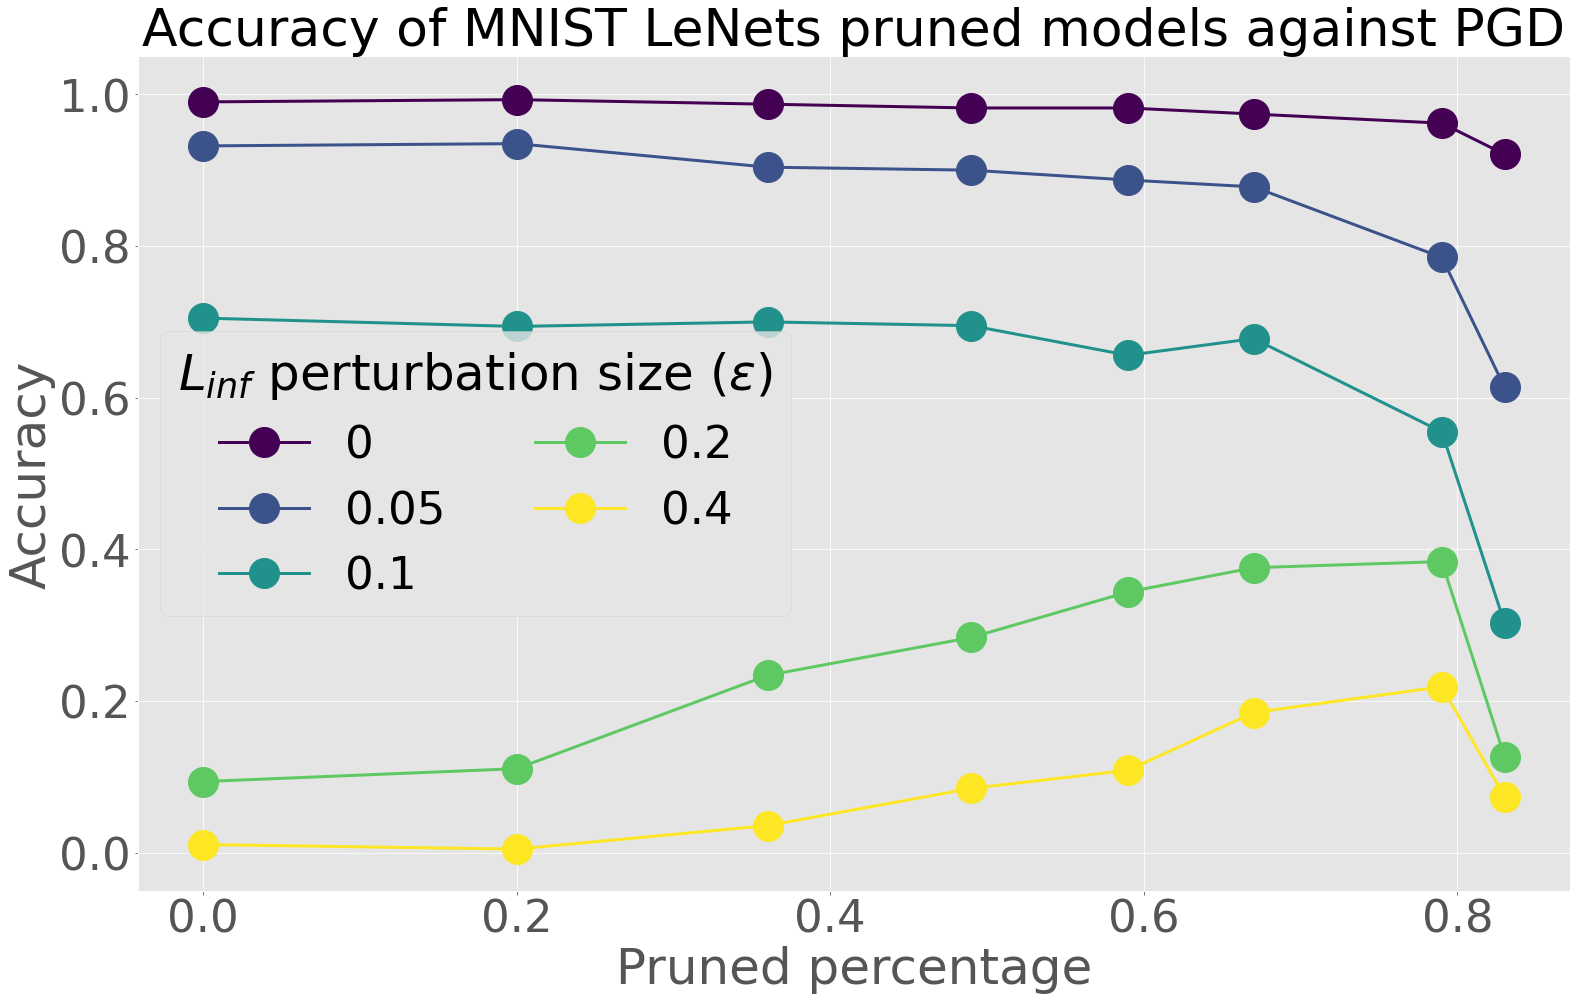

In [83]:
pruned_res = dict()
pruned_res[0] = {0.0: 0.99, 0.025: 0.971, 0.05: 0.932, 0.07500000000000001: 0.853, 0.1: 0.705, 0.125: 0.509, 0.15000000000000002: 0.275, 0.17500000000000002:0.158, 0.2: 0.094, 0.225: 0.062, 0.25: 0.045, 0.275: 0.032, 0.30000000000000004: 0.028, 0.325: 0.022, 0.35000000000000003: 0.018, 0.375: 0.012, 0.4: 0.011, 0.42500000000000004: 0.006, 0.45: 0.005, 0.47500000000000003: 0.003, 0.5: 0.002}
pruned_res[0.2] = {0.0: 0.993, 0.025: 0.97, 0.05: 0.935, 0.07500000000000001: 0.836, 0.1: 0.694, 0.125: 0.494, 0.15000000000000002: 0.322, 0.17500000000000002:0.195, 0.2: 0.111, 0.225: 0.063, 0.25: 0.042, 0.275: 0.027, 0.30000000000000004: 0.022, 0.325: 0.012, 0.35000000000000003: 0.007, 0.375: 0.004, 0.4: 0.005, 0.42500000000000004: 0.004, 0.45: 0.002, 0.47500000000000003: 0.002, 0.5: 0.001}
pruned_res[0.36] = {0.0: 0.987, 0.025: 0.956, 0.05: 0.904, 0.07500000000000001: 0.82, 0.1: 0.7, 0.125: 0.54, 0.15000000000000002: 0.395, 0.17500000000000002: 0.321, 0.2: 0.234, 0.225: 0.167, 0.25: 0.127, 0.275: 0.096, 0.30000000000000004: 0.071, 0.325: 0.058, 0.35000000000000003: 0.052, 0.375: 0.042, 0.4: 0.036, 0.42500000000000004: 0.034, 0.45: 0.032, 0.47500000000000003: 0.032, 0.5: 0.028}
pruned_res[0.49] = {0.0: 0.982, 0.025: 0.957, 0.05: 0.9, 0.07500000000000001: 0.816, 0.1: 0.695, 0.125: 0.565, 0.15000000000000002: 0.459, 0.17500000000000002: 0.367, 0.2: 0.284, 0.225: 0.219, 0.25: 0.181, 0.275: 0.153, 0.30000000000000004: 0.126, 0.325: 0.12, 0.35000000000000003: 0.101, 0.375: 0.095, 0.4: 0.085, 0.42500000000000004: 0.084, 0.45: 0.077, 0.47500000000000003: 0.073, 0.5: 0.065}
pruned_res[0.59] = {0.0: 0.982, 0.025: 0.947, 0.05: 0.887, 0.07500000000000001: 0.778, 0.1: 0.656, 0.125: 0.547, 0.15000000000000002: 0.461, 0.17500000000000002: 0.399, 0.2: 0.344, 0.225: 0.29, 0.25: 0.252, 0.275: 0.216, 0.30000000000000004: 0.191, 0.325: 0.164, 0.35000000000000003: 0.146, 0.375: 0.13, 0.4: 0.109, 0.42500000000000004: 0.104, 0.45: 0.098, 0.47500000000000003: 0.093, 0.5: 0.086}
pruned_res[0.67] = {0.0: 0.974, 0.025: 0.937, 0.05: 0.878, 0.07500000000000001: 0.783, 0.1: 0.678, 0.125: 0.565, 0.15000000000000002: 0.476, 0.17500000000000002: 0.42, 0.2: 0.376, 0.225: 0.345, 0.25: 0.314, 0.275: 0.292, 0.30000000000000004: 0.273, 0.325: 0.245, 0.35000000000000003: 0.224, 0.375: 0.207, 0.4: 0.185, 0.42500000000000004: 0.179, 0.45: 0.163, 0.47500000000000003: 0.147, 0.5: 0.138}
#pruned_res[0.74] = {0.0: 0.973, 0.025: 0.926, 0.05: 0.85, 0.07500000000000001: 0.741, 0.1: 0.641, 0.125: 0.541, 0.15000000000000002: 0.434, 0.17500000000000002: 0.363, 0.2: 0.305, 0.225: 0.256, 0.25: 0.221, 0.275: 0.181, 0.30000000000000004: 0.157, 0.325: 0.137, 0.35000000000000003: 0.122, 0.375: 0.115, 0.4: 0.105, 0.42500000000000004: 0.089, 0.45: 0.084, 0.47500000000000003: 0.082, 0.5: 0.071}
pruned_res[0.79] = {0.0: 0.962, 0.025: 0.885, 0.05: 0.785, 0.07500000000000001: 0.657, 0.1: 0.555, 0.125: 0.484, 0.15000000000000002: 0.445, 0.17500000000000002: 0.413, 0.2: 0.384, 0.225: 0.349, 0.25: 0.317, 0.275: 0.297, 0.30000000000000004: 0.279, 0.325: 0.251, 0.35000000000000003: 0.238, 0.375: 0.23, 0.4: 0.219, 0.42500000000000004: 0.202, 0.45: 0.185, 0.47500000000000003: 0.175, 0.5: 0.17}
pruned_res[0.83] = {0.0: 0.921, 0.025: 0.81, 0.05: 0.614, 0.07500000000000001: 0.418, 0.1: 0.303, 0.125: 0.232, 0.15000000000000002: 0.19, 0.17500000000000002: 0.158, 0.2: 0.127, 0.225: 0.111, 0.25: 0.104, 0.275: 0.099, 0.30000000000000004: 0.088, 0.325: 0.081, 0.35000000000000003: 0.079, 0.375: 0.076, 0.4: 0.074, 0.42500000000000004: 0.069, 0.45: 0.063, 0.47500000000000003: 0.055, 0.5: 0.053}

to_keep_eps = [0, 0.05, 0.1, 0.2, 0.4]


import matplotlib.pyplot as plt
from matplotlib import cm
mycolors = cm.get_cmap("viridis", len(to_keep_eps)).colors
plt.style.use('ggplot')
plt.figure(figsize=(22,14))
for i, key in enumerate(to_keep_eps):
    pry = [pruned_res[k_][key] for k_ in pruned_res.keys()]
    plt.plot(list(pruned_res.keys()), pry,
             "-o", color=mycolors[i], label=key, linewidth=3, ms=30)
lg = plt.legend(title=r"$L_{inf}$ perturbation size ($\varepsilon$)", fontsize=45, ncol=2)
lg.get_title().set_fontsize(50)
plt.title("Accuracy of MNIST LeNets pruned models against PGD", fontsize=52)
plt.xticks(size=45)
plt.yticks(size=45)
plt.xlabel("Pruned percentage", fontsize=50)
plt.ylabel("Accuracy", fontsize=50)
#plt.xlim(-0.001,0.02)
plt.ylim(-0.05,1.05)
#plt.show()
plt.tight_layout()

# Raw Graph relaunched

In [59]:
db_path = '/Users/m.goibert/sshfs/r3d3.db'
#db_path = '/Users/m.goibert/Downloads/r3d3.db'
db_path = '/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/TDA_for_adv_robustness/r3d3.db'
my_db = ExperimentDB(db_path)

In [64]:
# LOCAL Exp MNIST and Fashion MNIST 1605003063
# REMOTE : 1604944791
exp = 1605003063
df = my_db.show_experiment(exp)
df
#df["supervised_metrics"][5]

Common configuration {'binary': '/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/TDA_for_adv_robustness/tda/../tda/experiments/ours/our_binary.py', 'attack_backend': 'FOOLBOX', 'n_jobs': 1, 'sigmoidize': True, 'noise': 0.0, 'raw_graph_pca': -1, 'threshold_strategy': 'UnderoptimizedMagnitudeIncrease', 'dataset_size': 500, 'embedding_type': 'RawGraph', 'kernel_type': 'RBF'}


,run_id,all_epsilons,dataset,epochs,thresholds,attack_type,architecture,unsupervised_metrics,detailed_times_embeddings,detailed_times_stats,...,detailed_times_graph,detailed_times_T_UnderoptimizedMagnitudeIncrease,linf_diff,name,supervised_metrics,time,unsupervised_predictions,aucs_l2_norm,l2_diff,supervised_predictions
0,0,0.01;0.1;0.4,MNIST,50,0:0.025_2:0.025_4:0.025_6:0.025,PGD,mnist_lenet,{'0.01': {'auc': {'upper_bound': 0.98768902218...,1998.182361,0.395885,...,270.426726,399.430031,"{'0.01': [0.010000000000000009, 0.010000000000...",Graph,"{'0.01': {'auc': {'upper_bound': 1.0, 'value':...",2151.438402,"{'0.01': [[-1.6372689408683527e-06, -1.3517684...",None,"{'0.01': [0.19112070976202628, 0.2025278059724...","{'0.01': [[1.0000001292718266, 1.0000001302385..."
1,1,1.0,MNIST,50,0:0.025_2:0.025_4:0.025_6:0.025,CW,mnist_lenet,{'1.0': {'auc': {'upper_bound': 0.714002059791...,1157.443511,0.392410,...,148.976306,216.661342,"{'1.0': [0.5024135432288477, 1.0, 0.3889932821...",Graph,{'1.0': {'auc': {'upper_bound': 0.985094603588...,1227.702396,"{'1.0': [[-0.00015641862216853042, -0.00019128...","{'1.342690925579187': [0.9858681949058693, 0.9...","{'1.0': [2.8810729359951384, 9.424808016265002...","{'1.0': [[7.345155594862263e-10, -4.6004156040..."
2,2,1.0,MNIST,50,0:0.025_2:0.025_4:0.025_6:0.025,BOUNDARY,mnist_lenet,{'1.0': {'auc': {'upper_bound': 0.998926970278...,1148.446145,0.391665,...,157.001931,220.531836,"{'1.0': [0.4931868314743042, 0.334248274564743...",Graph,{'1.0': {'auc': {'upper_bound': 1.001215102600...,1216.880917,"{'1.0': [[-1.6372689408683527e-06, -1.35176842...","{'1.2771135114889578': [0.9982664637002343, 0....","{'1.0': [2.751499864549672, 1.498337491730445,...","{'1.0': [[2.3929502823705207e-10, 4.3710202124..."
3,3,0.01;0.1;0.4,FashionMNIST,100,0:0.05_2:0.05_4:0.05_6:0.05,PGD,fashion_mnist_lenet,{'0.01': {'auc': {'upper_bound': 0.61494687576...,3115.181371,39.194966,...,352.006240,627.036530,"{'0.01': [0.010000000000000009, 0.010000000000...",Graph,{'0.01': {'auc': {'upper_bound': 0.89859496045...,3403.398373,"{'0.01': [[1.7556998326284656e-05, 9.276850011...",None,"{'0.01': [0.23446458154697844, 0.2406565965348...","{'0.01': [[2.9136193457901527e-10, 1.160911367..."
4,4,1.0,FashionMNIST,100,0:0.05_2:0.05_4:0.05_6:0.05,CW,fashion_mnist_lenet,{'1.0': {'auc': {'upper_bound': 0.823086794267...,1409.428599,0.386835,...,176.413267,314.237343,"{'1.0': [0.01840385799157407, 0.01693552736468...",Graph,{'1.0': {'auc': {'upper_bound': 0.999757921623...,1512.440897,"{'1.0': [[1.7556998326284656e-05, 9.2768500117...","{'0.09963919395399057': [0.7882210328550829, 0...","{'1.0': [0.1188047017285045, 0.100369308504804...","{'1.0': [[1.526071491397829e-10, 5.87174753263..."
5,5,1.0,FashionMNIST,100,0:0.05_2:0.05_4:0.05_6:0.05,BOUNDARY,fashion_mnist_lenet,{'1.0': {'auc': {'upper_bound': 0.788043706598...,1232.055465,0.377652,...,140.370922,257.148494,"{'1.0': [0.022605715319514275, 0.0156559962779...",Graph,{'1.0': {'auc': {'upper_bound': 0.960123689663...,2822.764276,"{'1.0': [[1.7556998326284656e-05, 9.2768500117...","{'0.12169196745975179': [0.5692189743589744, 0...","{'1.0': [0.1644028086503459, 0.122834032049541...","{'1.0': [[1.1535749022684172e-09, 4.7581272255..."


[]

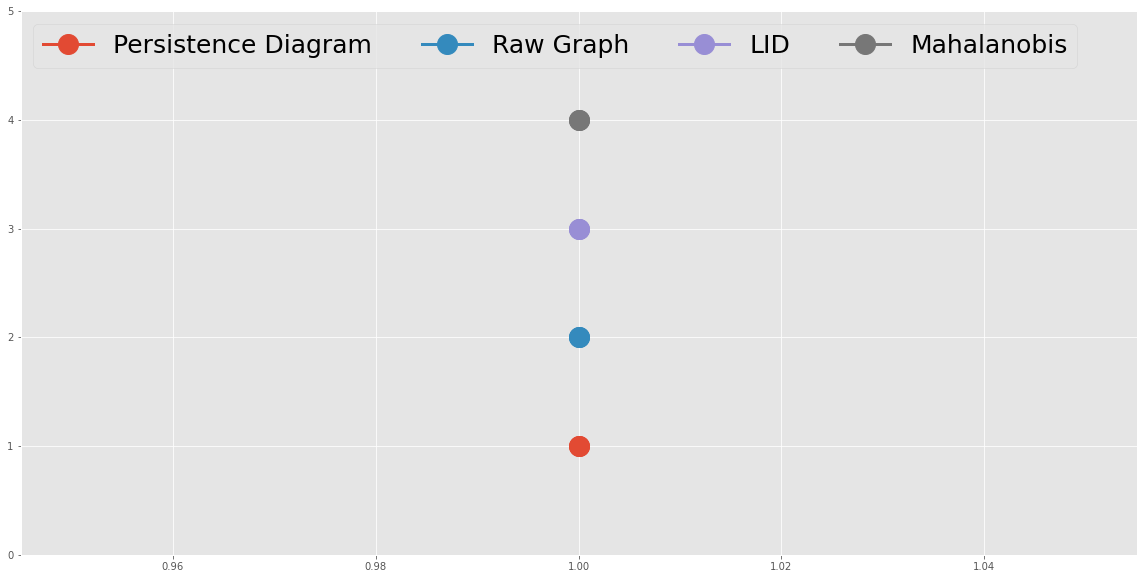

In [198]:
plt.figure(figsize=(20,10))
plt.plot([1,1],[1,1], "o-", label="Persistence Diagram", ms=20, linewidth=3)
plt.plot([1,1],[2,2], "o-", label="Raw Graph", ms=20, linewidth=3)
plt.plot([1,1],[3,3], "o-", label="LID", ms=20, linewidth=3)
plt.plot([1,1],[4,4], "o-", label="Mahalanobis", ms=20, linewidth=3)
plt.legend(ncol=4, loc="upper left", fontsize=25)
plt.ylim(0,5)
plt.savefig("/Users/m.goibert/Downloads/legend3.png",dpi=250)
plt.plot()

# Plots for paper

In [45]:
# Function to create the dicts

def create_dict(dataset, **kwargs):
    global_dict = dict()
    if not kwargs:
        kwargs = {'m1':["pd"], 'm2':["rg"], 'm3':["lid"], 'm4':["maha"]}
    
    # Get dict for PD (if PD in kwargs)
    for met in list(kwargs.values()):
        name = dataset+"_"+met+"_"
        subdict = {"PGD":dict(), "CW":dict(), "Boundary":dict()}
        for tuple_elem in list(zip(*[eval(name+'pgd_eps'), eval(name+'pgd_do'), eval(name+'pgd_val'), eval(name+'pgd_up')])):
            subdict["PGD"][tuple_elem[0]]  = list()
            for i in range(len(tuple_elem)-1):
                subdict["PGD"][tuple_elem[0]].append(tuple_elem[i+1])
        for tuple_elem in list(zip(*[eval(name+'cw_eps'), eval(name+'cw_do'), eval(name+'cw_val'), eval(name+'cw_up')])):
            subdict["CW"][tuple_elem[0]]  = list()
            for i in range(len(tuple_elem)-1):
                subdict["CW"][tuple_elem[0]].append(tuple_elem[i+1])
        for tuple_elem in list(zip(*[eval(name+'bnd_eps'), eval(name+'bnd_do'), eval(name+'bnd_val'), eval(name+'bnd_up')])):
            subdict["Boundary"][tuple_elem[0]]  = list()
            for i in range(len(tuple_elem)-1):
                subdict["Boundary"][tuple_elem[0]].append(tuple_elem[i+1])
        global_dict[met] = subdict
    
    return global_dict


In [46]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Function to plot the results

def plot_all_attacks(mydict, remove_additional_eps=True, ylabel_=False):

    nb_attacks = len(list(mydict[list(mydict.keys())[0]].keys()))
    fig, axs = plt.subplots(nb_attacks, figsize=(15,30))
    mycolors = {"pd":"#D1553E", "rg":"#4D88B9", "lid":"#968ED0", "maha":"#777777"}
    mylabels = {"pd":"PD", "rg":"RG", "lid":"LID", "maha":"Maha."}
    #mylabels = {"pd":"Persistence Diagram", "rg":"Raw Graph", "lid":"LID", "maha":"Mahalanobis"}
    
    y_bars = dict()
    yerr_bars = dict()
    eps_attack = dict()

    for idx_method, method in enumerate(mydict.keys()):
        i_bars = list()
        for i, attack in enumerate(list(mydict[method].keys())):
            eps = list(mydict[method][attack].keys())
            if attack in eps_attack:
                eps_attack[attack].append(eps)
            else:
                eps_attack[attack] = [eps]
            if remove_additional_eps and (len(eps) > 1):
                minval = min(map(max, eps_attack[attack]))
                eps = np.asarray(eps)
                eps = list(eps[eps <= minval])
            all_vals = list(zip(*list([mydict[method][attack][eps_] for eps_ in eps])))
            ydo = np.asarray(list(all_vals[0]))
            y = np.asarray(list(all_vals[1]))
            yup = np.asarray(list(all_vals[2]))
            if len(eps) > 1:
                axs[i].errorbar(eps, y, yerr=[y-ydo, yup-y], fmt='o-', label=method, elinewidth=5,
                                capsize=10, ms=40, linewidth=4, color=mycolors[method])
                #axs[i].legend(labels=[mylabels[method_] for method_ in mydict.keys()],
                #              fontsize=20, ncol=4, bbox_to_anchor=[0.7, 0.6])
                if ylabel_:
                    axs[i].set_ylabel(f"AUC for {attack}", fontsize=70)
                else:
                    axs[i].set_ylabel(f" ", fontsize=70)
                axs[i].set_xlabel(r"$L_{inf}$ perturbation size ($\varepsilon$)", fontsize=55)
                axs[i].tick_params(axis="both", labelsize=55)
                axs[i].set_ylim([0.49, 1.01])
            else:
                i_bars.append(i)
                if i in y_bars:
                    yerr_bars[i].append([float(y-ydo), float(yup-y)])
                    y_bars[i].append(float(y))
                else:
                    yerr_bars[i] = [[float(y-ydo), float(yup-y)]]
                    y_bars[i] = [float(y)]

    for i in i_bars:
        theattack = list(mydict[list(mydict.keys())[0]].keys())[i]
        axs[i].bar(np.arange(len(mydict.keys())), y_bars[i], yerr=list(zip(*yerr_bars[i])), align='center',
                   capsize=5, error_kw=dict(lw=3), color=[mycolors[method_] for method_ in mydict.keys()])
        #axs[i].legend(labels=[mylabels[method_] for method_ in mydict.keys()], fontsize=20)
        if ylabel_:
            axs[i].set_ylabel(f"AUC for {theattack}", fontsize=70)
        else:
            axs[i].set_ylabel(f"  ", fontsize=70)
        axs[i].set_ylim([0.49, 1.01])
        axs[i].tick_params(axis="y", labelsize=55)
        if i == 2:
            rot_=0
            axs[i].set_xticks(np.arange(len(mydict.keys())))
            axs[i].set_xticklabels([mylabels[method_] for method_ in mydict.keys()],
                                   fontsize=60, rotation=rot_, ha="center")
        else:
            axs[i].tick_params(axis="x", which='both', bottom=False, top=False, labelbottom=False)
            #axs[i].set_xticks(np.arange(len(mydict.keys())))
            #axs[i].set_xticklabels([" " for method_ in mydict.keys()], fontsize=60)
        axs[i].tick_params(axis="y", labelsize=55)
        
    fig.tight_layout()
    return axs


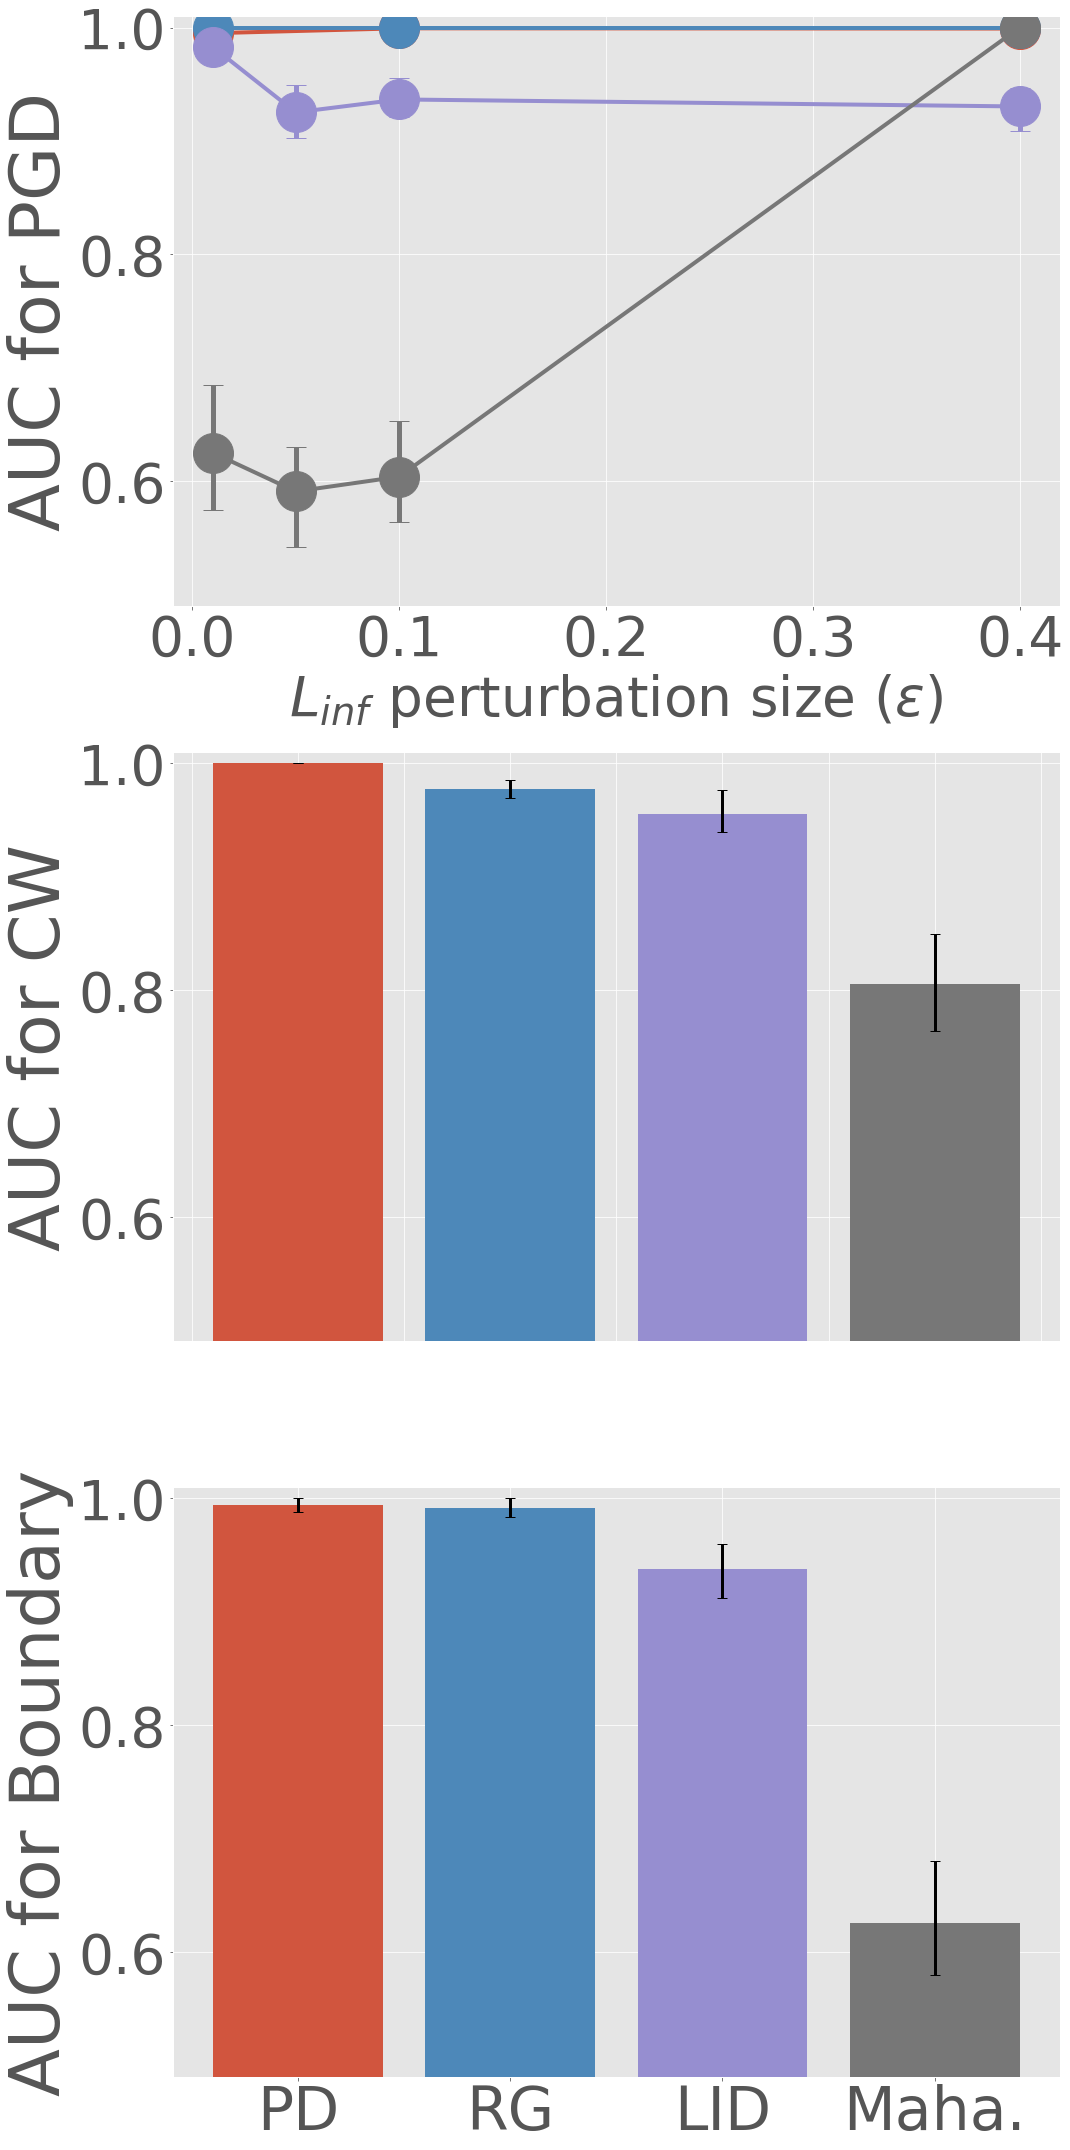

In [66]:
# MNIST LeNet
## UNSUPERVISED
    # Persistence Diagram
        # PGD
mnist_pd_pgd_eps = [0.01, 0.1, 0.4]
mnist_pd_pgd_do = [0.972, 0.9756, 0.9725]
mnist_pd_pgd_val = [0.984, 0.984, 0.984]
mnist_pd_pgd_up = [0.9926, 0.9934, 0.9942]
        # CW
mnist_pd_cw_eps = [1]
mnist_pd_cw_do = [0.9758]
mnist_pd_cw_val = [0.984]
mnist_pd_cw_up = [0.9908]
        # Boundary
mnist_pd_bnd_eps = [1]
mnist_pd_bnd_do = [0.9663]
mnist_pd_bnd_val = [0.9785]
mnist_pd_bnd_up = [0.9879]



    # Raw Graph
        # PGD
mnist_rg_pgd_eps = [0.01, 0.1, 0.4]
mnist_rg_pgd_do = [0.9652, 0.9983, 1.0]
mnist_rg_pgd_val = [0.9771, 0.9992, 1.0]
mnist_rg_pgd_up = [0.9877, 1.0, 1.0]
        # CW
mnist_rg_cw_eps = [1]
mnist_rg_cw_do = [0.6286]
mnist_rg_cw_val = [0.6717]
mnist_rg_cw_up = [0.7140]
        # Boundary
mnist_rg_bnd_eps = [1]
mnist_rg_bnd_do = [0.9823]
mnist_rg_bnd_val = [0.9911]
mnist_rg_bnd_up = [0.9989]



    # LID
        # PGD
mnist_lid_pgd_eps = [0.01, 0.05, 0.1, 0.4]
mnist_lid_pgd_do = [0.9636, 0.8455, 0.8267, 0.9049]
mnist_lid_pgd_val = [0.9736, 0.8688, 0.8615, 0.9242]
mnist_lid_pgd_up = [0.9877, 0.9009, 0.8898, 0.9422]
        # CW
mnist_lid_cw_eps = [1]
mnist_lid_cw_do = [0.8821]
mnist_lid_cw_val = [0.9045]
mnist_lid_cw_up = [0.9322]
        # Boundary
mnist_lid_bnd_eps = [1]
mnist_lid_bnd_do = [0.8220]
mnist_lid_bnd_val = [0.8521]
mnist_lid_bnd_up = [0.8967]


    # Mahalanobis
        # PGD
mnist_maha_pgd_eps = [0.01, 0.05, 0.1, 0.4]
mnist_maha_pgd_do = [0.557, 0.489, 0.482, 1.0]
mnist_maha_pgd_val = [0.613, 0.529, 0.531, 1.0]
mnist_maha_pgd_up = [0.694, 0.578, 0.575, 1.0]
        # CW
mnist_maha_cw_eps = [1]
mnist_maha_cw_do = [0.5]
mnist_maha_cw_val = [0.5]
mnist_maha_cw_up = [0.5]
        # Boundary
mnist_maha_bnd_eps = [1]
mnist_maha_bnd_do = [0.557]
mnist_maha_bnd_val = [0.604]
mnist_maha_bnd_up = [0.647]



## SUPERVISED
    # Persistence Diagram
        # PGD
mnist_pd_pgd_eps = [0.01, 0.1, 0.4]
mnist_pd_pgd_do = [0.9912, 0.9988, 0.9984]
mnist_pd_pgd_val = [0.9950, 0.9993, 0.9991]
mnist_pd_pgd_up = [0.9982, 0.9999, 0.9996]
        # CW
mnist_pd_cw_eps = [1]
mnist_pd_cw_do = [0.9996]
mnist_pd_cw_val = [0.9998]
mnist_pd_cw_up = [0.9999]
        # Boundary
mnist_pd_bnd_eps = [1]
mnist_pd_bnd_do = [0.9880]
mnist_pd_bnd_val = [0.9938]
mnist_pd_bnd_up = [0.9999]



    # Raw Graph
        # PGD
mnist_rg_pgd_eps = [0.01, 0.1, 0.4]
mnist_rg_pgd_do = [1.0, 1.0, 1.0]
mnist_rg_pgd_val = [1.0, 1.0, 1.0]
mnist_rg_pgd_up = [1.0, 1.0, 1.0]
        # CW
mnist_rg_cw_eps = [1]
mnist_rg_cw_do = [0.9693]
mnist_rg_cw_val = [0.9773]
mnist_rg_cw_up = [0.9851]
        # Boundary
mnist_rg_bnd_eps = [1]
mnist_rg_bnd_do = [0.9833]
mnist_rg_bnd_val = [0.9916]
mnist_rg_bnd_up = [1]



    # LID
        # PGD
mnist_lid_pgd_eps = [0.01, 0.05, 0.1, 0.4]
mnist_lid_pgd_do = [0.9734, 0.9027, 0.9210, 0.9092]
mnist_lid_pgd_val = [0.9828, 0.9252, 0.9366, 0.9304]
mnist_lid_pgd_up = [0.9943, 0.9494, 0.9558, 0.9467]
        # CW
mnist_lid_cw_eps = [1]
mnist_lid_cw_do = [0.9389]
mnist_lid_cw_val = [0.9553]
mnist_lid_cw_up = [0.9760]
        # Boundary
mnist_lid_bnd_eps = [1]
mnist_lid_bnd_do = [0.9122]
mnist_lid_bnd_val = [0.9376]
mnist_lid_bnd_up = [0.9593]


    # Mahalanobis
        # PGD
mnist_maha_pgd_eps = [0.01, 0.05, 0.1, 0.4]
mnist_maha_pgd_do = [0.575, 0.542, 0.564, 1]
mnist_maha_pgd_val = [0.625, 0.591, 0.604, 1]
mnist_maha_pgd_up = [0.685, 0.630, 0.653, 1]
        # CW
mnist_maha_cw_eps = [1]
mnist_maha_cw_do = [0.764]
mnist_maha_cw_val = [0.805]
mnist_maha_cw_up = [0.849]
        # Boundary
mnist_maha_bnd_eps = [1]
mnist_maha_bnd_do = [0.58]
mnist_maha_bnd_val = [0.626]
mnist_maha_bnd_up = [0.68]



# Plot !
mnist_dict = create_dict("mnist", m1="pd", m2="rg", m3="lid", m4="maha")
axs = plot_all_attacks(mnist_dict, ylabel_=True)
plt.savefig("/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/plots_for_paper/mnist_lenet_wbattack_sup.png", dpi=200)
plt.show()

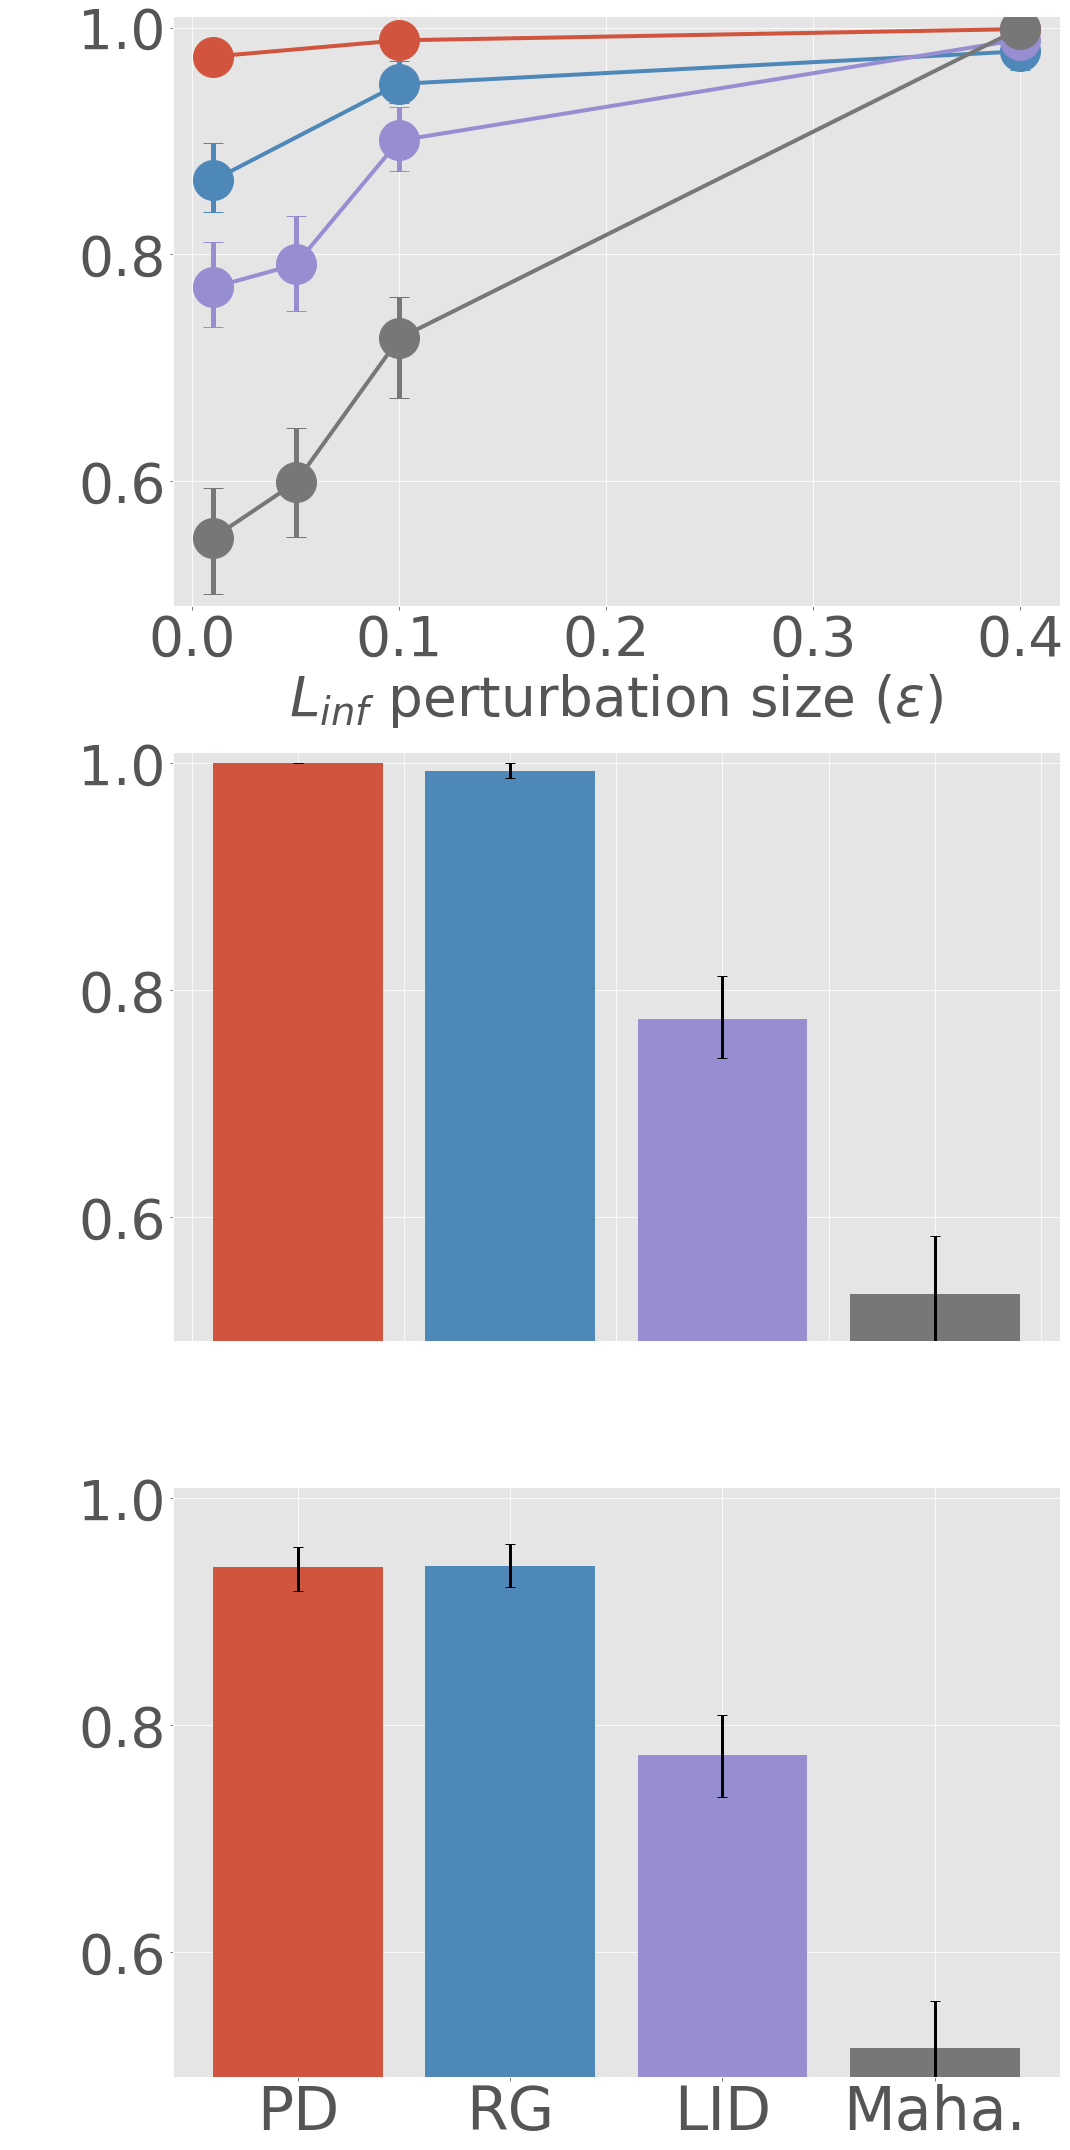

In [67]:
# Fashion MNIST LeNet
## UNSUPERVISED
    # Persistence Diagram
        # PGD
fashionmnist_pd_pgd_eps = [0.01, 0.1, 0.4]
fashionmnist_pd_pgd_do = [0.9856, 0.9928, 0.9926]
fashionmnist_pd_pgd_val = [0.9908, 0.9960, 0.9960]
fashionmnist_pd_pgd_up = [0.9970, 0.9998, 1.0]
        # CW
fashionmnist_pd_cw_eps = [1]
fashionmnist_pd_cw_do = [0.996]
fashionmnist_pd_cw_val = [0.998]
fashionmnist_pd_cw_up = [1.0]
        # Boundary
fashionmnist_pd_bnd_eps = [1]
fashionmnist_pd_bnd_do = [0.9179]
fashionmnist_pd_bnd_val = [0.9388]
fashionmnist_pd_bnd_up = [0.9596]



    # Raw Graph
        # PGD
fashionmnist_rg_pgd_eps = [0.01, 0.1, 0.4]
fashionmnist_rg_pgd_do = [0.5375, 0.8316, 0.9254]
fashionmnist_rg_pgd_val = [0.5739, 0.8649, 0.9487]
fashionmnist_rg_pgd_up = [0.6149, 0.8891, 0.9724]
        # CW
fashionmnist_rg_cw_eps = [1]
fashionmnist_rg_cw_do = [0.7566]
fashionmnist_rg_cw_val = [0.7877]
fashionmnist_rg_cw_up = [0.8231]
        # Boundary
fashionmnist_rg_bnd_eps = [1]
fashionmnist_rg_bnd_do = [0.7051]
fashionmnist_rg_bnd_val = [0.7506]
fashionmnist_rg_bnd_up = [0.7880]



    # LID
        # PGD
fashionmnist_lid_pgd_eps = [0.01, 0.05, 0.1, 0.4]
fashionmnist_lid_pgd_do = [0.6801, 0.6983, 0.7770, 0.9592]
fashionmnist_lid_pgd_val = [0.7178, 0.7400, 0.8129, 0.9713]
fashionmnist_lid_pgd_up = [0.7576, 0.7761, 0.8477, 0.9877]
        # CW
fashionmnist_lid_cw_eps = [1]
fashionmnist_lid_cw_do = [0.6724]
fashionmnist_lid_cw_val = [0.7124]
fashionmnist_lid_cw_up = [0.7471]
        # Boundary
fashionmnist_lid_bnd_eps = [1]
fashionmnist_lid_bnd_do = [0.6657]
fashionmnist_lid_bnd_val = [0.7042]
fashionmnist_lid_bnd_up = [0.7433]


    # Mahalanobis
        # PGD
fashionmnist_maha_pgd_eps = [0.01, 0.05, 0.1, 0.4]
fashionmnist_maha_pgd_do = [0.5, 0.5, 0.527, 0.994]
fashionmnist_maha_pgd_val = [0.5, 0.5, 0.576, 0.997]
fashionmnist_maha_pgd_up = [0.5, 0.5, 0.625, 1.0]
        # CW
fashionmnist_maha_cw_eps = [1]
fashionmnist_maha_cw_do = [0.5]
fashionmnist_maha_cw_val = [0.5]
fashionmnist_maha_cw_up = [0.5]
        # Boundary
fashionmnist_maha_bnd_eps = [1]
fashionmnist_maha_bnd_do = [0.5]
fashionmnist_maha_bnd_val = [0.5]
fashionmnist_maha_bnd_up = [0.5]



## SUPERVISED
    # Persistence Diagram
        # PGD
fashionmnist_pd_pgd_eps = [0.01, 0.1, 0.4]
fashionmnist_pd_pgd_do = [0.9639, 0.9803, 0.9972]
fashionmnist_pd_pgd_val = [0.9744, 0.9887, 0.9986]
fashionmnist_pd_pgd_up = [0.9868, 0.9987, 0.9999]
        # CW
fashionmnist_pd_cw_eps = [1]
fashionmnist_pd_cw_do = [0.9999]
fashionmnist_pd_cw_val = [0.9999]
fashionmnist_pd_cw_up = [1.0]
        # Boundary
fashionmnist_pd_bnd_eps = [1]
fashionmnist_pd_bnd_do = [0.9183]
fashionmnist_pd_bnd_val = [0.9391]
fashionmnist_pd_bnd_up = [0.9575]



    # Raw Graph
        # PGD
fashionmnist_rg_pgd_eps = [0.01, 0.1, 0.4]
fashionmnist_rg_pgd_do = [0.8374, 0.9335, 0.9628]
fashionmnist_rg_pgd_val = [0.8652, 0.9503, 0.9790]
fashionmnist_rg_pgd_up = [0.8986, 0.9707, 0.9928]
        # CW
fashionmnist_rg_cw_eps = [1]
fashionmnist_rg_cw_do = [0.9863]
fashionmnist_rg_cw_val = [0.9932]
fashionmnist_rg_cw_up = [0.9998]
        # Boundary
fashionmnist_rg_bnd_eps = [1]
fashionmnist_rg_bnd_do = [0.9216]
fashionmnist_rg_bnd_val = [0.9404]
fashionmnist_rg_bnd_up = [0.9601]



    # LID
        # PGD
fashionmnist_lid_pgd_eps = [0.01, 0.05, 0.1, 0.4]
fashionmnist_lid_pgd_do = [0.7362, 0.7505, 0.8739, 0.9837]
fashionmnist_lid_pgd_val = [0.7709, 0.7911, 0.9004, 0.9893]
fashionmnist_lid_pgd_up = [0.8111, 0.8334, 0.9298, 0.9958]
        # CW
fashionmnist_lid_cw_eps = [1]
fashionmnist_lid_cw_do = [0.7400]
fashionmnist_lid_cw_val = [0.7742]
fashionmnist_lid_cw_up = [0.8121]
        # Boundary
fashionmnist_lid_bnd_eps = [1]
fashionmnist_lid_bnd_do = [0.7370]
fashionmnist_lid_bnd_val = [0.7735]
fashionmnist_lid_bnd_up = [0.8087]


    # Mahalanobis
        # PGD
fashionmnist_maha_pgd_eps = [0.01, 0.05, 0.1, 0.4]
fashionmnist_maha_pgd_do = [0.501, 0.551, 0.673, 0.997]
fashionmnist_maha_pgd_val = [0.55, 0.599, 0.726, 0.999]
fashionmnist_maha_pgd_up = [0.594, 0.647, 0.762, 1]
        # CW
fashionmnist_maha_cw_eps = [1]
fashionmnist_maha_cw_do = [0.481]
fashionmnist_maha_cw_val = [0.532]
fashionmnist_maha_cw_up = [0.583]
        # Boundary
fashionmnist_maha_bnd_eps = [1]
fashionmnist_maha_bnd_do = [0.461]
fashionmnist_maha_bnd_val = [0.515]
fashionmnist_maha_bnd_up = [0.557]



# Plot !
fashionmnist_dict = create_dict("fashionmnist", m1="pd", m2="rg", m3="lid", m4="maha")
axs = plot_all_attacks(fashionmnist_dict)
plt.savefig("/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/plots_for_paper/fashionmnist_lenet_wbattack_sup.png", dpi=200)
plt.show()

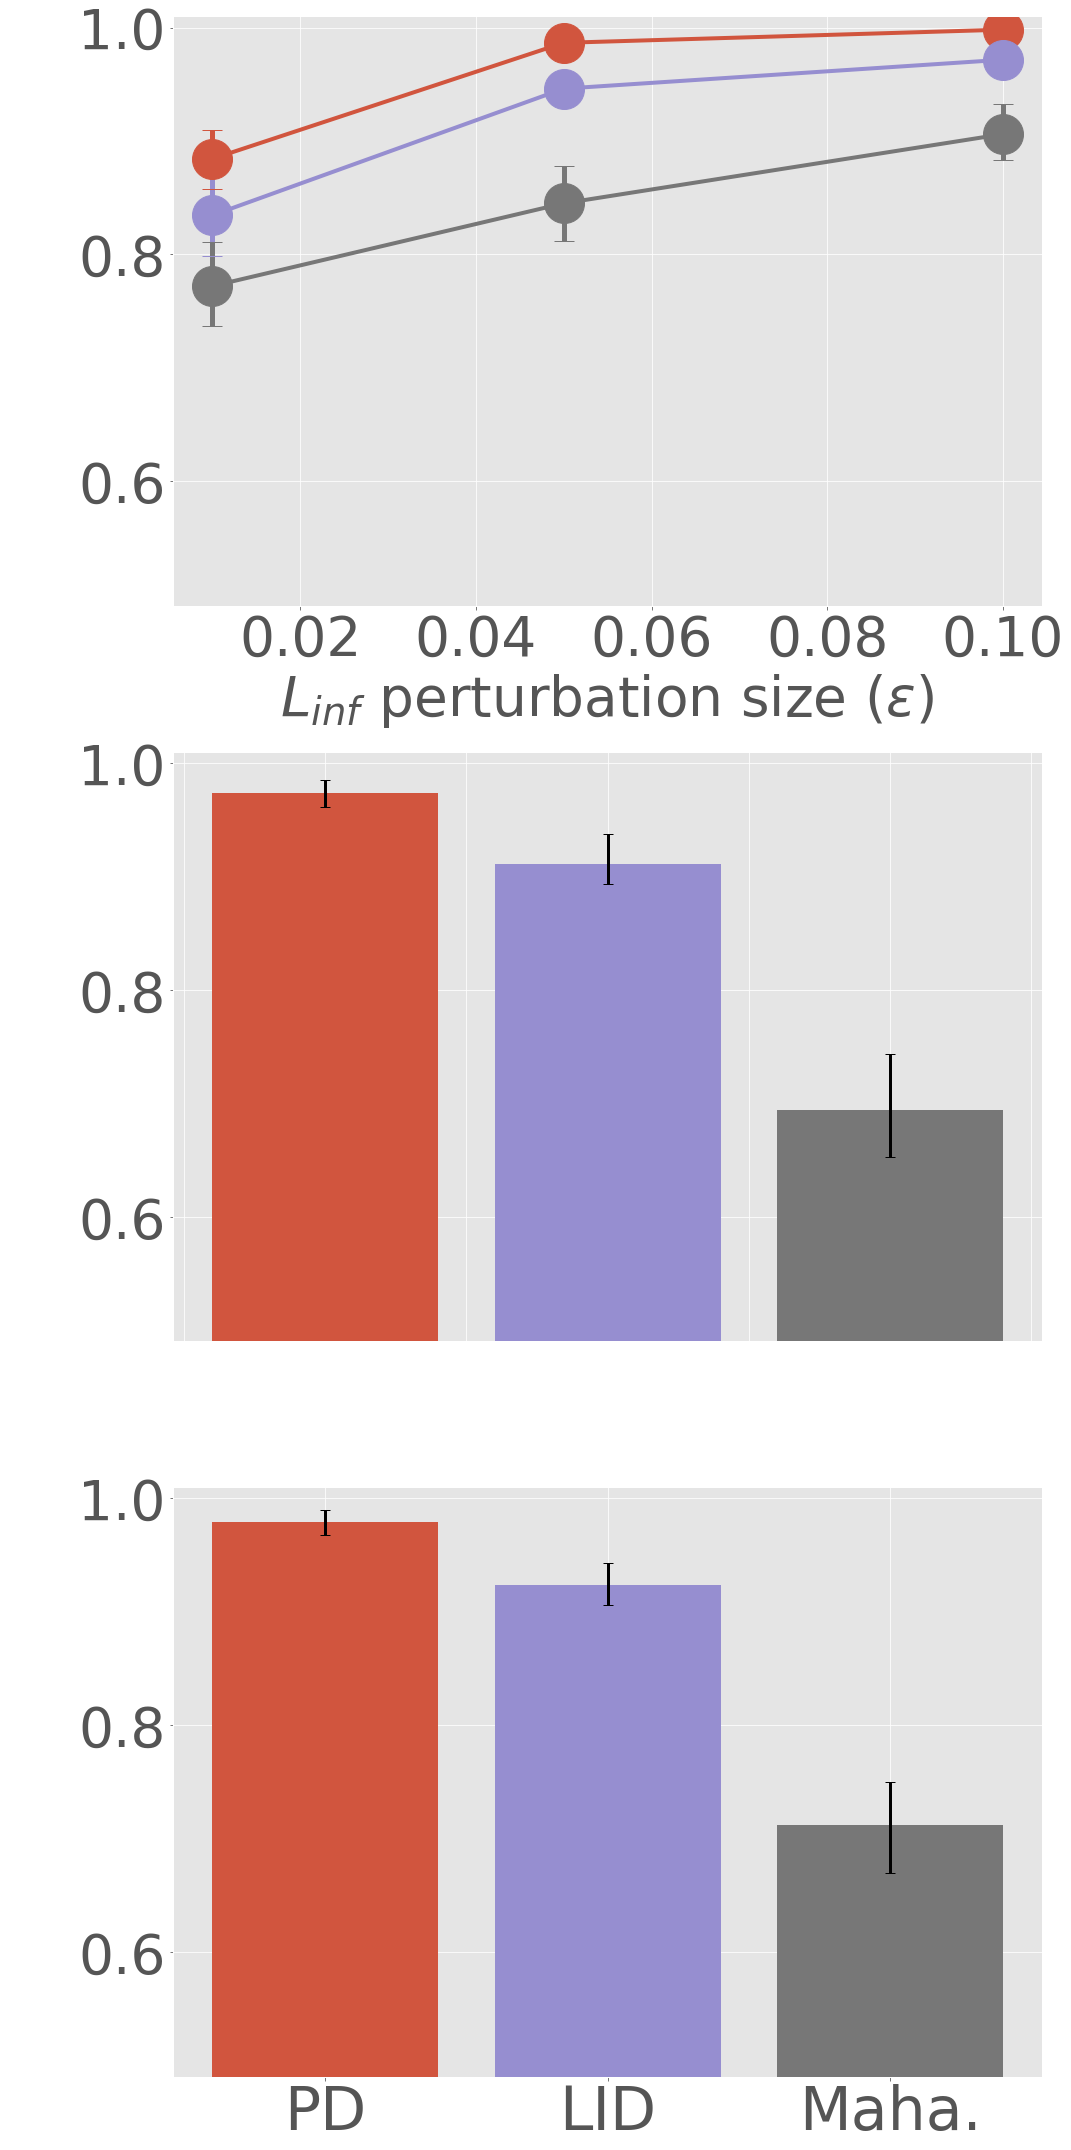

In [49]:
# SVHN ResNet
## UNSUPERVISED
    # Persistence Diagram
        # PGD
svhn_pd_pgd_eps = [0.01, 0.05, 0.1]
svhn_pd_pgd_do = [0.8508, 0.9658, 0.9886]
svhn_pd_pgd_val = [0.8732, 0.9759, 0.9932]
svhn_pd_pgd_up = [0.9019, 0.9862, 0.9982]
        # CW
svhn_pd_cw_eps = [1]
svhn_pd_cw_do = [0.8984]
svhn_pd_cw_val = [0.9215]
svhn_pd_cw_up = [0.9452]
        # Boundary
svhn_pd_bnd_eps = [1]
svhn_pd_bnd_do = [0.8928]
svhn_pd_bnd_val = [0.9176]
svhn_pd_bnd_up = [0.9409]



    # LID
        # PGD
svhn_lid_pgd_eps = [0.01, 0.05, 0.1, 0.4]
svhn_lid_pgd_do = [0.7436, 0.8728, 0.9209, 0.9851]
svhn_lid_pgd_val = [0.7761, 0.8975, 0.9395, 0.9901]
svhn_lid_pgd_up = [0.8165, 0.9191, 0.9539, 0.9954]
        # CW
svhn_lid_cw_eps = [1]
svhn_lid_cw_do = [0.8112]
svhn_lid_cw_val = [0.8422]
svhn_lid_cw_up = [0.8728]
        # Boundary
svhn_lid_bnd_eps = [1]
svhn_lid_bnd_do = [0.8182]
svhn_lid_bnd_val = [0.8521]
svhn_lid_bnd_up = [0.8836]


    # Mahalanobis
        # PGD
svhn_maha_pgd_eps = [0.01, 0.05, 0.1, 0.4]
svhn_maha_pgd_do = [0.664, 0.739, 0.813, 0.955]
svhn_maha_pgd_val = [0.712, 0.775, 0.842, 0.967]
svhn_maha_pgd_up = [0.748, 0.819, 0.873, 0.981]
        # CW
svhn_maha_cw_eps = [1]
svhn_maha_cw_do = [0.601]
svhn_maha_cw_val = [0.649]
svhn_maha_cw_up = [0.696]
        # Boundary
svhn_maha_bnd_eps = [1]
svhn_maha_bnd_do = [0.604]
svhn_maha_bnd_val = [0.651]
svhn_maha_bnd_up = [0.691]


## SUPERVISED
    # Persistence Diagram
        # PGD
svhn_pd_pgd_eps = [0.01, 0.05, 0.1]
svhn_pd_pgd_do = [0.8580, 0.9798, 0.9962]
svhn_pd_pgd_val = [0.8842, 0.9865, 0.9981]
svhn_pd_pgd_up = [0.9100, 0.9956, 1]
        # CW
svhn_pd_cw_eps = [1]
svhn_pd_cw_do = [0.9612]
svhn_pd_cw_val = [0.9738]
svhn_pd_cw_up = [0.9850]
        # Boundary
svhn_pd_bnd_eps = [1]
svhn_pd_bnd_do = [0.9681]
svhn_pd_bnd_val = [0.9792]
svhn_pd_bnd_up = [0.9895]



    # LID
        # PGD
svhn_lid_pgd_eps = [0.01, 0.05, 0.1, 0.4]
svhn_lid_pgd_do = [0.7984, 0.9319, 0.9618, 0.9951]
svhn_lid_pgd_val = [0.8344, 0.9461, 0.9716, 0.997]
svhn_lid_pgd_up = [0.8698, 0.9610, 0.9826, 0.9992]
        # CW
svhn_lid_cw_eps = [1]
svhn_lid_cw_do = [0.8929]
svhn_lid_cw_val = [0.9113]
svhn_lid_cw_up = [0.9375]
        # Boundary
svhn_lid_bnd_eps = [1]
svhn_lid_bnd_do = [0.9060]
svhn_lid_bnd_val = [0.9234]
svhn_lid_bnd_up = [0.9431]


    # Mahalanobis
        # PGD
svhn_maha_pgd_eps = [0.01, 0.05, 0.1, 0.4]
svhn_maha_pgd_do = [0.737, 0.812, 0.883, 0.964]
svhn_maha_pgd_val = [0.772, 0.845, 0.906, 0.976]
svhn_maha_pgd_up = [0.811, 0.878, 0.933, 0.987]
        # CW
svhn_maha_cw_eps = [1]
svhn_maha_cw_do = [0.653]
svhn_maha_cw_val = [0.694]
svhn_maha_cw_up = [0.743]
        # Boundary
svhn_maha_bnd_eps = [1]
svhn_maha_bnd_do = [0.67]
svhn_maha_bnd_val = [0.712]
svhn_maha_bnd_up = [0.75]


# Plot !
svhn_dict = create_dict("svhn", m1="pd", m2="lid", m3="maha")
axs = plot_all_attacks(svhn_dict)
plt.savefig("/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/plots_for_paper/svhn_resnet_wbattack_sup.png", dpi=200)
plt.show()

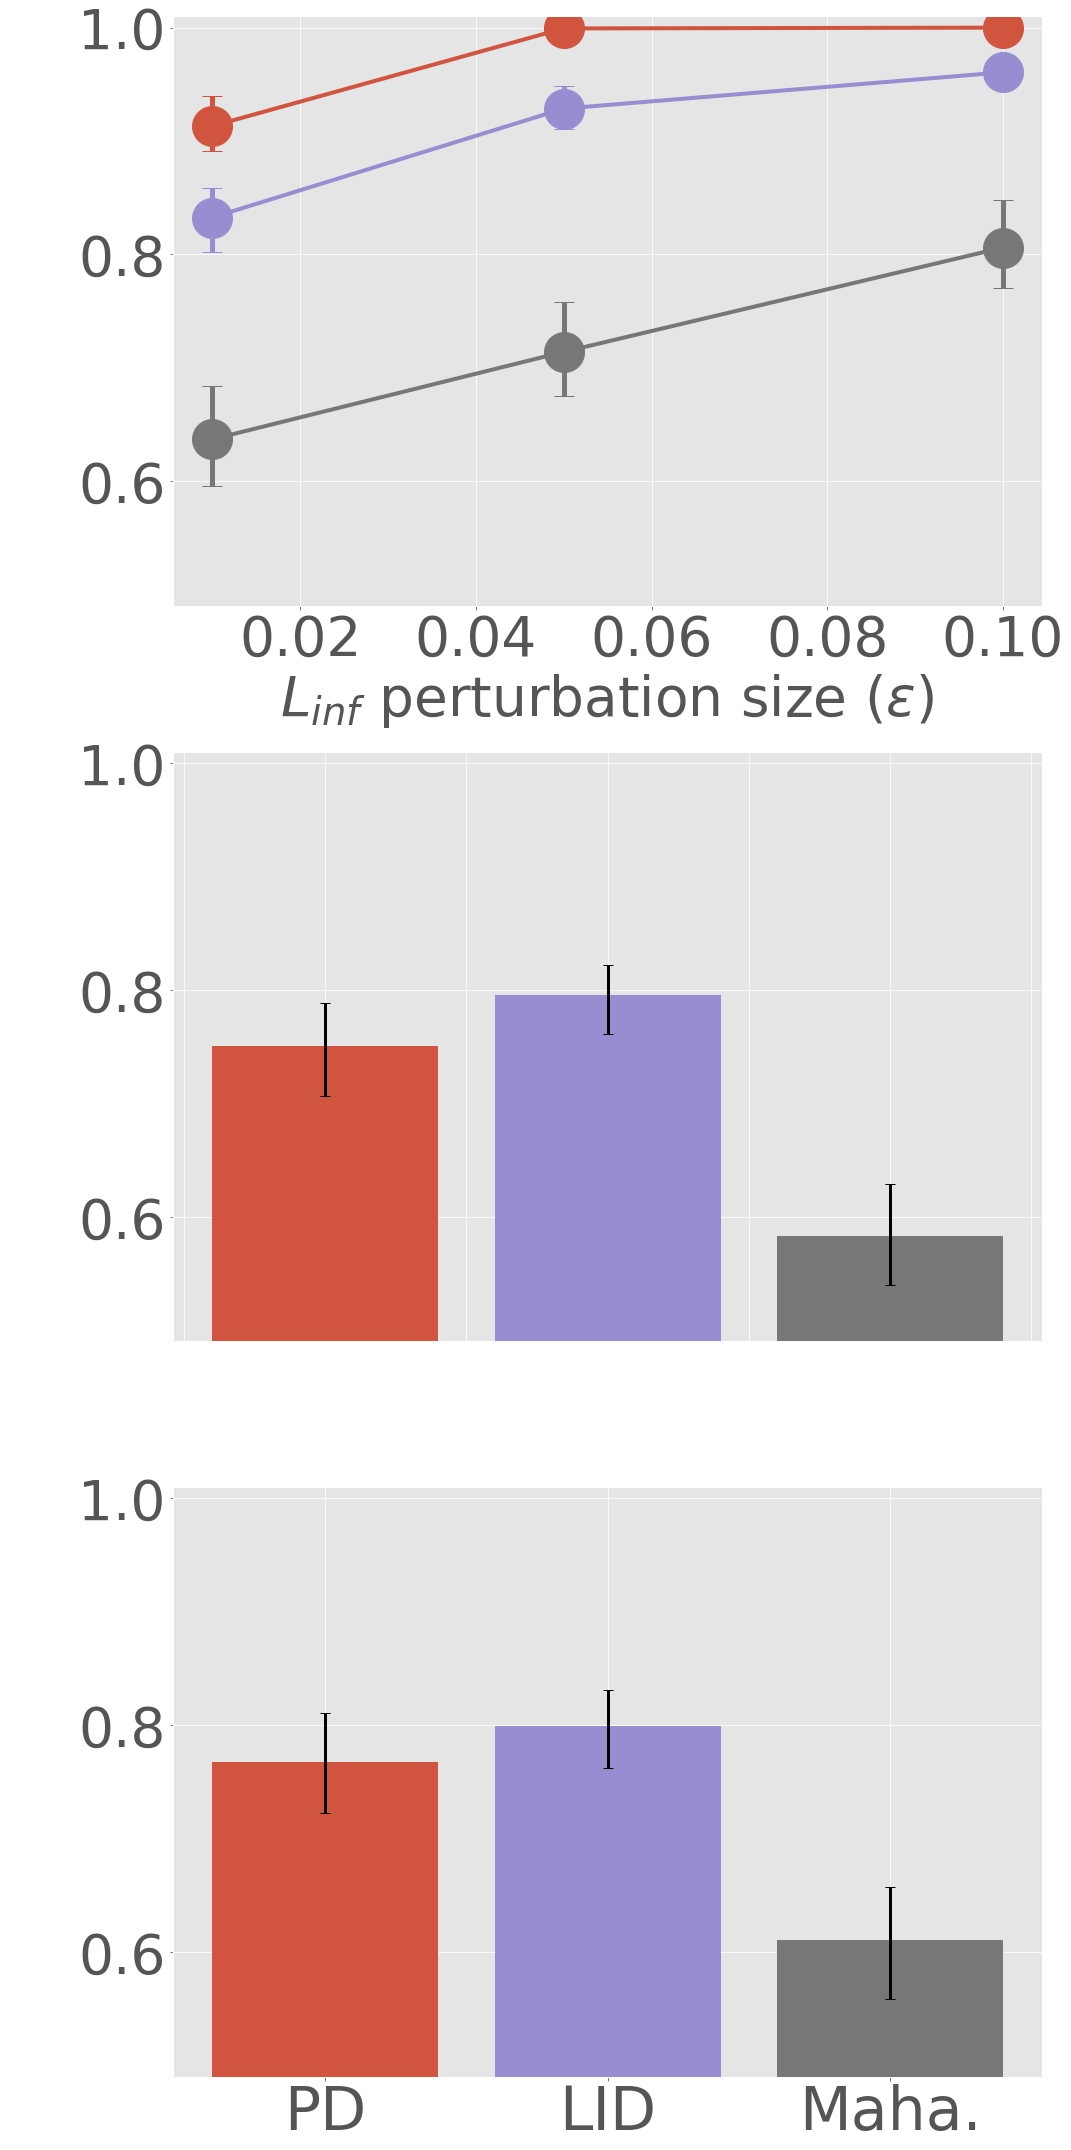

In [69]:
# CIFAR ResNet
## UNSUPERVISED
    # Persistence Diagram
        # PGD
cifar_pd_pgd_eps = [0.01, 0.05, 0.1]
cifar_pd_pgd_do = [0.8911, 0.9983, 0.9997]
cifar_pd_pgd_val = [0.9131, 0.9992, 0.9999]
cifar_pd_pgd_up = [0.9396, 0.9999, 1.0]
        # CW
cifar_pd_cw_eps = [1]
cifar_pd_cw_do = [0.7062]
cifar_pd_cw_val = [0.7501]
cifar_pd_cw_up = [0.7887]
        # Boundary
cifar_pd_bnd_eps = [1]
cifar_pd_bnd_do = [0.7224]
cifar_pd_bnd_val = [0.7675]
cifar_pd_bnd_up = [0.8107]



    # LID
        # PGD
cifar_lid_pgd_eps = [0.01, 0.05, 0.1, 0.4]
cifar_lid_pgd_do = [0.8024, 0.9101, 0.9480, 0.9988]
cifar_lid_pgd_val = [0.8325, 0.9285, 0.9605, 0.9994]
cifar_lid_pgd_up = [0.8585, 0.9482, 0.9746, 1.0]
        # CW
cifar_lid_cw_eps = [1]
cifar_lid_cw_do = [0.7612]
cifar_lid_cw_val = [0.7955]
cifar_lid_cw_up = [0.8221]
        # Boundary
cifar_lid_bnd_eps = [1]
cifar_lid_bnd_do = [0.7626]
cifar_lid_bnd_val = [0.7991]
cifar_lid_bnd_up = [0.8311]


    # Mahalanobis
        # PGD
cifar_maha_pgd_eps = [0.01, 0.05, 0.1, 0.4]
cifar_maha_pgd_do = [0.596, 0.675, 0.770, 0.947]
cifar_maha_pgd_val = [0.637, 0.714, 0.806, 0.96]
cifar_maha_pgd_up = [0.684, 0.758, 0.848, 0.978]
        # CW
cifar_maha_cw_eps = [1]
cifar_maha_cw_do = [0.54]
cifar_maha_cw_val = [0.583]
cifar_maha_cw_up = [0.629]
        # Boundary
cifar_maha_bnd_eps = [1]
cifar_maha_bnd_do = [0.559]
cifar_maha_bnd_val = [0.611]
cifar_maha_bnd_up = [0.657]


## SUPERVISED
    # Persistence Diagram
        # PGD
#cifar_pd_pgd_eps = [0.01, 0.05, 0.1]
#cifar_pd_pgd_do = [0.9101, 0.9980, 1]
#cifar_pd_pgd_val = [0.9293, 0.9989, 1]
#cifar_pd_pgd_up = [0.9523, 1, 1]
        # CW
#cifar_pd_cw_eps = [1]
#cifar_pd_cw_do = [0.8823]
#cifar_pd_cw_val = [0.9065]
#cifar_pd_cw_up = [0.9314]
        # Boundary
#cifar_pd_bnd_eps = [1]
#cifar_pd_bnd_do = [0.9112]
#cifar_pd_bnd_val = [0.9311]
#cifar_pd_bnd_up = [0.9551]



    # LID
        # PGD
#cifar_lid_pgd_eps = [0.01, 0.05, 0.1, 0.4]
#cifar_lid_pgd_do = [0.8294, 0.9459, 0.9749, 1]
#cifar_lid_pgd_val = [0.8633, 0.9594, 0.9825, 1]
#cifar_lid_pgd_up = [0.8924, 0.9726, 0.9914, 1]
        # CW
#cifar_lid_cw_eps = [1]
#cifar_lid_cw_do = [0.8161]
#cifar_lid_cw_val = [0.8417]
#cifar_lid_cw_up = [0.8820]
        # Boundary
#cifar_lid_bnd_eps = [1]
#cifar_lid_bnd_do = [0.8251]
#cifar_lid_bnd_val = [0.8520]
#cifar_lid_bnd_up = [0.8933]


    # Mahalanobis
        # PGD
#cifar_maha_pgd_eps = [0.01, 0.05, 0.1, 0.4]
#cifar_maha_pgd_do = [0.615, 0.692, 0.810, 0.962]
#cifar_maha_pgd_val = [0.659, 0.728, 0.837, 0.974]
#cifar_maha_pgd_up = [0.701, 0.771, 0.866, 0.990]
        # CW
#cifar_maha_cw_eps = [1]
#cifar_maha_cw_do = [0.552]
#cifar_maha_cw_val = [0.602]
#cifar_maha_cw_up = [0.646]
        # Boundary
#cifar_maha_bnd_eps = [1]
#cifar_maha_bnd_do = [0.601]
#cifar_maha_bnd_val = [0.644]
#cifar_maha_bnd_up = [0.685]



# Plot !
cifar_dict = create_dict("cifar", m1="pd", m2="lid", m3="maha")
axs = plot_all_attacks(cifar_dict)
plt.savefig("/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/plots_for_paper/cifar_resnet_wbattack.png", dpi=200)
plt.show()

# Transfered attacks (21/11/20)

In [87]:
#db_path = '/Users/m.goibert/sshfs2/r3d3.db'
db_path = '/Users/m.goibert/sshfs2/TDA_for_adv_robustness/r3d3.db'
#db_path = '/Users/m.goibert/Downloads/r3d3.db'
#db_path = '/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/TDA_for_adv_robustness/r3d3.db'
my_db = ExperimentDB(db_path)

In [88]:
my_db.list_all_experiments()

,experiment_id,run_id,date,config,metrics,owner
0,1605442080,0,2020-11-15T12:08:00.310274,"{""first_pruned_iter"": 100, ""tot_prune_percenti...",,m.goibert
1,1605442537,0,2020-11-15T12:15:37.657935,"{""first_pruned_iter"": 100, ""tot_prune_percenti...",,m.goibert
2,1605948372,0,2020-11-21T08:46:12.499920,"{""archi_trsf_attack"": ""None"", ""transfered_atta...",,m.goibert
3,1605948372,1,2020-11-21T08:46:12.631000,"{""archi_trsf_attack"": ""None"", ""transfered_atta...",,m.goibert
4,1605948372,2,2020-11-21T08:46:12.655785,"{""archi_trsf_attack"": ""None"", ""transfered_atta...",,m.goibert
...,...,...,...,...,...,...
171,1606143698,3,2020-11-23T15:01:38.199296,"{""archi_trsf_attack"": ""None"", ""transfered_atta...",,m.goibert
172,1606143698,4,2020-11-23T15:01:38.205297,"{""archi_trsf_attack"": ""None"", ""transfered_atta...",,m.goibert
173,1606143698,5,2020-11-23T15:01:38.211618,"{""archi_trsf_attack"": ""None"", ""transfered_atta...",,m.goibert
174,1606144070,0,2020-11-23T15:07:50.015018,"{""archi_trsf_attack"": ""None"", ""transfered_atta...","{""name"": ""Mahalanobis"", ""time"": 324.4740290641...",m.goibert


In [91]:
# Exp Persistend dgm (MNIST/Fashion MNIST vs PGD, CW, Boundary) --> 1605962826
# Exp Raw Graph --> 1605971647
# Exp LID --> 1606127863
# Exp Mahalanobis --> 1606142003\1606143698
exp = 1606144070
df = my_db.show_experiment(exp)
df
df["unsupervised_metrics"][1]

Common configuration {'binary': '/mnt/nfs/home/m.goibert/TDA_for_adv_robustness/tda/../tda/experiments/mahalanobis/mahalanobis_binary_v2.py', 'selected_layers': 'all', 'attack_backend': 'FOOLBOX', 'archi_trsf_attack': 'None', 'successful_adv': 1, 'noise': 0.0, 'attack_type': 'PGD', 'preproc_epsilon': 0.01, 'number_of_samples_for_mu_sigma': 500, 'dataset_size': 500, 'covariance_method': 'NAIVE_SVD', 'all_epsilons': '0.01;0.05;0.1;0.4', 'transfered_attacks': True}


{'0.01': {'auc': {'upper_bound': 0.5495449736071061,
   'value': 0.5085967741935484,
   'lower_bound': 0.46654818490947525}},
 '0.05': {'auc': {'upper_bound': 0.6142540815275749,
   'value': 0.567272,
   'lower_bound': 0.51979303903709}},
 '0.1': {'auc': {'upper_bound': 0.882400800106859,
   'value': 0.85008,
   'lower_bound': 0.8186863427437423}},
 '0.4': {'auc': {'upper_bound': 1.0000321124412312,
   'value': 0.9999840000000001,
   'lower_bound': 0.9999680000000002}}}

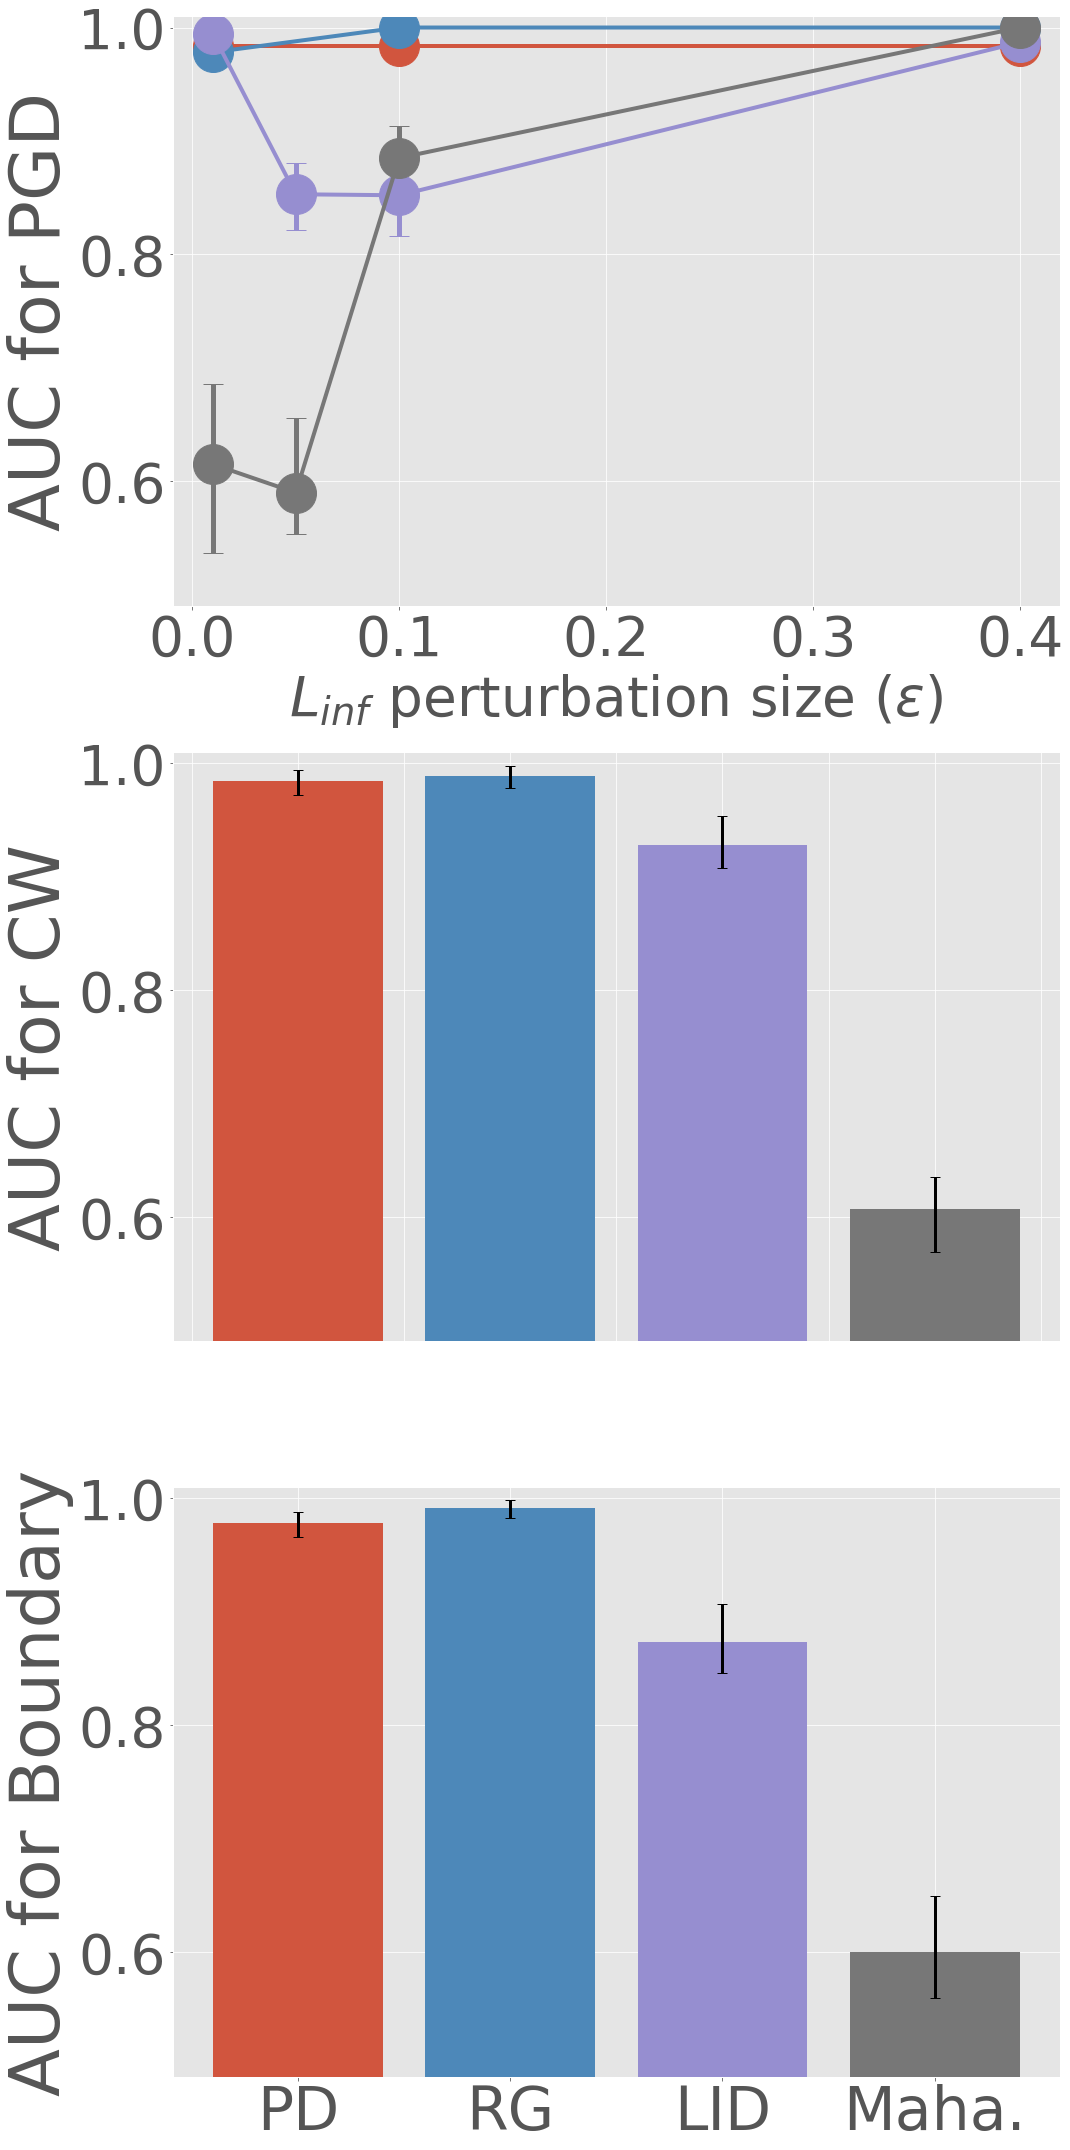

In [97]:
# Plot MNIST
# MNIST LeNet

    # Persistence Diagram
        # PGD
mnist_pd_pgd_eps = [0.01, 0.1, 0.4]
mnist_pd_pgd_do = [0.9755, 0.9723, 0.9753]
mnist_pd_pgd_val = [0.984, 0.984, 0.984]
mnist_pd_pgd_up = [0.9931, 0.9930, 0.9972]
        # CW
mnist_pd_cw_eps = [1]
mnist_pd_cw_do = [0.9721]
mnist_pd_cw_val = [0.984]
mnist_pd_cw_up = [0.9936]
        # Boundary
mnist_pd_bnd_eps = [1]
mnist_pd_bnd_do = [0.9663]
mnist_pd_bnd_val = [0.9785]
mnist_pd_bnd_up = [0.9879]



    # Raw Graph
        # PGD
mnist_rg_pgd_eps = [0.01, 0.1, 0.4]
mnist_rg_pgd_do = [0.9681, 0.9999, 1]
mnist_rg_pgd_val = [0.9782, 1, 1]
mnist_rg_pgd_up = [0.9902, 1, 1]
        # CW
mnist_rg_cw_eps = [1]
mnist_rg_cw_do = [0.9777]
mnist_rg_cw_val = [0.9888]
mnist_rg_cw_up = [0.9975]
        # Boundary
mnist_rg_bnd_eps = [1]
mnist_rg_bnd_do = [0.9826]
mnist_rg_bnd_val = [0.9913]
mnist_rg_bnd_up = [0.9985]



    # LID
        # PGD
mnist_lid_pgd_eps = [0.01, 0.05, 0.1, 0.4]
mnist_lid_pgd_do = [0.9902, 0.8211, 0.8162, 0.9812]
mnist_lid_pgd_val = [0.9941, 0.8530, 0.8521, 0.9869]
mnist_lid_pgd_up = [1, 0.8802, 0.8865, 0.9932]
        # CW
mnist_lid_cw_eps = [1]
mnist_lid_cw_do = [0.907]
mnist_lid_cw_val = [0.928]
mnist_lid_cw_up = [0.9529]
        # Boundary
mnist_lid_bnd_eps = [1]
mnist_lid_bnd_do = [0.8456]
mnist_lid_bnd_val = [0.8735]
mnist_lid_bnd_up =[0.9067]


    # Mahalanobis
        # PGD
mnist_maha_pgd_eps = [0.01, 0.05, 0.1, 0.4]
mnist_maha_pgd_do = [0.5369, 0.5531, 0.8568, 1]
mnist_maha_pgd_val = [0.6149, 0.5899, 0.8850, 1]
mnist_maha_pgd_up = [0.686, 0.6556, 0.9132, 1]
        # CW
mnist_maha_cw_eps = [1]
mnist_maha_cw_do = [0.5692]
mnist_maha_cw_val = [0.6064]
mnist_maha_cw_up = [0.6349]
        # Boundary
mnist_maha_bnd_eps = [1]
mnist_maha_bnd_do = [0.5592]
mnist_maha_bnd_val = [0.6001]
mnist_maha_bnd_up = [0.6491]



# Plot !
mnist_dict = create_dict("mnist", m1="pd", m2="rg", m3="lid", m4="maha")
axs = plot_all_attacks(mnist_dict, ylabel_=True)
plt.savefig("/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/plots_for_paper/mnist_lenet_trsfattack.png", dpi=200)
plt.show()

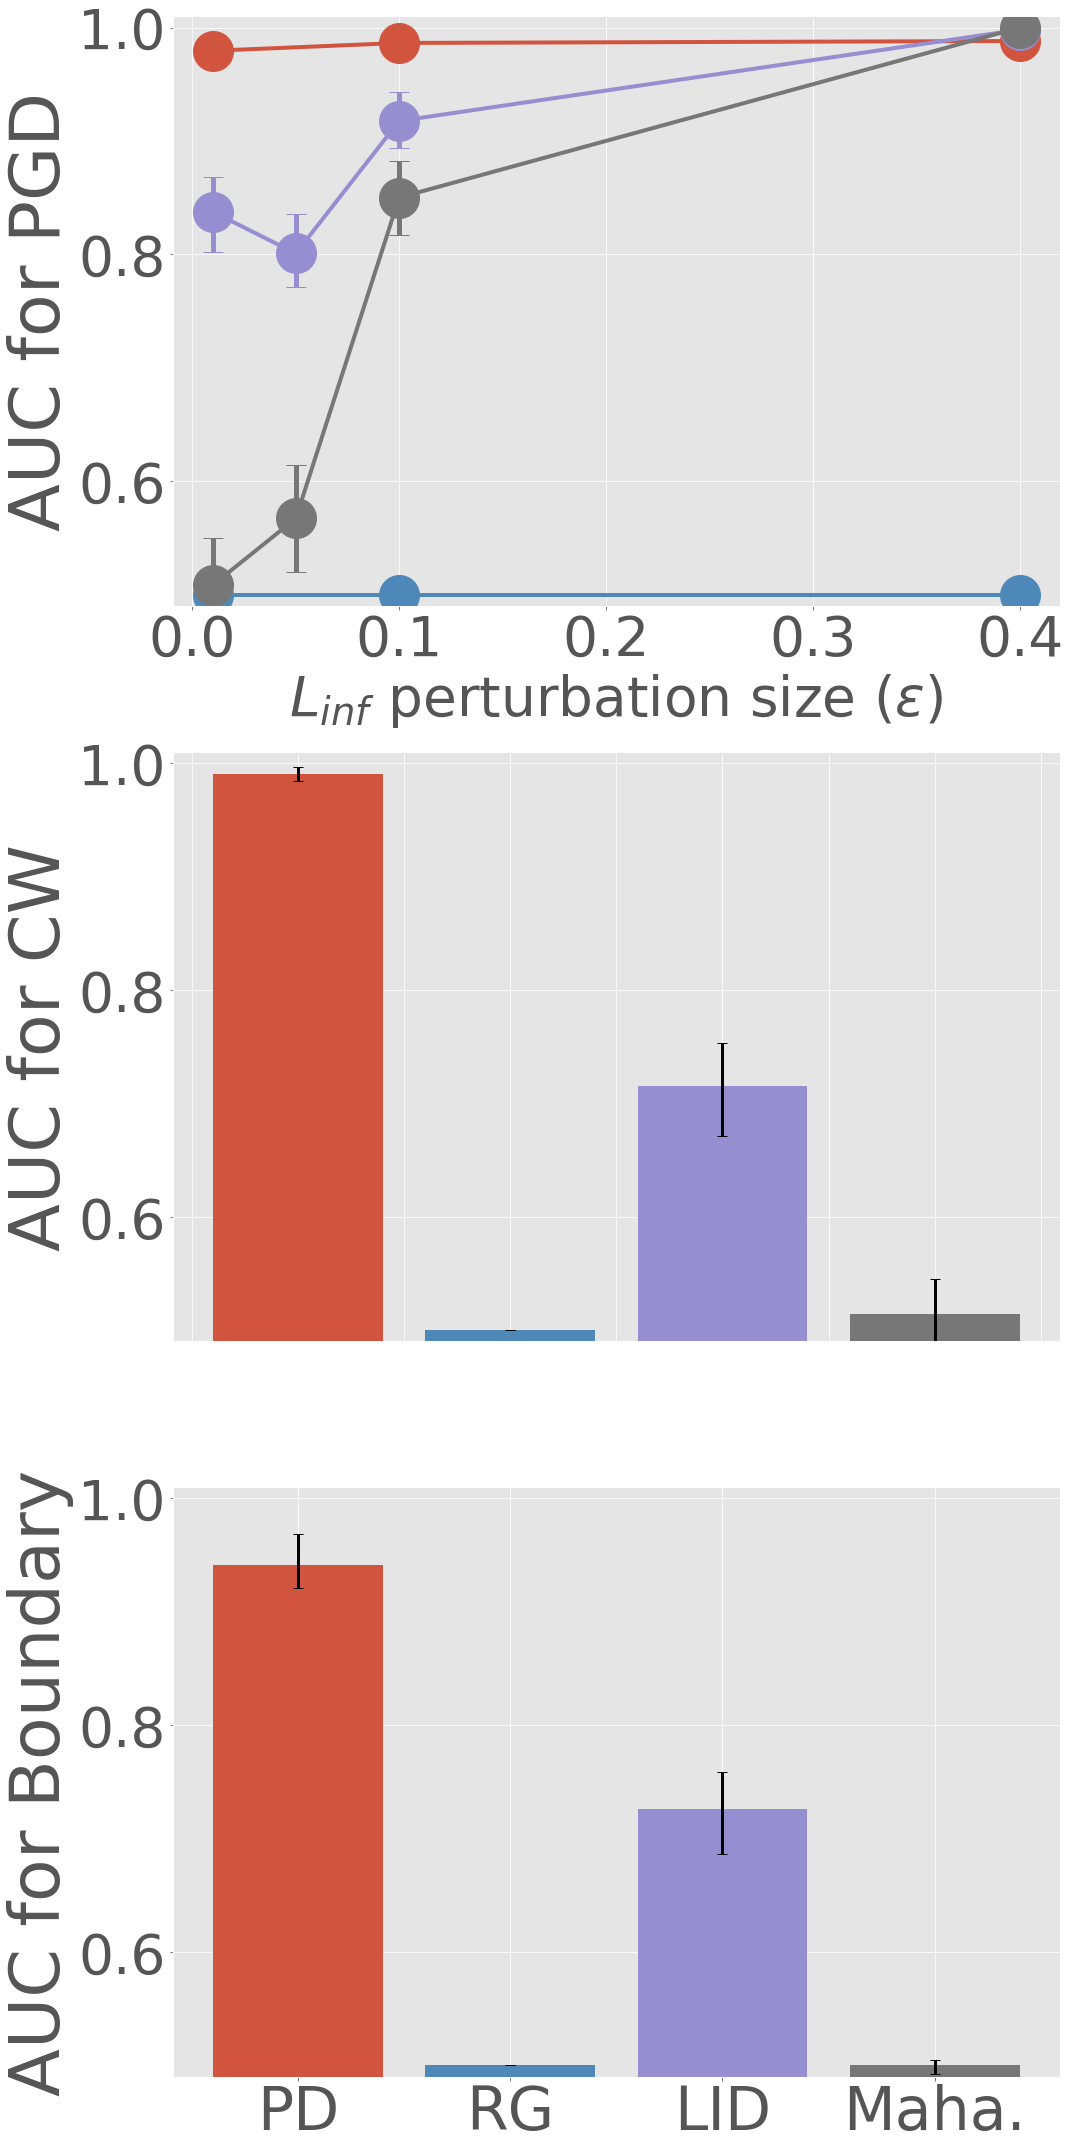

In [96]:
# Plot MNIST
# Fashion MNIST LeNet

    # Persistence Diagram
        # PGD
fashionmnist_pd_pgd_eps = [0.01, 0.1, 0.4]
fashionmnist_pd_pgd_do = [0.9696, 0.9775, 0.9812]
fashionmnist_pd_pgd_val = [0.9795, 0.9864, 0.9881]
fashionmnist_pd_pgd_up = [0.9909, 0.9940, 0.9986]
        # CW
fashionmnist_pd_cw_eps = [1]
fashionmnist_pd_cw_do = [0.9838]
fashionmnist_pd_cw_val = [0.99]
fashionmnist_pd_cw_up = [0.9967]
        # Boundary
fashionmnist_pd_bnd_eps = [1]
fashionmnist_pd_bnd_do = [0.9213]
fashionmnist_pd_bnd_val = [0.9411]
fashionmnist_pd_bnd_up = [0.9687]



    # Raw Graph
        # PGD
fashionmnist_rg_pgd_eps = [0.01, 0.1, 0.4]
fashionmnist_rg_pgd_do = [0.5, 0.5, 0.5]#0.2747, 0.4443, 0.9846]
fashionmnist_rg_pgd_val = [0.5, 0.5, 0.5]#[0.3286, 0.4970, 0.9909]
fashionmnist_rg_pgd_up = [0.5, 0.5, 0.5]#[0.3733, 0.5436, 0.9982]
        # CW
fashionmnist_rg_cw_eps = [1]
fashionmnist_rg_cw_do = [0.5]#[0.4105]
fashionmnist_rg_cw_val = [0.5]#[0.4531]
fashionmnist_rg_cw_up = [0.5]#[0.4907]
        # Boundary
fashionmnist_rg_bnd_eps = [1]
fashionmnist_rg_bnd_do = [0.5]#[0.3507]
fashionmnist_rg_bnd_val = [0.5]#[0.386]
fashionmnist_rg_bnd_up = [0.5]#[0.4325]



    # LID
        # PGD
fashionmnist_lid_pgd_eps = [0.01, 0.05, 0.1, 0.4]
fashionmnist_lid_pgd_do = [0.8017, 0.7714, 0.8939, 0.9965]
fashionmnist_lid_pgd_val = [0.8375, 0.8008, 0.9176, 0.9981]
fashionmnist_lid_pgd_up = [0.8684, 0.8356, 0.9428, 1]
        # CW
fashionmnist_lid_cw_eps = [1]
fashionmnist_lid_cw_do = [0.6712]
fashionmnist_lid_cw_val = [0.7151]
fashionmnist_lid_cw_up = [0.7528]
        # Boundary
fashionmnist_lid_bnd_eps = [1]
fashionmnist_lid_bnd_do = [0.6861]
fashionmnist_lid_bnd_val = [0.7262]
fashionmnist_lid_bnd_up =[0.7591]


    # Mahalanobis
        # PGD
fashionmnist_maha_pgd_eps = [0.01, 0.05, 0.1, 0.4]
fashionmnist_maha_pgd_do = [0.4665, 0.5198, 0.8168, 0.9999]
fashionmnist_maha_pgd_val = [0.5086, 0.5672, 0.8501, 0.9999]
fashionmnist_maha_pgd_up = [0.5496, 0.6142, 0.8824,1]
        # CW
fashionmnist_maha_cw_eps = [1]
fashionmnist_maha_cw_do = [0.4824]
fashionmnist_maha_cw_val = [0.5143]
fashionmnist_maha_cw_up = [0.5453]
        # Boundary
fashionmnist_maha_bnd_eps = [1]
fashionmnist_maha_bnd_do = [0.4926]
fashionmnist_maha_bnd_val = [0.5]
fashionmnist_maha_bnd_up = [0.5051]



# Plot !
fashionmnist_dict = create_dict("fashionmnist", m1="pd", m2="rg", m3="lid", m4="maha")
axs = plot_all_attacks(fashionmnist_dict, ylabel_=True)
plt.savefig("/Users/m.goibert/Documents/Criteo/P2_TDA_Detection/plots_for_paper/fashionmnist_lenet_trsfattack.png", dpi=200)
plt.show()